# Capstone project - HealthCare Fraud Detection : EDA and Clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from cp_clean_helper import show_values
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

### # Loading datasets and looking at shapes:-

In [2]:
# Loading datasets

train_df = pd.read_csv("clean_train.csv",index_col=0)
test_df = pd.read_csv("clean_test.csv",index_col=0)
fraud_labels = pd.read_csv("Data/Train-1542865627584.csv")

# Looking at dataset shapes

print('Shape of fraud labels data :',fraud_labels.shape)
print('Shape of train data :',train_df.shape)
print('Shape of test data :',test_df.shape)

Shape of fraud labels data : (5410, 2)
Shape of train data : (558211, 61)
Shape of test data : (135392, 60)


### # Looking at first few rows for each:

In [3]:
train_df.head(5)

BeneID  Gender  Race  RenalDiseaseIndicator  State  County  \
0  BENE11001       0     0                      0     39     230   
1  BENE12511       0     0                      0     39     510   
2  BENE14577       1     0                      1     33      70   
3  BENE15074       1     0                      0     39     470   
4  BENE16973       0     0                      0     39     310   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      0   
1                   12                   12                      1   
2                   12                   12                      1   
3                   12                   12                      0   
4                   12                   12                      0   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         1                          0                   1   
1                         1                          1                   1   
2                         0                          0                   1   
3                         1                          0                   1   
4                         0                          0                   1   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           1                       0                     0   
1                           1                       1                     0   
2                           1                       1                     1   
3                           1                       1                     0   
4                           1                       1                     1   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          0                         1   
1                          0                         0   
2                          0                         1   
3                          0                         1   
4                          0                         1   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  Deceased  Age  \
0                                0                   0         0   66   
1                                1                   1         0   65   
2                                1                   0         0   74   
3                                1                   1         0   77   
4                                1                   1         0   77   

   Tot_Reimbursed_Amt  Tot_Deductible_Amt  DOB_year  DOB_month  DOB_day  \
0               36060                3264      1943          1        1   
1                1250                1250      1944          9        1   
2                2390                2390      1935         10        1   
3                 870                 870      1932          6        1   
4               24450                2586      1932          5        1   

     ClaimID  Provider  InscClaimAmtReimbursed  AttendingPhysician  \
0   CLM46614  PRV55912                   26000               53276   
1  CLM724430  PRV55912                     600               73124   
2  CLM567180  PRV55912                      20               47058   
3  CLM259984  PRV55912                      30               40279   
4  CLM565430  PRV55912                      50               36530   

   OperatingPhysician  OtherPhysician  ClmAdmitDiagnosisCode  \
0                   0               0                   3022   
1                   0               0                   3763   
2                   0               0                   3763   
3                   0           31218                   3763   
4                4694               0                   3763   

   DeductibleAmtPaid  DiagnosisGroupCode  ClmDiagnosisCode_1  \
0             1068.0                 154                1036   
1                0.0                 736               1006

In [4]:
test_df.head(5)

BeneID  Gender  Race  RenalDiseaseIndicator  State  County  \
0  BENE11001       0     0                      0     39     230   
1  BENE11001       0     0                      0     39     230   
2  BENE11007       0     1                      0     45     610   
3  BENE11007       0     1                      0     45     610   
4  BENE11007       0     1                      0     45     610   

   NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
0                   12                   12                      0   
1                   12                   12                      0   
2                   12                   12                      0   
3                   12                   12                      0   
4                   12                   12                      0   

   ChronicCond_Heartfailure  ChronicCond_KidneyDisease  ChronicCond_Cancer  \
0                         1                          0                   1   
1                         1                          0                   1   
2                         0                          1                   1   
3                         0                          1                   1   
4                         0                          1                   1   

   ChronicCond_ObstrPulmonary  ChronicCond_Depression  ChronicCond_Diabetes  \
0                           1                       0                     0   
1                           1                       0                     0   
2                           1                       1                     0   
3                           1                       1                     0   
4                           1                       1                     0   

   ChronicCond_IschemicHeart  ChronicCond_Osteoporasis  \
0                          0                         1   
1                          0                         1   
2                          1                         0   
3                          1                         0   
4                          1                         0   

   ChronicCond_rheumatoidarthritis  ChronicCond_stroke  Deceased  Age  \
0                                0                   0         0   66   
1                                0                   0         0   66   
2                                0                   1         1   69   
3                                0                   1         1   69   
4                                0                   1         1   69   

   Tot_Reimbursed_Amt  Tot_Deductible_Amt  DOB_year  DOB_month  DOB_day  \
0               36060                3264      1943          1        1   
1               36060                3264      1943          1        1   
2                1490                1490      1940          9        1   
3                1490                1490      1940          9        1   
4                1490                1490      1940          9        1   

     ClaimID  Provider  InscClaimAmtReimbursed  AttendingPhysician  \
0  CLM392397  PRV55962                      30                6381   
1  CLM430760  PRV56112                      30               12407   
2  CLM233081  PRV56979                     200               20041   
3  CLM496381  PRV56573                      10               14401   
4  CLM521391  PRV56573                      10               18681   

   OperatingPhysician  OtherPhysician  ClmAdmitDiagnosisCode  \
0                   0            3608                   2418   
1                   0            6949                   2418   
2                   0           11230                   2418   
3                2703               0                   1408   
4                   0            6974                   2418   

   DeductibleAmtPaid  DiagnosisGroupCode  ClmDiagnosisCode_1  \
0                0.0                 712                8039   
1                0.0                 712                717

In [5]:
fraud_labels.head(5)

Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No

## # Additional EDA:

- Looking at percentages of fraud vs non-fraud providers in the training dataset

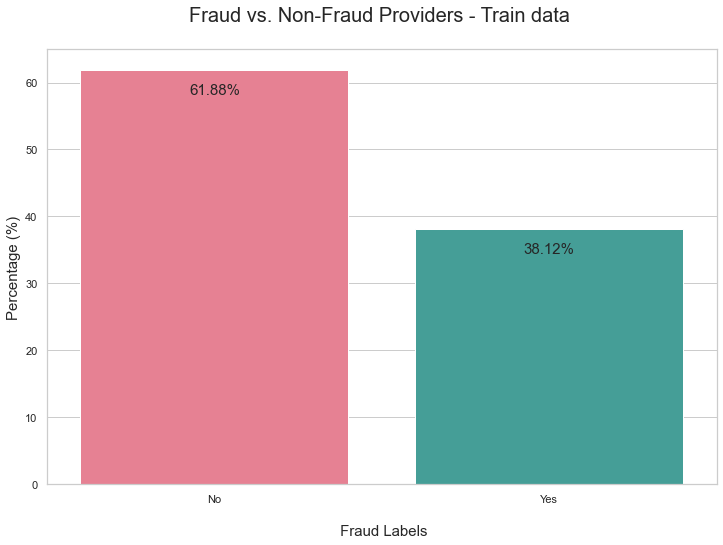

In [6]:
#  Creating df to show percentages of fraud vs non-fraud providers in the dataset:

fraud_df = pd.DataFrame(train_df['PotentialFraud'].value_counts(normalize=True)*100).reset_index()
fraud_df.columns=['Fraud_Labels', 'Per_data']

# Graphically presenting the results
plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
splot = sns.barplot(x="Fraud_Labels", y="Per_data", data=fraud_df, palette='husl')
for p in splot.patches:
    splot.annotate(format(str(p.get_height().round(2)) + '%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("\n Fraud Labels", fontsize = 15)
plt.ylabel("Percentage (%)", fontsize = 15)
plt.title("Fraud vs. Non-Fraud Providers - Train data \n", fontsize = 20)
plt.show()

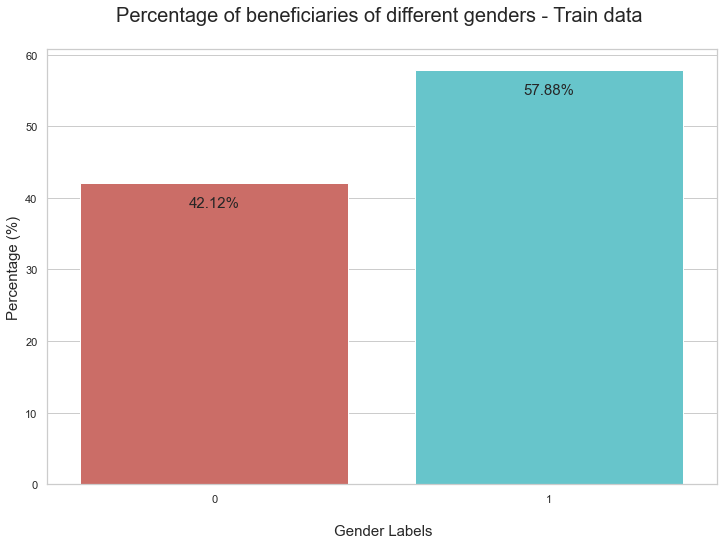

In [7]:
gender_df = pd.DataFrame(train_df['Gender'].value_counts(normalize=True)*100).reset_index()
gender_df.columns=['Gender_Labels', 'Per_data']

# Graphically presenting the results
plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
splot = sns.barplot(x="Gender_Labels", y="Per_data", data=gender_df, palette='hls')
for p in splot.patches:
    splot.annotate(format(str(p.get_height().round(2)) + '%'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -20), 
                   textcoords = 'offset points')
plt.xlabel("\n Gender Labels", fontsize = 15)
plt.ylabel("Percentage (%)", fontsize = 15)
plt.title("Percentage of beneficiaries of different genders - Train data \n", fontsize = 20)
plt.show()

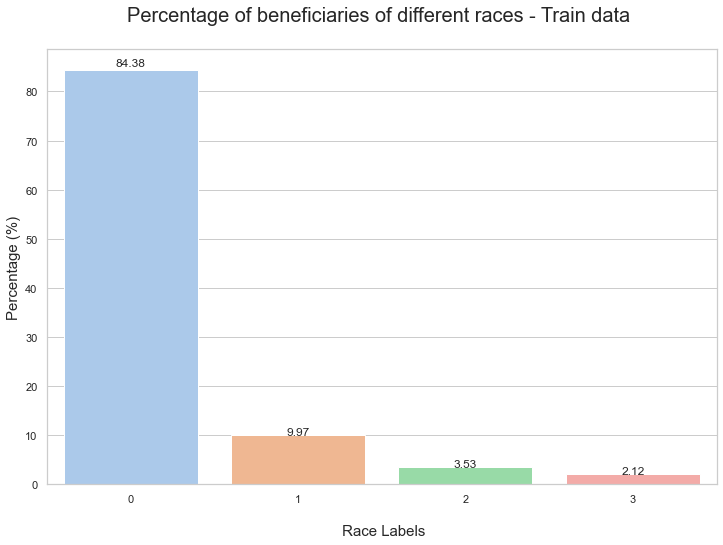

In [8]:
race_df = pd.DataFrame(train_df['Race'].value_counts(normalize=True)*100).reset_index()
race_df.columns=['Race_Labels', 'Per_data']

# Graphically presenting the results
plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
splot = sns.barplot(x="Race_Labels", y="Per_data", data=race_df, palette='pastel')
show_values(splot,space=0.05)
# for p in splot.patches:
#     splot.annotate(format(str(p.get_height().round(2)) + '%'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    size=12,
#                    xytext = (0, -0.00000001), 
#                    textcoords = 'offset points')
plt.xlabel("\n Race Labels", fontsize = 15)
plt.ylabel("Percentage (%)", fontsize = 15)
plt.title("Percentage of beneficiaries of different races - Train data \n", fontsize = 20)
plt.show()

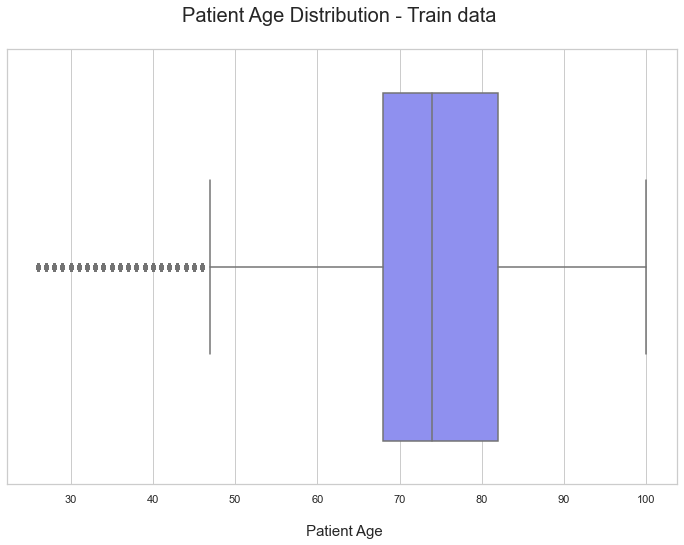

In [9]:
plt.figure(figsize = (12,8))
sns.boxplot(x=train_df['Age'], palette="cool_r")
plt.xlabel("\n Patient Age", fontsize = 15)
plt.title("Patient Age Distribution - Train data \n", fontsize = 20)
plt.show()

In [10]:
# race_df = pd.DataFrame(train_df['Age'].value_counts(normalize=True)*100).reset_index()
# race_df.columns=['Ages', 'Per_data']

# Graphically presenting the results
# plt.figure(figsize = (12,8))
# sns.set_theme(style='whitegrid')
# splot = sns.barplot(x="Race_Labels", y="Per_data", data=race_df, palette='pastel')
# show_values(splot,space=0.05)
# for p in splot.patches:
#     splot.annotate(format(str(p.get_height().round(2)) + '%'), 
#                    (p.get_x() + p.get_width() / 2., p.get_height()), 
#                    ha = 'center', va = 'center', 
#                    size=12,
#                    xytext = (0, -0.00000001), 
#                    textcoords = 'offset points')
# plt.xlabel("\n Race Labels", fontsize = 15)
# plt.ylabel("Percentage (%)", fontsize = 15)
# plt.title("Percentage of beneficiaries of different races - Train data \n", fontsize = 20)
# plt.show()

## Beneficiary focused EDA:

### Looking at chronic conditions for inpatient and outpatient beneficiary claims:

In [11]:
# Creating inpatient subset

inp_df = train_df.loc[train_df.Hospital_Stay >= 0,:]

# Looking at mean and median

print(inp_df[['BeneID','Chr_Cond_Count']].groupby('BeneID')[['Chr_Cond_Count']].mean().mean())
print(inp_df[['BeneID','Chr_Cond_Count']].groupby('BeneID')[['Chr_Cond_Count']].mean().median())

Chr_Cond_Count    6.022788
dtype: float64
Chr_Cond_Count    6.0
dtype: float64


In [12]:
# Creating outpatient subset

out_df = train_df.loc[train_df.Hospital_Stay == -1,:]

# Looking at mean and median

print(out_df[['BeneID','Chr_Cond_Count']].groupby('BeneID')[['Chr_Cond_Count']].mean().mean())
print(out_df[['BeneID','Chr_Cond_Count']].groupby('BeneID')[['Chr_Cond_Count']].mean().median())

Chr_Cond_Count    7.415181
dtype: float64
Chr_Cond_Count    8.0
dtype: float64


## Investigating inpatient and outpatient beneficiaried based on high total deductible paid

- Inpatient data

In [13]:
bene_in_char = inp_df[['BeneID','Gender','Race','State','County',\
                        'Age','Tot_Deductible_Amt','Chr_Cond_Count',\
                        'Hospital_Count','Claim_Count','Physician_Count']]

topb_in_char = bene_in_char.loc[bene_in_char.Tot_Deductible_Amt > 50000,:]
bottomb_in_char = bene_in_char.loc[bene_in_char.Tot_Deductible_Amt < 50000,:]

In [14]:
print('\n')
print(topb_in_char['State'].value_counts(normalize=True)*100)
print('\n')



1     17.647059
34    17.647059
39    17.647059
36    11.764706
19    11.764706
5      5.882353
44     5.882353
17     5.882353
29     5.882353
Name: State, dtype: float64




In [15]:
df1 = topb_in_char.groupby('BeneID')['Chr_Cond_Count'].mean().sort_values(ascending=False).reset_index()

Text(0.5, 1.0, 'Chronic condition counts for beneficiaries paying high deductibles - Inpatient data \n')

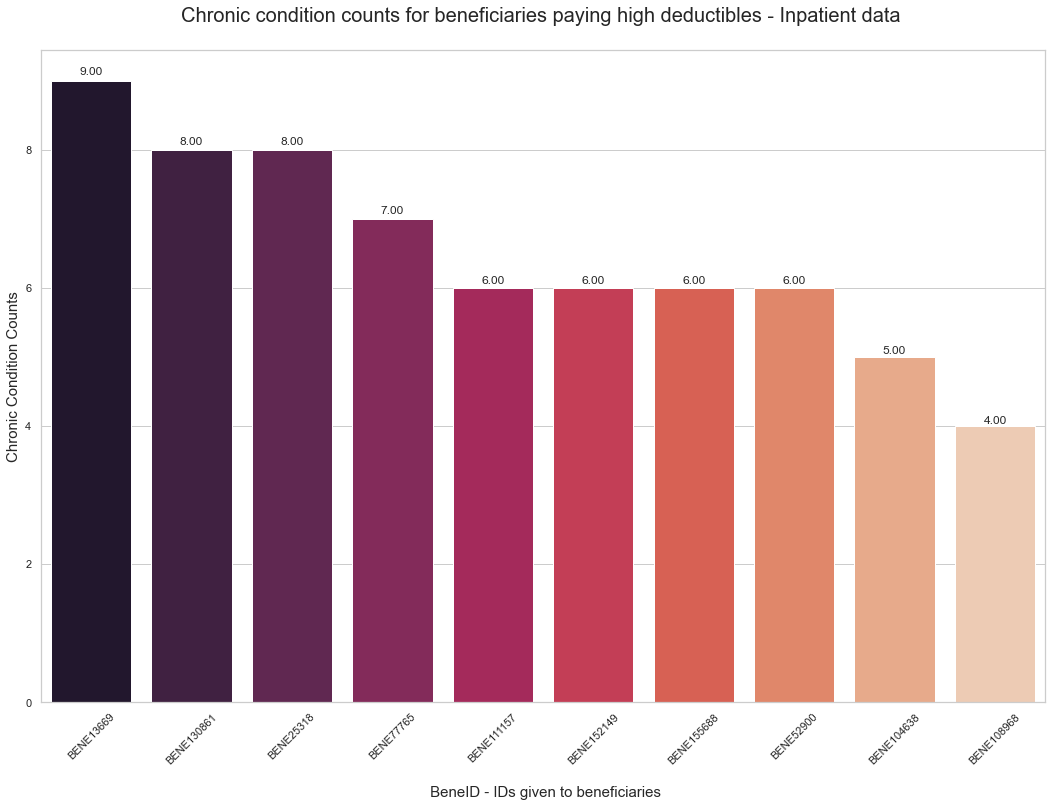

In [16]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
plot = sns.barplot(data=df1, x='BeneID', y='Chr_Cond_Count', palette='rocket')
show_values(plot,space=0.05)
plt.xticks(rotation=45)
plt.xlabel("\n BeneID - IDs given to beneficiaries", fontsize = 15)
plt.ylabel("Chronic Condition Counts", fontsize = 15)
plt.title("Chronic condition counts for beneficiaries paying high deductibles - Inpatient data \n", fontsize = 20)

### Chronic Condition Counts:

In [17]:
# sns.kdeplot(data=topb_in_char, x="Chr_Cond_Count",fill=True, color="orange")

In [18]:
# sns.kdeplot(data=bottomb_in_char, x="Chr_Cond_Count",fill=True, color="green")

### Hospital_Count:

In [19]:
# sns.kdeplot(data=topb_in_char, x="Hospital_Count", fill=True, color="orange")

In [20]:
# sns.kdeplot(data=bottomb_in_char, x="Hospital_Count", fill=True, color="green")

### Claim_Count

In [21]:
# sns.kdeplot(data=topb_in_char, x="Claim_Count", fill=True, color="orange")

In [22]:
# sns.kdeplot(data=bottomb_in_char, x="Claim_Count", fill=True, color="green")

### Physician_Count

In [23]:
# sns.kdeplot(data=topb_in_char, x="Physician_Count", fill=True, color="orange")

In [24]:
# sns.kdeplot(data=bottomb_in_char, x="Physician_Count", fill=True, color="green")

- Outpatient data

In [25]:
bene_out_char = out_df[['BeneID','Gender','Race','State','County',\
                        'Age','Tot_Deductible_Amt','Chr_Cond_Count',\
                        'Hospital_Count','Claim_Count','Physician_Count']]

topb_out_char = bene_out_char.loc[bene_out_char.Tot_Deductible_Amt > 50000,:]
bottomb_out_char = bene_out_char.loc[bene_out_char.Tot_Deductible_Amt < 50000,:]

In [26]:
print('\n')
print(topb_out_char['State'].value_counts(normalize=True)*100)
print('\n')



36    28.571429
1     14.285714
31    14.285714
29    12.698413
39    12.698413
34     7.936508
5      4.761905
17     1.587302
19     1.587302
44     1.587302
Name: State, dtype: float64




In [27]:
df2 = topb_out_char.groupby('BeneID')['Chr_Cond_Count'].mean().sort_values(ascending=False).reset_index()

Text(0.5, 1.0, 'Chronic condition counts for beneficiaries paying high deductibles - Outpatient data \n')

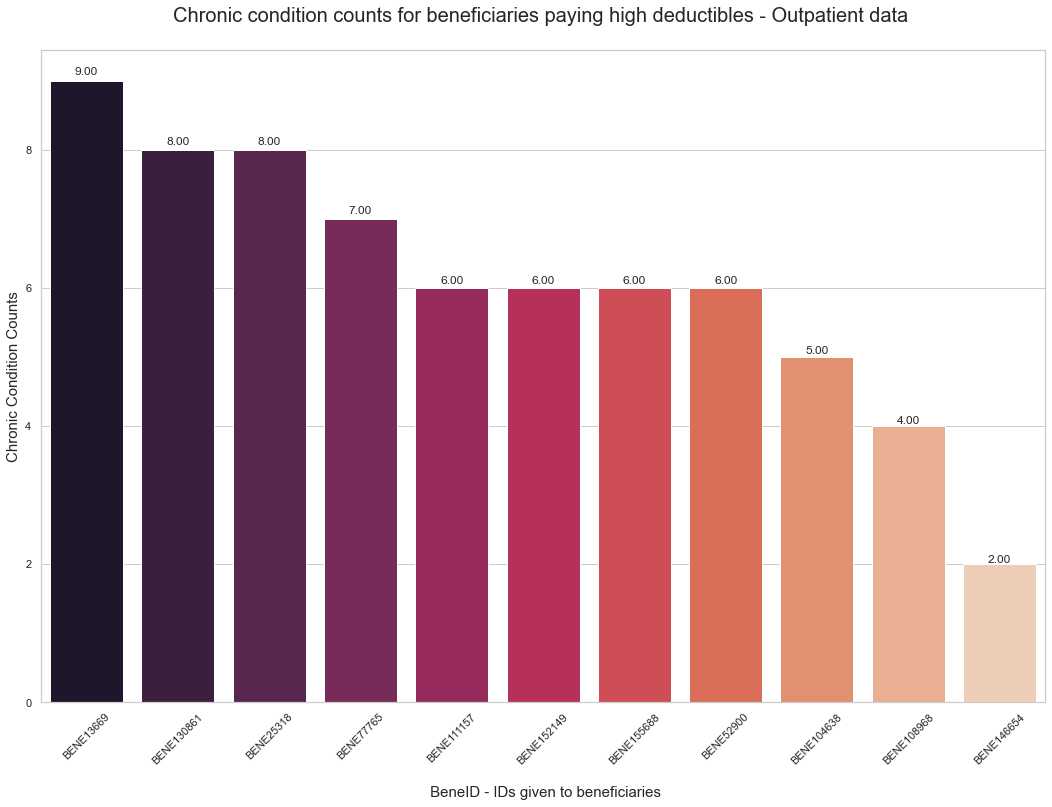

In [28]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
plot = sns.barplot(data=df2, x='BeneID', y='Chr_Cond_Count', palette='rocket')
show_values(plot,space=0.05)
plt.xticks(rotation=45)
plt.xlabel("\n BeneID - IDs given to beneficiaries", fontsize = 15)
plt.ylabel("Chronic Condition Counts", fontsize = 15)
plt.title("Chronic condition counts for beneficiaries paying high deductibles - Outpatient data \n", fontsize = 20)

### Chronic Condition Counts:

In [29]:
# sns.kdeplot(data=topb_out_char, x="Chr_Cond_Count",fill=True, color="orange")

In [30]:
# sns.kdeplot(data=bottomb_out_char, x="Chr_Cond_Count",fill=True, color="green")

### Hospital_Count:

In [31]:
# sns.kdeplot(data=topb_out_char, x="Hospital_Count", fill=True, color="orange")

In [32]:
# sns.kdeplot(data=bottomb_out_char, x="Hospital_Count", fill=True, color="green")

### Claim_Count

In [33]:
# sns.kdeplot(data=topb_out_char, x="Claim_Count", fill=True, color="orange")

In [34]:
# sns.kdeplot(data=bottomb_out_char, x="Claim_Count", fill=True, color="green")

### Physician_Count

In [35]:
# sns.kdeplot(data=topb_out_char, x="Physician_Count", fill=True, color="orange")

In [36]:
# sns.kdeplot(data=bottomb_out_char, x="Physician_Count", fill=True, color="green")

- Looks like outpatient beneficiaries have slightly higher condition counts

<Figure size 720x720 with 0 Axes>

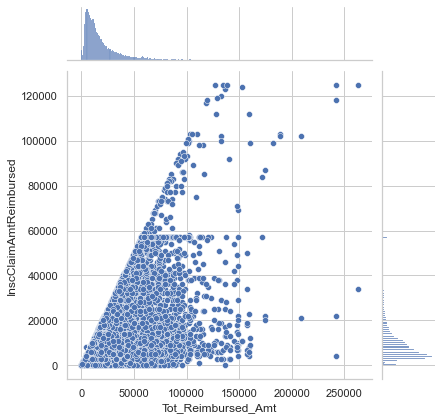

<Figure size 720x720 with 0 Axes>

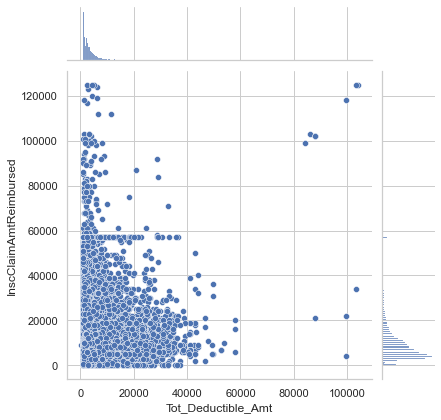

<Figure size 720x720 with 0 Axes>

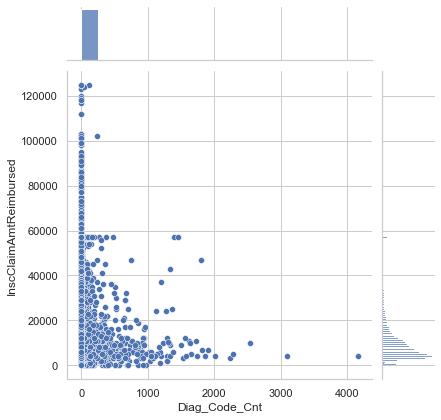

<Figure size 720x720 with 0 Axes>

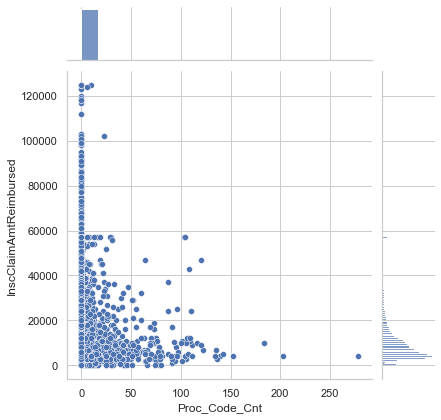

<Figure size 720x720 with 0 Axes>

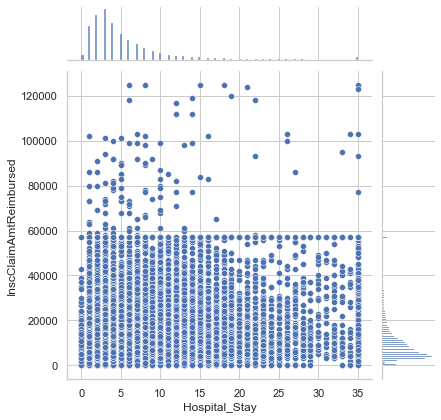

<Figure size 720x720 with 0 Axes>

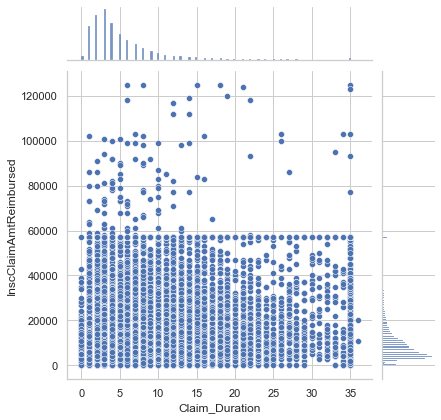

<Figure size 720x720 with 0 Axes>

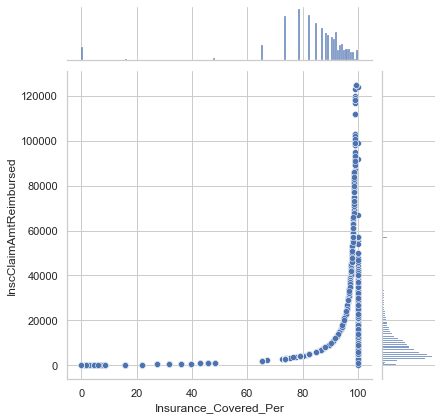

<Figure size 720x720 with 0 Axes>

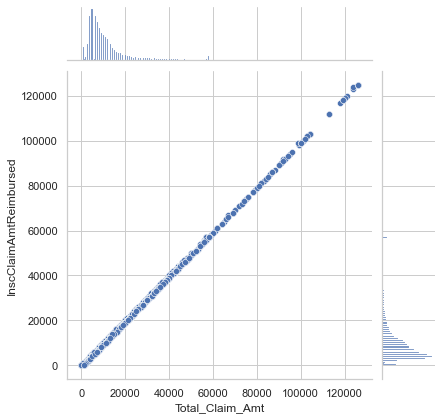

<Figure size 720x720 with 0 Axes>

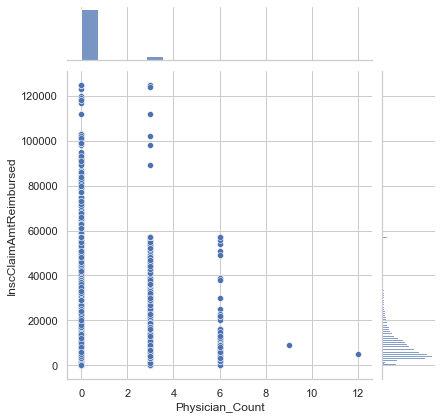

<Figure size 720x720 with 0 Axes>

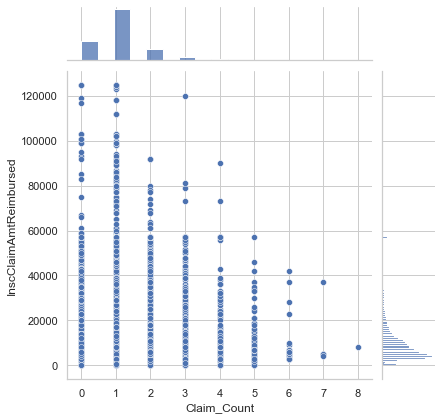

<Figure size 720x720 with 0 Axes>

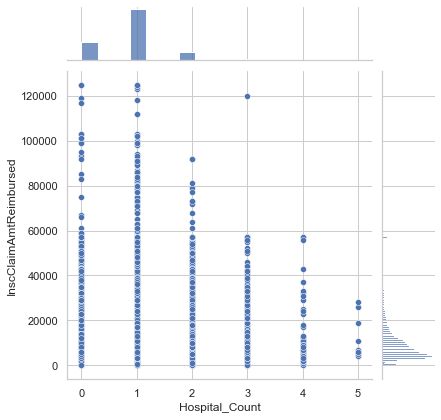

<Figure size 720x720 with 0 Axes>

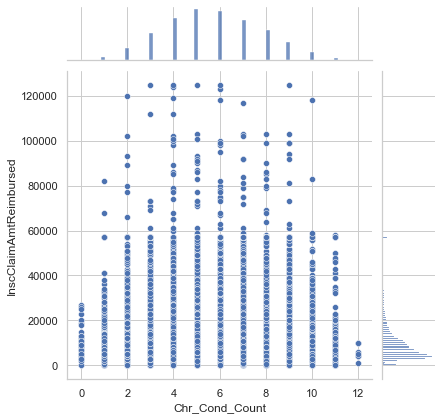

In [37]:
col_list = ['Tot_Reimbursed_Amt', 'Tot_Deductible_Amt', 'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay',\
            'Claim_Duration', 'Insurance_Covered_Per', 'Total_Claim_Amt', 'Physician_Count', 'Claim_Count',\
            'Hospital_Count', 'Chr_Cond_Count']

y = inp_df['InscClaimAmtReimbursed']

for col in col_list:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = inp_df[col]
    sns.jointplot(x=x, y=y, data=inp_df)

<Figure size 720x720 with 0 Axes>

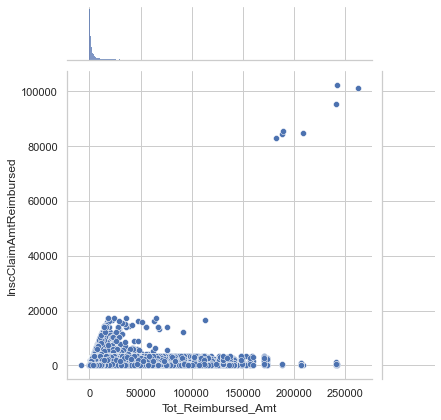

<Figure size 720x720 with 0 Axes>

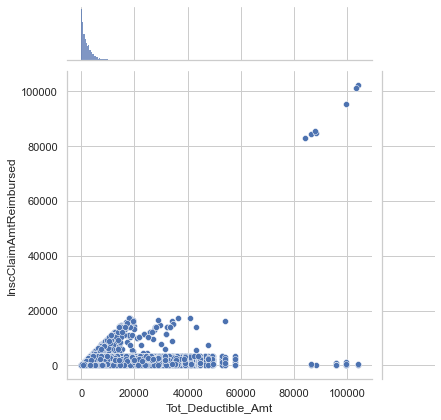

<Figure size 720x720 with 0 Axes>

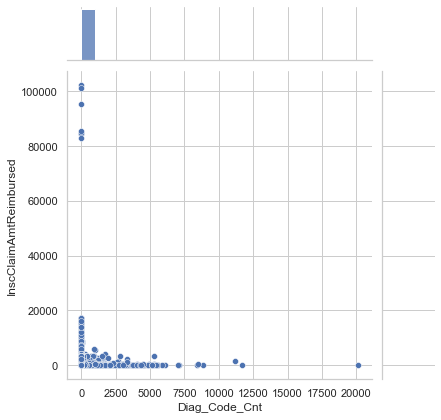

<Figure size 720x720 with 0 Axes>

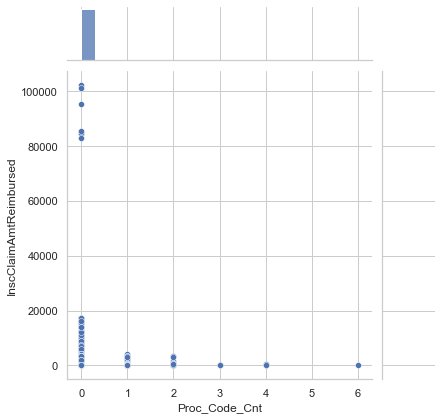

<Figure size 720x720 with 0 Axes>

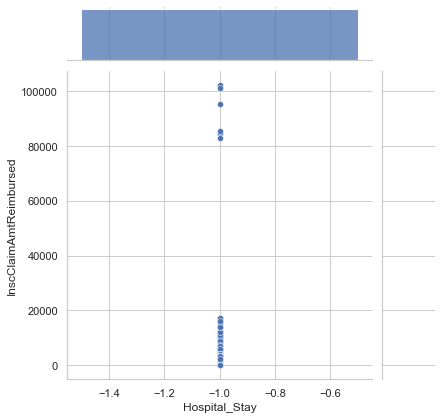

<Figure size 720x720 with 0 Axes>

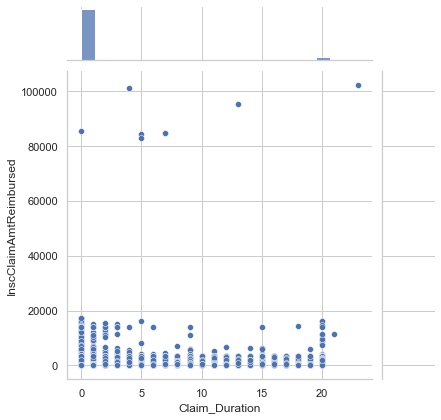

<Figure size 720x720 with 0 Axes>

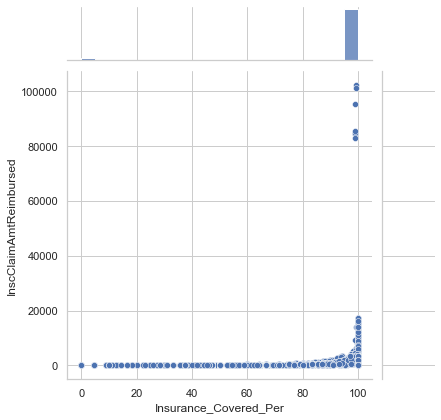

<Figure size 720x720 with 0 Axes>

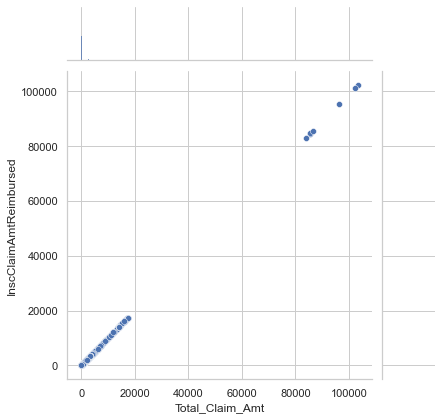

<Figure size 720x720 with 0 Axes>

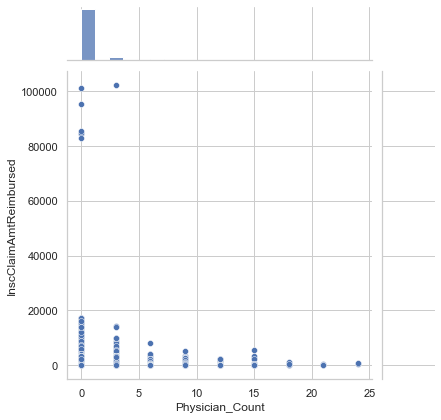

<Figure size 720x720 with 0 Axes>

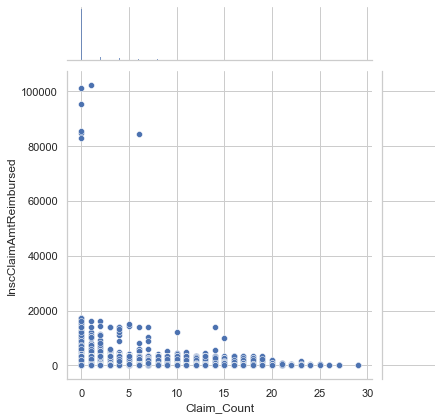

<Figure size 720x720 with 0 Axes>

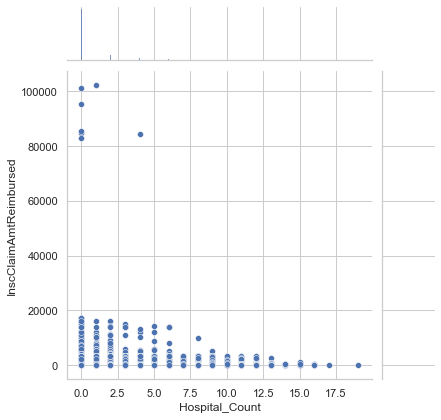

<Figure size 720x720 with 0 Axes>

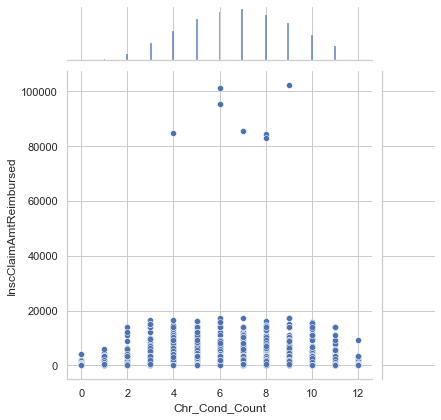

In [38]:
col_list = ['Tot_Reimbursed_Amt', 'Tot_Deductible_Amt', 'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay',\
            'Claim_Duration', 'Insurance_Covered_Per', 'Total_Claim_Amt', 'Physician_Count', 'Claim_Count',\
            'Hospital_Count', 'Chr_Cond_Count']

y = out_df['InscClaimAmtReimbursed']

for col in col_list:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = out_df[col]
    sns.jointplot(x=x, y=y, data=out_df)

### Looking at claim counts and chronic conditions per beneficiary in inpatient/outpatient datasets

Text(0.5, 1.0, 'No of Inpatient Claims vs Number of Chronic Conditions \n')

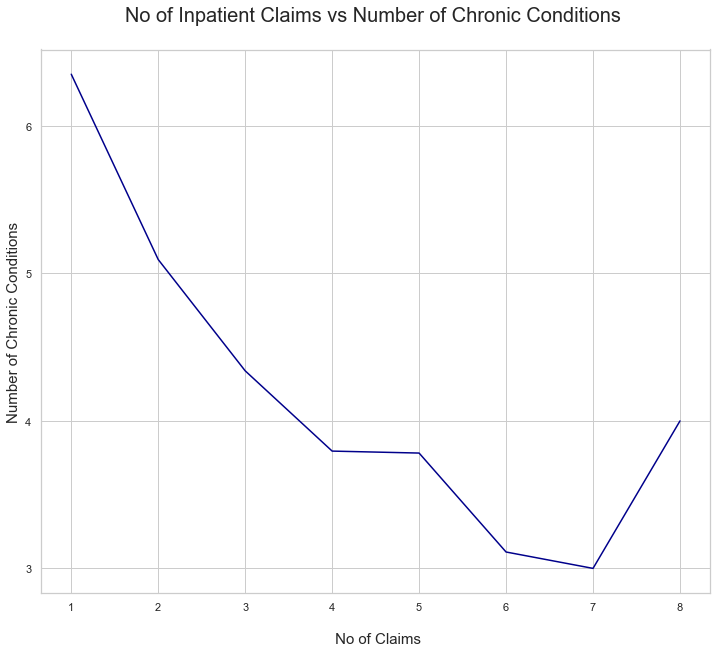

In [39]:
# Create df to show mean condition count per number of claims the patient has

inp_clm_chr = inp_df[['BeneID','ClaimID','Chr_Cond_Count']]\
              .groupby('BeneID').agg(['count','mean'])
inp_clm_chr.columns =['No_of_Claims', 'Chr_Cond_Cnt']
inp_clm_chr = inp_clm_chr.sort_values(by=['No_of_Claims',\
                            'Chr_Cond_Cnt']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
inp_clm_chr.groupby('No_of_Claims')['Chr_Cond_Cnt'].mean().plot(color='darkblue')
plt.yticks(np.arange(3, 7, 1))
plt.xlabel("\n No of Claims", fontsize = 15)
plt.ylabel("Number of Chronic Conditions", fontsize = 15)
plt.title("No of Inpatient Claims vs Number of Chronic Conditions \n", fontsize = 20)

Text(0.5, 1.0, 'No of Outpatient Claims vs Number of Chronic Conditions \n')

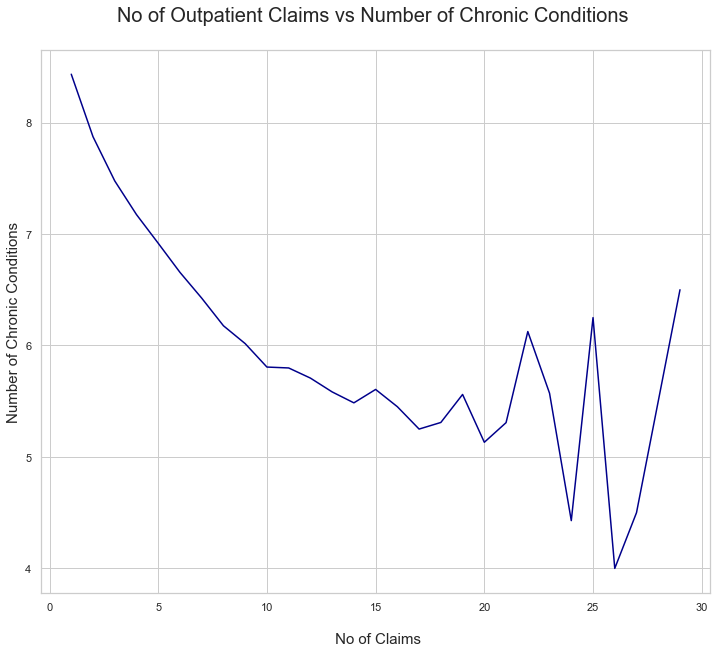

In [40]:
# Create df to show mean condition count per number of claims the patient has

out_clm_chr = out_df[['BeneID','ClaimID','Chr_Cond_Count']]\
              .groupby('BeneID').agg(['count','mean'])
out_clm_chr.columns =['No_of_Claims', 'Chr_Cond_Cnt']
out_clm_chr = out_clm_chr.sort_values(by=['No_of_Claims',\
                            'Chr_Cond_Cnt']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
out_clm_chr.groupby('No_of_Claims')['Chr_Cond_Cnt'].mean().plot(color='darkblue')
plt.xlabel("\n No of Claims", fontsize = 15)
plt.ylabel("Number of Chronic Conditions", fontsize = 15)
plt.title("No of Outpatient Claims vs Number of Chronic Conditions \n", fontsize = 20)

### Looking at patient age and claim counts per beneficiary in inpatient/outpatient datasets

Text(0.5, 1.0, 'No of Inpatient Claims vs Patient Age \n')

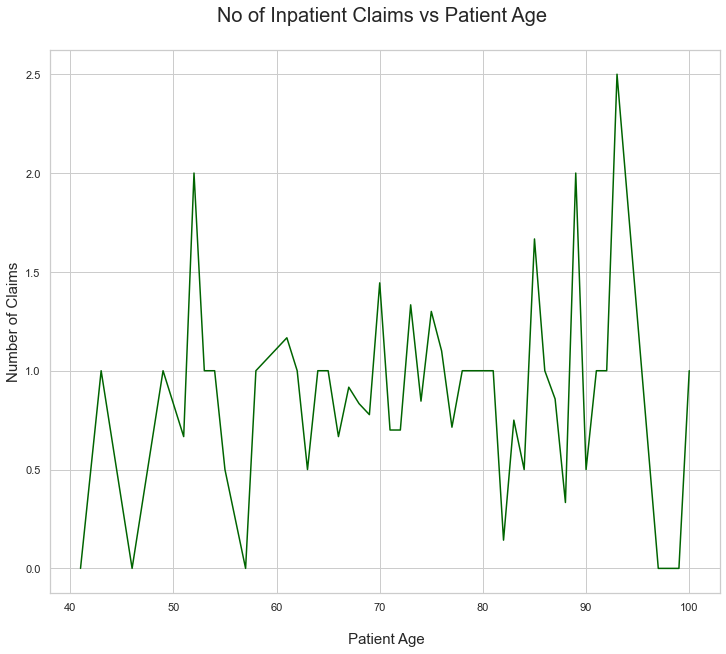

In [41]:
# Create df to show mean claims count per patient age group

inp_age_clm_df = inp_df.loc[inp_df.Deceased == 1,:][['BeneID','Age','Claim_Count']]\
                       .groupby('BeneID').agg(['min','mean'])
inp_age_clm_df.columns =['Age','A','B','Claims_Count']
inp_age_clm_df.drop(columns=['A', 'B'], axis=1,inplace=True)
inp_age_clm_df['Claims_Count'] = inp_age_clm_df['Claims_Count'].astype(int)
inp_age_clm_df = inp_age_clm_df.sort_values(by=['Age','Claims_Count']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
inp_age_clm_df.groupby('Age')['Claims_Count'].mean().plot(color='darkgreen')
# plt.yticks(np.arange(1, 4, 1))
plt.xlabel("\n Patient Age", fontsize = 15)
plt.ylabel("Number of Claims", fontsize = 15)
plt.title("No of Inpatient Claims vs Patient Age \n", fontsize = 20)

Text(0.5, 1.0, 'No of Inpatient Claims vs Patient Age \n')

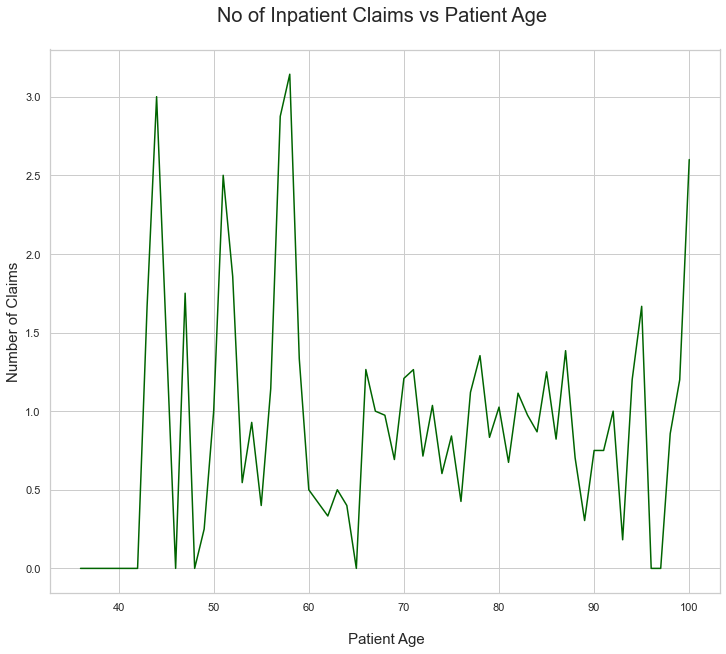

In [42]:
# Create df to show mean claims count per patient age group

out_age_clm_df = out_df.loc[out_df.Deceased == 1,:][['BeneID','Age','Claim_Count']]\
                       .groupby('BeneID').agg(['min','mean'])
out_age_clm_df.columns =['Age','A','B','Claims_Count']
out_age_clm_df.drop(columns=['A', 'B'], axis=1,inplace=True)
out_age_clm_df['Claims_Count'] = out_age_clm_df['Claims_Count'].astype(int)
out_age_clm_df = out_age_clm_df.sort_values(by=['Claims_Count','Age']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
out_age_clm_df.groupby('Age')['Claims_Count'].mean().plot(color='darkgreen')
plt.xlabel("\n Patient Age", fontsize = 15)
plt.ylabel("Number of Claims", fontsize = 15)
plt.title("No of Inpatient Claims vs Patient Age \n", fontsize = 20)

### Looking at patient age and chronic condition counts per beneficiary in inpatient/outpatient datasets

Text(0.5, 1.0, 'No. of Chronic Conditions vs Patient Age \n')

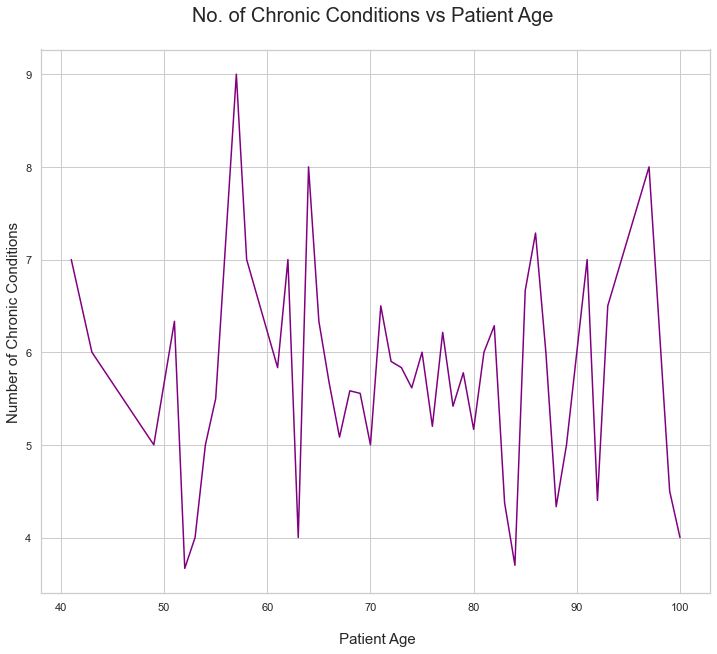

In [43]:
# Create df to show mean chronic condition count per patient age group

inp_age_chr_df = inp_df.loc[inp_df.Deceased == 1,:][['BeneID','Age','Chr_Cond_Count']]\
                       .groupby('BeneID').agg(['min','mean'])
inp_age_chr_df.columns =['Age','A','B','Condition_Count']
inp_age_chr_df.drop(columns=['A', 'B'], axis=1,inplace=True)
inp_age_chr_df['Condition_Count'] = inp_age_chr_df['Condition_Count'].astype(int)
inp_age_chr_df = inp_age_chr_df.sort_values(by=['Age','Condition_Count']\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
inp_age_chr_df.groupby('Age')['Condition_Count'].mean().plot(color='purple')
# plt.yticks(np.arange(1, 4, 1))
plt.xlabel("\n Patient Age", fontsize = 15)
plt.ylabel("Number of Chronic Conditions", fontsize = 15)
plt.title("No. of Chronic Conditions vs Patient Age \n", fontsize = 20)

Text(0.5, 1.0, 'No. of Chronic Conditions vs Patient Age \n')

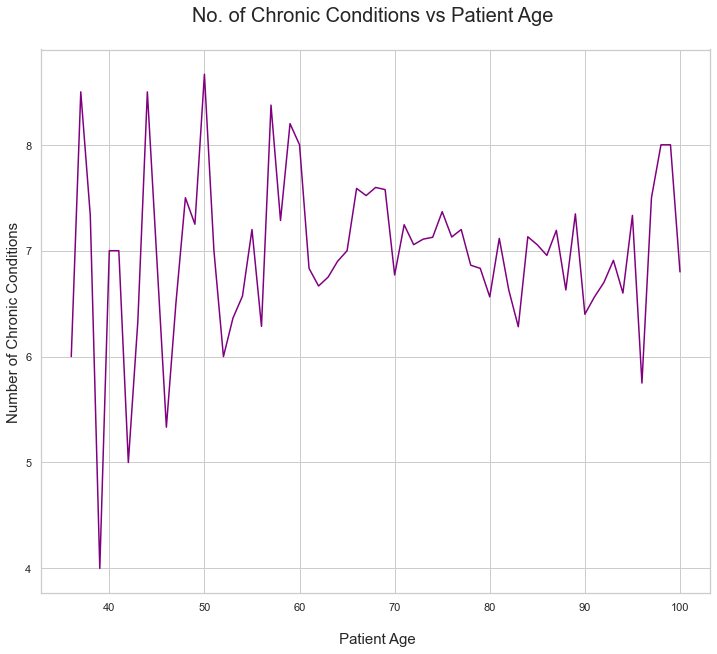

In [44]:
# Create df to show mean chronic condition count per patient age group

out_age_chr_df = out_df.loc[out_df.Deceased == 1,:][['BeneID','Age','Chr_Cond_Count']]\
                       .groupby('BeneID').agg(['min','mean'])
out_age_chr_df.columns =['Age','A','B','Condition_Count']
out_age_chr_df.drop(columns=['A', 'B'], axis=1,inplace=True)
out_age_chr_df['Condition_Count'] = out_age_chr_df['Condition_Count'].astype(int)
out_age_chr_df = out_age_chr_df.sort_values(by=['Age','Condition_Count',]\
                            ,ascending=[False, False])

# Plotting the results

plt.figure(figsize = (12,10))
out_age_chr_df.groupby('Age')['Condition_Count'].mean().plot(color='purple')
# plt.yticks(np.arange(1, 4, 1))
plt.xlabel("\n Patient Age", fontsize = 15)
plt.ylabel("Number of Chronic Conditions", fontsize = 15)
plt.title("No. of Chronic Conditions vs Patient Age \n", fontsize = 20)

## Provider fraud focused EDA

### Looking at distributions for InscClaimAmtReimbursed, DeductibleAmtPaid, Insurance_Covered_Per

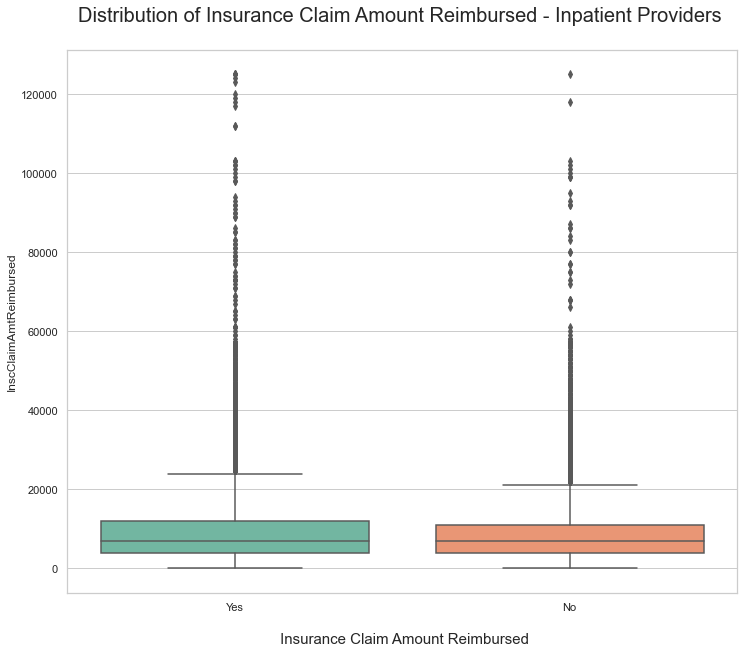

In [45]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=inp_df, x="InscClaimAmtReimbursed", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = inp_df,x = 'PotentialFraud',y = 'InscClaimAmtReimbursed',\
            palette='Set2')
plt.xlabel("\n Insurance Claim Amount Reimbursed", fontsize = 15)
plt.title("Distribution of Insurance Claim Amount Reimbursed - Inpatient Providers \n", fontsize = 20)
plt.show()

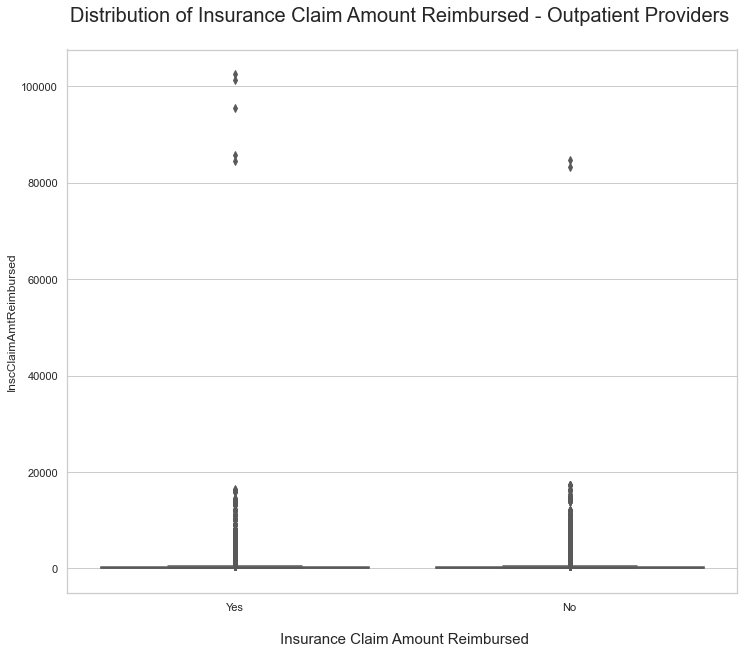

In [46]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=out_df, x="InscClaimAmtReimbursed", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = out_df,x = 'PotentialFraud',y = 'InscClaimAmtReimbursed',\
            palette='Set2')
plt.xlabel("\n Insurance Claim Amount Reimbursed", fontsize = 15)
plt.title("Distribution of Insurance Claim Amount Reimbursed - Outpatient Providers \n", fontsize = 20)
plt.show()

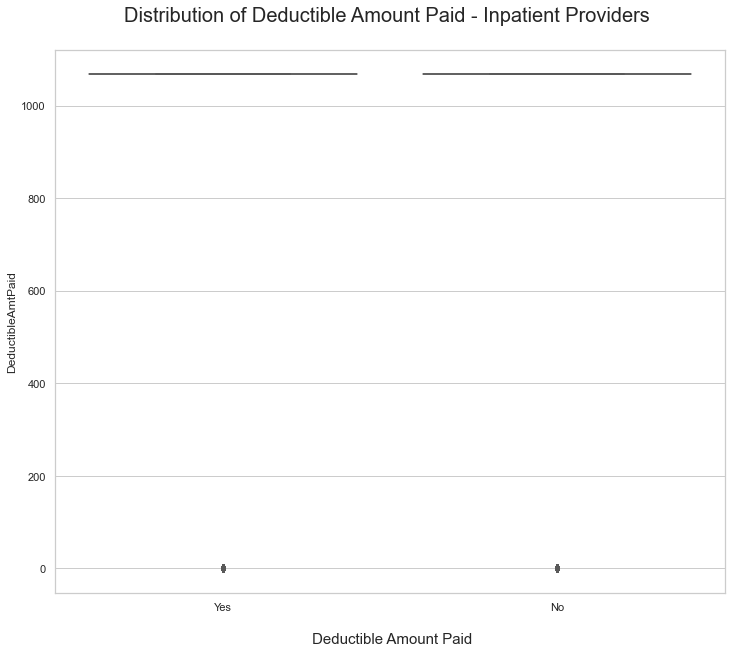

In [47]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=inp_df, x="DeductibleAmtPaid", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = inp_df,x = 'PotentialFraud',y = 'DeductibleAmtPaid',\
            palette='Set2')
plt.xlabel("\n Deductible Amount Paid", fontsize = 15)
plt.title("Distribution of Deductible Amount Paid - Inpatient Providers \n", fontsize = 20)
plt.show()

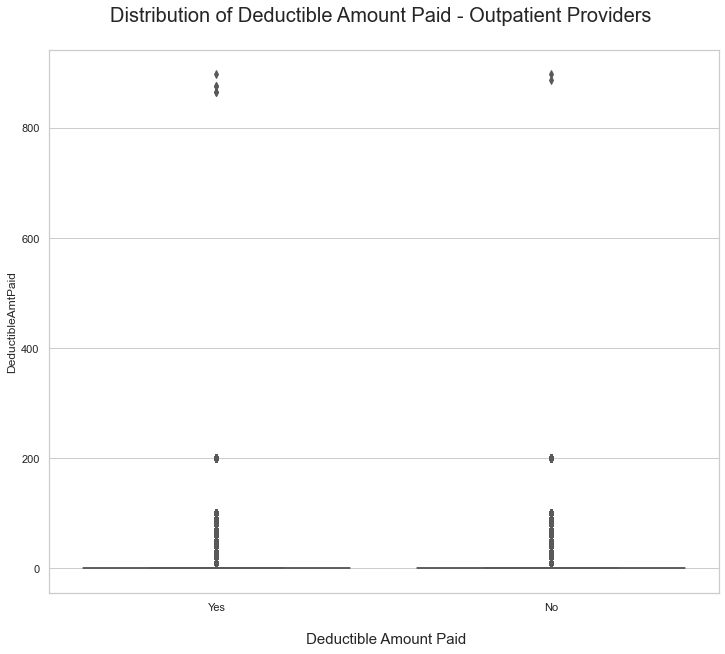

In [48]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=out_df, x="DeductibleAmtPaid", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = out_df,x = 'PotentialFraud',y = 'DeductibleAmtPaid',\
            palette='Set2')
plt.xlabel("\n Deductible Amount Paid", fontsize = 15)
plt.title("Distribution of Deductible Amount Paid - Outpatient Providers \n", fontsize = 20)
plt.show()

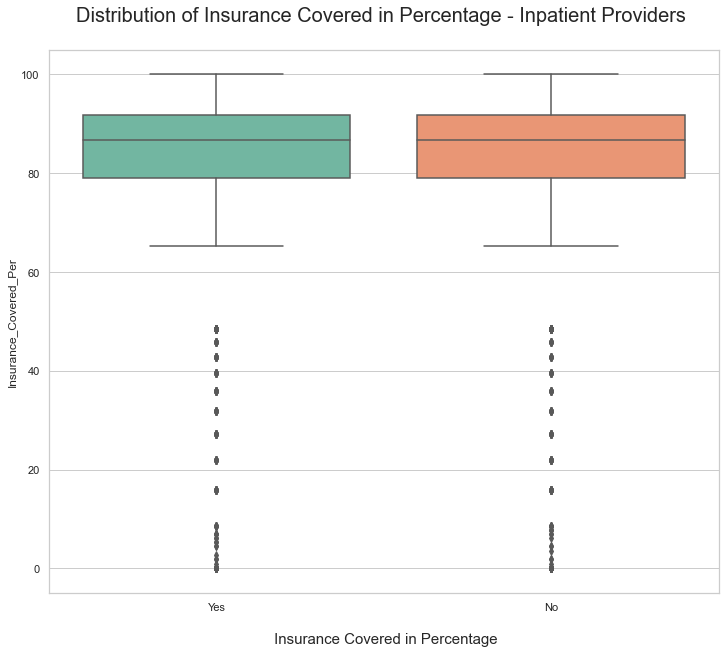

In [49]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=inp_df, x="Insurance_Covered_Per", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = inp_df,x = 'PotentialFraud',y = 'Insurance_Covered_Per',\
            palette='Set2')
plt.xlabel("\n Insurance Covered in Percentage", fontsize = 15)
plt.title("Distribution of Insurance Covered in Percentage - Inpatient Providers \n", fontsize = 20)
plt.show()

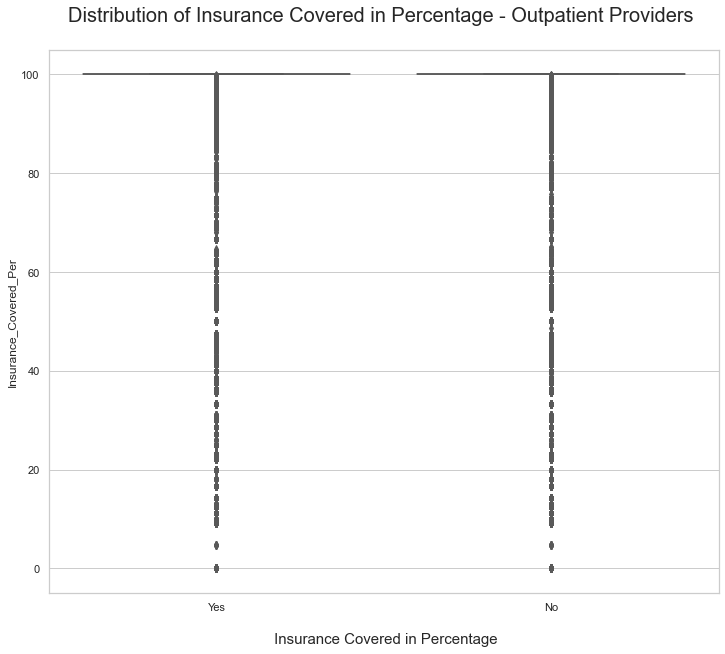

In [50]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=outp_df, x="Insurance_Covered_Per", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = out_df,x = 'PotentialFraud',y = 'Insurance_Covered_Per',\
            palette='Set2')
plt.xlabel("\n Insurance Covered in Percentage", fontsize = 15)
plt.title("Distribution of Insurance Covered in Percentage - Outpatient Providers \n", fontsize = 20)
plt.show()

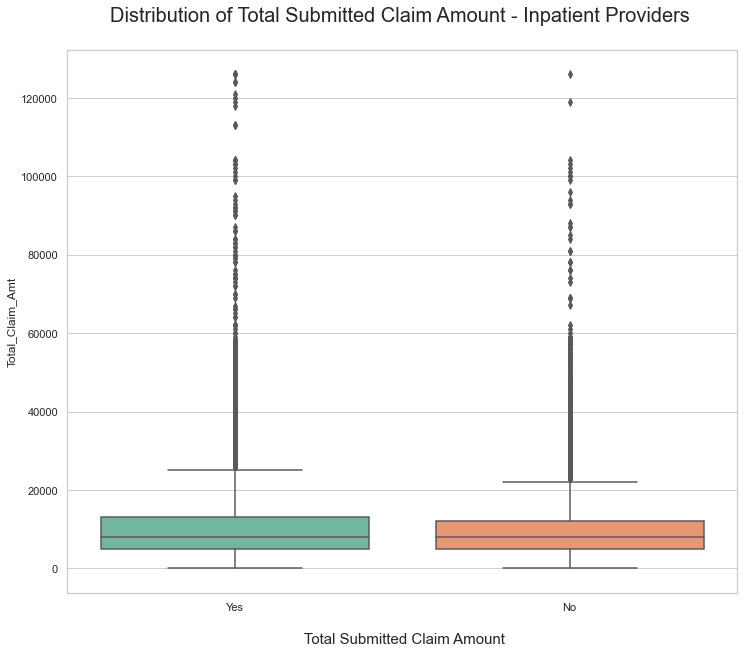

In [51]:
plt.figure(figsize = (12,10))
# sns.kdeplot(data=inp_df, x="Total_Claim_Amt", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = inp_df,x = 'PotentialFraud',y = 'Total_Claim_Amt',\
            palette='Set2')
plt.xlabel("\n Total Submitted Claim Amount", fontsize = 15)
plt.title("Distribution of Total Submitted Claim Amount - Inpatient Providers \n", fontsize = 20)
plt.show()

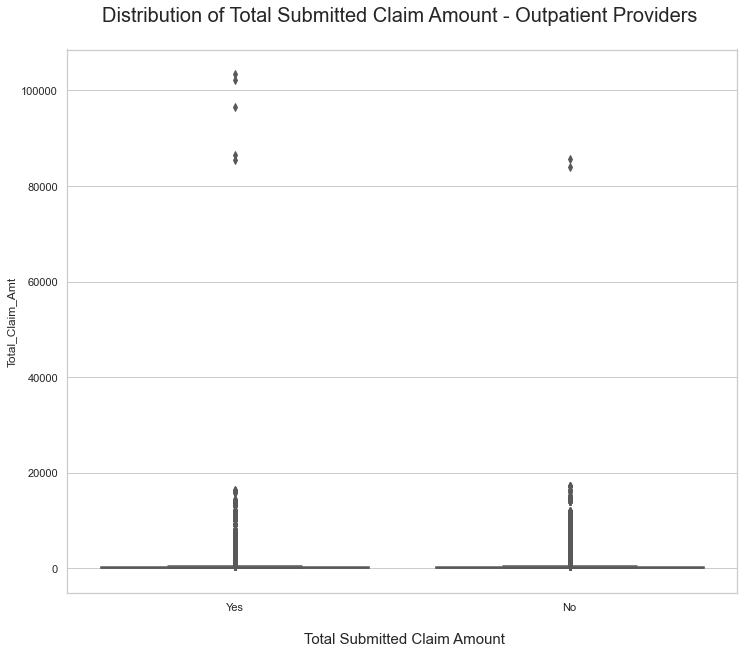

In [52]:
# Plotting the results

plt.figure(figsize = (12,10))
# sns.kdeplot(data=out_df, x="Total_Claim_Amt", hue="PotentialFraud",\
#             fill=True, palette='hls')
sns.boxplot(data = out_df,x = 'PotentialFraud',y = 'Total_Claim_Amt',\
            palette='Set2')
plt.xlabel("\n Total Submitted Claim Amount", fontsize = 15)
plt.title("Distribution of Total Submitted Claim Amount - Outpatient Providers \n", fontsize = 20)
plt.show()

### Looking at maximum reimbursement received per fraud/non-fraud provider

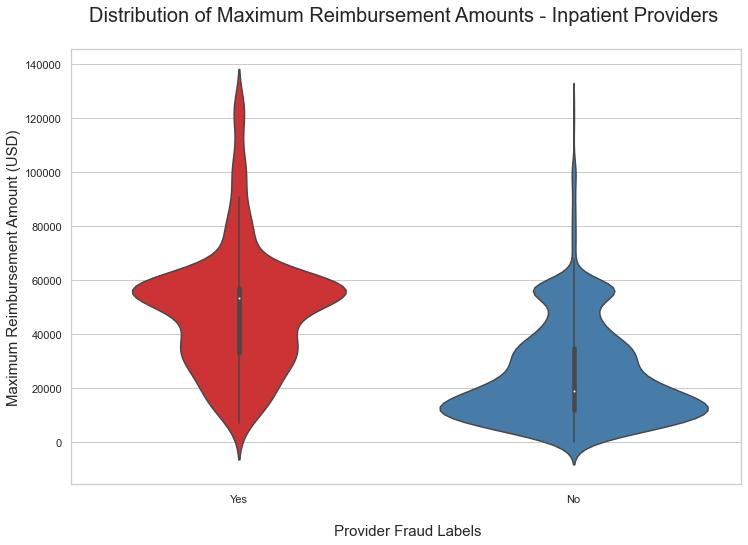

In [53]:
# Inpatient = looking at maximum reimbursement received per provider: 

in_reim_max = inp_df[['Provider','InscClaimAmtReimbursed']].groupby('Provider')\
                   .agg(['max']).reset_index()
in_reim_max.columns=['Provider', 'Max_Reimbursement']
in_reim_max = in_reim_max.sort_values(by='Max_Reimbursement',ascending=False)

# Adding fraud labels

in_reim_max = in_reim_max.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_reim_max["PotentialFraud"], y=in_reim_max["Max_Reimbursement"], palette='Set1')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Maximum Reimbursement Amount (USD)", fontsize = 15)
plt.title("Distribution of Maximum Reimbursement Amounts - Inpatient Providers \n", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Hospitals with highest Max Reimbursements received \n')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


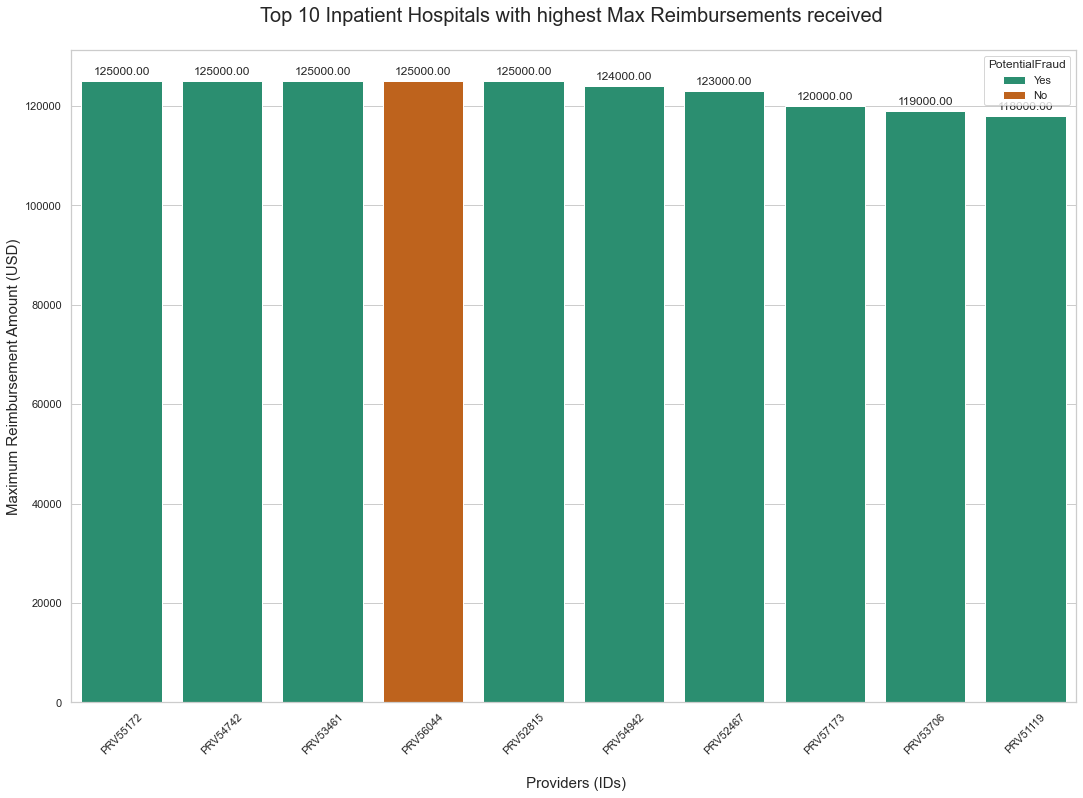

In [54]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
plot = sns.barplot(data=in_reim_max.head(10), x='Provider',y='Max_Reimbursement',\
                   hue='PotentialFraud', dodge=False, palette="Dark2")
show_values(plot)
plt.xticks(rotation=45)
plt.xlabel("\n Providers (IDs)", fontsize = 15)
plt.ylabel("Maximum Reimbursement Amount (USD)", fontsize = 15)
plt.title("Top 10 Inpatient Hospitals with highest Max Reimbursements received \n", fontsize = 20)

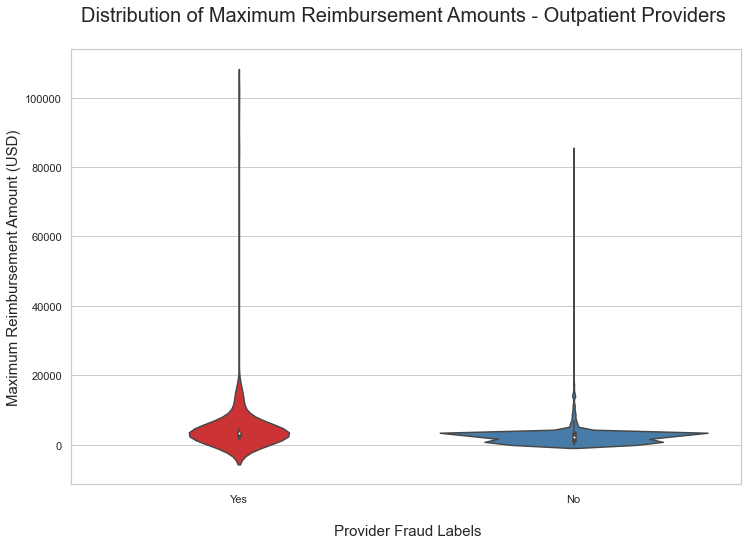

In [55]:
# Outpatient = looking at maximum reimbursement received per provider: 

out_reim_max = out_df[['Provider','InscClaimAmtReimbursed']].groupby('Provider')\
                   .agg(['max']).reset_index()
out_reim_max.columns=['Provider', 'Max_Reimbursement']
out_reim_max = out_reim_max.sort_values(by='Max_Reimbursement',ascending=False)

# Adding fraud labels

out_reim_max = out_reim_max.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_reim_max["PotentialFraud"], y=out_reim_max["Max_Reimbursement"], palette='Set1')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Maximum Reimbursement Amount (USD)", fontsize = 15)
plt.title("Distribution of Maximum Reimbursement Amounts - Outpatient Providers \n", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Outpatient Hospitals with highest Max Reimbursements received \n')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


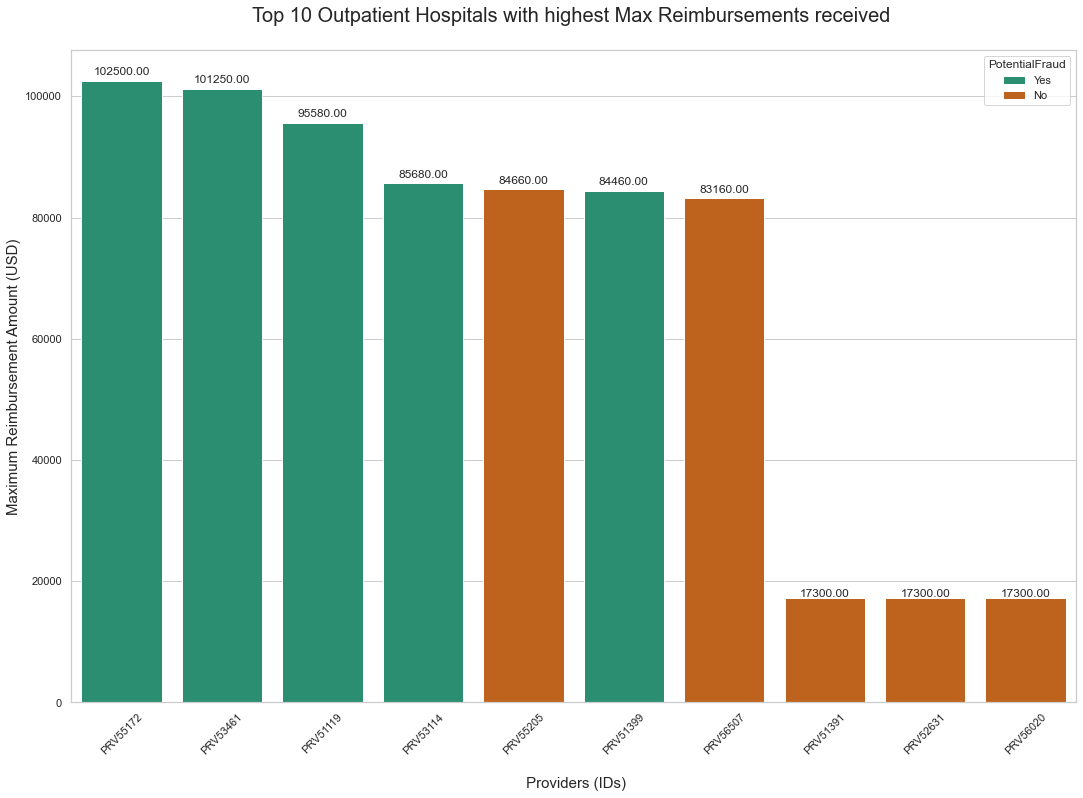

In [56]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
plot = sns.barplot(data=out_reim_max.head(10), x='Provider',y='Max_Reimbursement',\
                   hue='PotentialFraud', dodge=False, palette="Dark2")
show_values(plot)
plt.xticks(rotation=45)
plt.xlabel("\n Providers (IDs)", fontsize = 15)
plt.ylabel("Maximum Reimbursement Amount (USD)", fontsize = 15)
plt.title("Top 10 Outpatient Hospitals with highest Max Reimbursements received \n", fontsize = 20)

### Looking at number of claims submitted for fraud and non-fraud providers

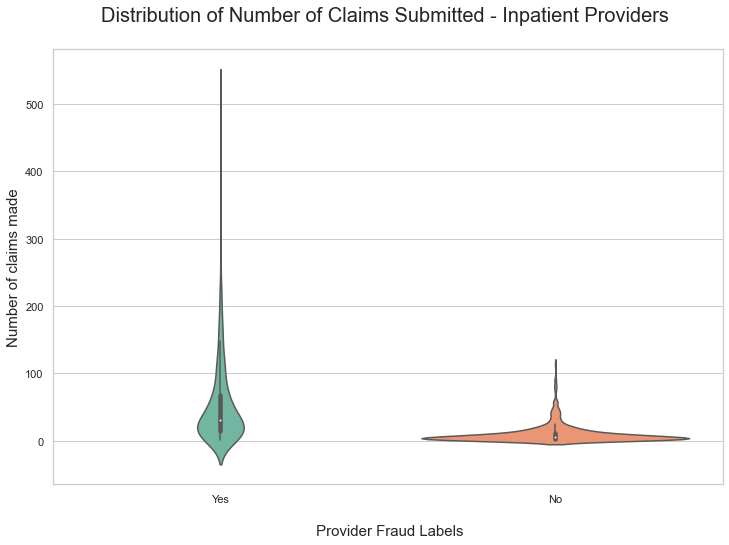

In [57]:
# Create df to number of claims per provider

in_prov_clm_df = inp_df[['Provider','ClaimID']].groupby('Provider').agg(['count']).reset_index()
in_prov_clm_df.columns=['Provider', 'No. of Claims']
in_prov_clm_df = in_prov_clm_df.sort_values(by='No. of Claims',ascending=False)

# Adding fraud labels

in_prov_clm_df = in_prov_clm_df.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_prov_clm_df["PotentialFraud"], y=in_prov_clm_df["No. of Claims"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Number of claims made", fontsize = 15)
plt.title("Distribution of Number of Claims Submitted - Inpatient Providers \n", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Hospitals with most Claims submitted \n')

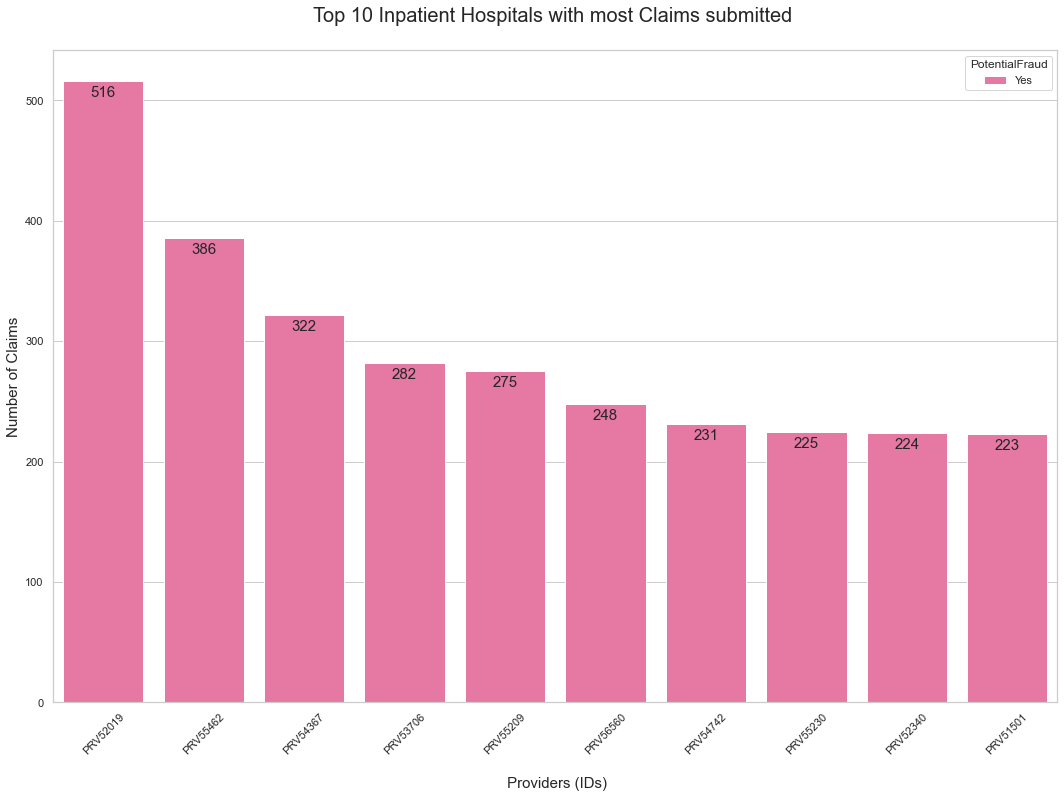

In [58]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=in_prov_clm_df.head(10), x='Provider',\
                   y='No. of Claims', hue='PotentialFraud', dodge=False, palette="RdPu")
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.xticks(rotation=45)    
plt.xlabel("\n Providers (IDs)", fontsize = 15)
plt.ylabel("Number of Claims", fontsize = 15)
plt.title("Top 10 Inpatient Hospitals with most Claims submitted \n", fontsize = 20)

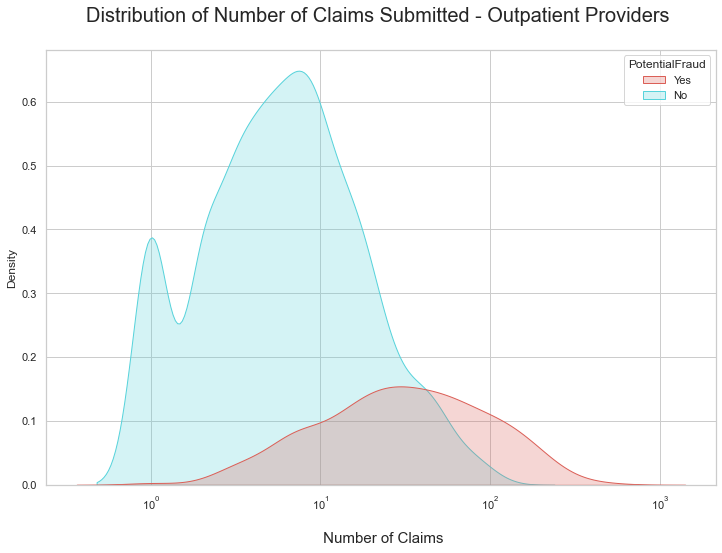

In [59]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=in_prov_clm_df, x="No. of Claims", hue="PotentialFraud", fill=True, log_scale=True, palette='hls')
plt.xlabel("\n Number of Claims", fontsize = 15)
plt.title("Distribution of Number of Claims Submitted - Outpatient Providers \n", fontsize = 20)
plt.show()

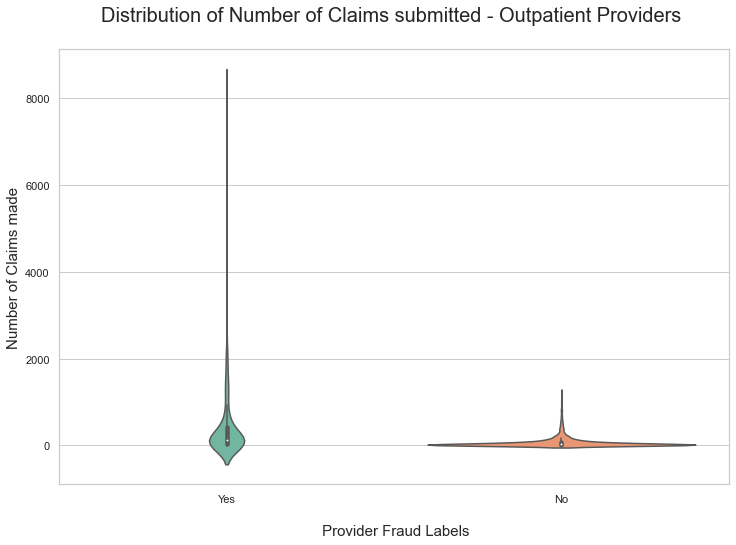

In [60]:
# Create df to number of claims per provider

out_prov_clm_df = out_df[['Provider','ClaimID']].groupby('Provider').agg(['count']).reset_index()
out_prov_clm_df.columns=['Provider', 'No. of Claims']
out_prov_clm_df = out_prov_clm_df.sort_values(by='No. of Claims',ascending=False)

# Adding fraud labels

out_prov_clm_df = out_prov_clm_df.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_prov_clm_df["PotentialFraud"], y=out_prov_clm_df["No. of Claims"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Number of Claims made", fontsize = 15)
plt.title("Distribution of Number of Claims submitted - Outpatient Providers \n", fontsize = 20)
plt.show()

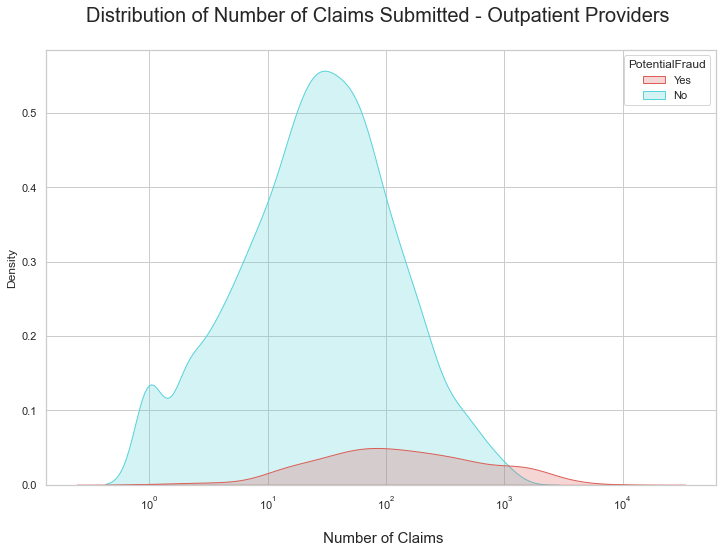

In [61]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=out_prov_clm_df, x="No. of Claims", hue="PotentialFraud", fill=True, log_scale=True, palette='hls')
plt.xlabel("\n Number of Claims", fontsize = 15)
plt.title("Distribution of Number of Claims Submitted - Outpatient Providers \n", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Outpatient Hospitals with most Claims submitted \n')

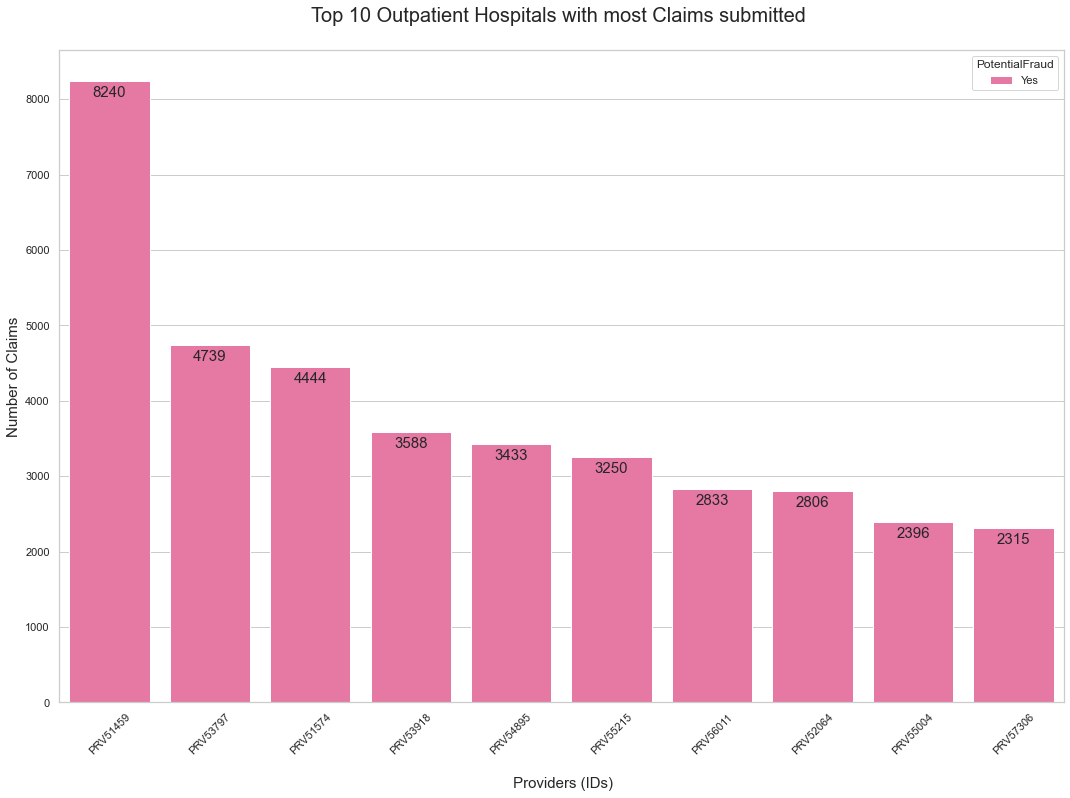

In [62]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=out_prov_clm_df.head(10), x='Provider',\
                   y='No. of Claims', hue='PotentialFraud', dodge=False, palette="RdPu")
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.xticks(rotation=45)    
plt.xlabel("\n Providers (IDs)", fontsize = 15)
plt.ylabel("Number of Claims", fontsize = 15)
plt.title("Top 10 Outpatient Hospitals with most Claims submitted \n", fontsize = 20)

### Looking at average Diagnosis Code Count for fraud and non-fraud providers

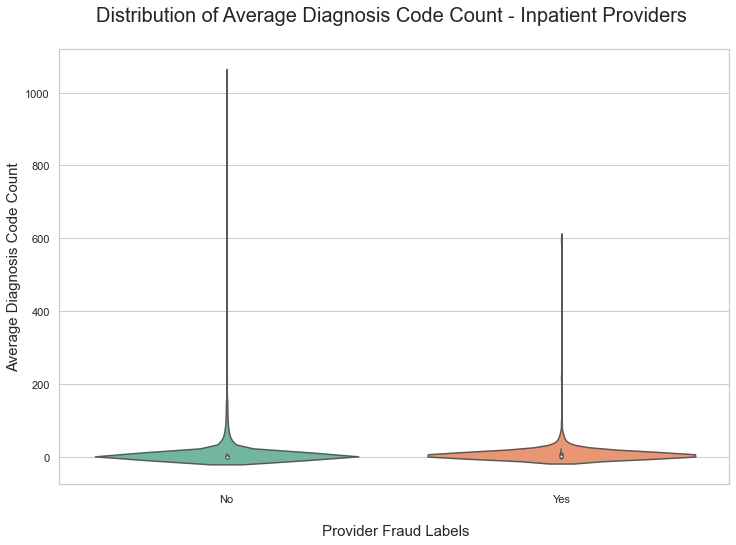

In [63]:
# Inpatient = looking at average Diagnosis Code Count per provider: 

in_diag_code = inp_df[['Provider','Diag_Code_Cnt']].groupby('Provider')\
                   .agg(['mean']).reset_index()
in_diag_code.columns=['Provider', 'Diag_Code_Cnt']
in_diag_code = in_diag_code.sort_values(by='Diag_Code_Cnt',ascending=False)

# Adding fraud labels

in_diag_code = in_diag_code.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_diag_code["PotentialFraud"], y=in_diag_code["Diag_Code_Cnt"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Diagnosis Code Count", fontsize = 15)
plt.title("Distribution of Average Diagnosis Code Count - Inpatient Providers \n", fontsize = 20)
plt.show()

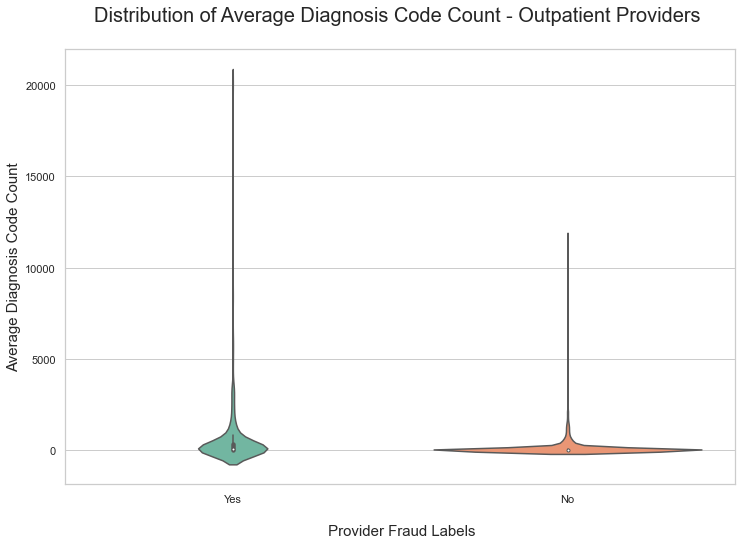

In [64]:
# Outpatient = looking at average Diagnosis Code Count per provider: 

out_diag_code = out_df[['Provider','Diag_Code_Cnt']].groupby('Provider')\
                   .agg(['max']).reset_index()
out_diag_code.columns=['Provider', 'Diag_Code_Cnt']
out_diag_code = out_diag_code.sort_values(by='Diag_Code_Cnt',ascending=False)

# Adding fraud labels

out_diag_code = out_diag_code.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_diag_code["PotentialFraud"], y=out_diag_code["Diag_Code_Cnt"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Diagnosis Code Count", fontsize = 15)
plt.title("Distribution of Average Diagnosis Code Count - Outpatient Providers \n", fontsize = 20)
plt.show()

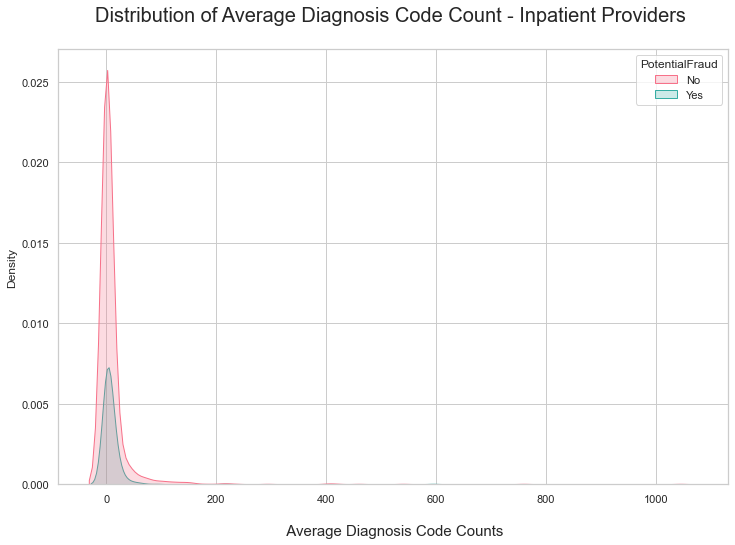

In [65]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=in_diag_code, x="Diag_Code_Cnt", hue="PotentialFraud", fill=True, palette='husl')
plt.xlabel("\n Average Diagnosis Code Counts", fontsize = 15)
plt.title("Distribution of Average Diagnosis Code Count - Inpatient Providers \n", fontsize = 20)
plt.show()

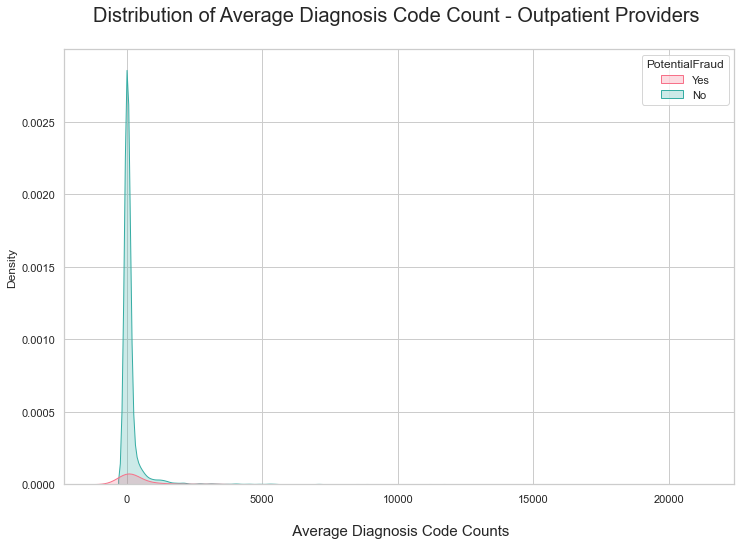

In [66]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=out_diag_code, x="Diag_Code_Cnt", hue="PotentialFraud", fill=True, palette='husl')
plt.xlabel("\n Average Diagnosis Code Counts", fontsize = 15)
plt.title("Distribution of Average Diagnosis Code Count - Outpatient Providers \n", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Hospitals with most Diagnosis Code Counts \n')

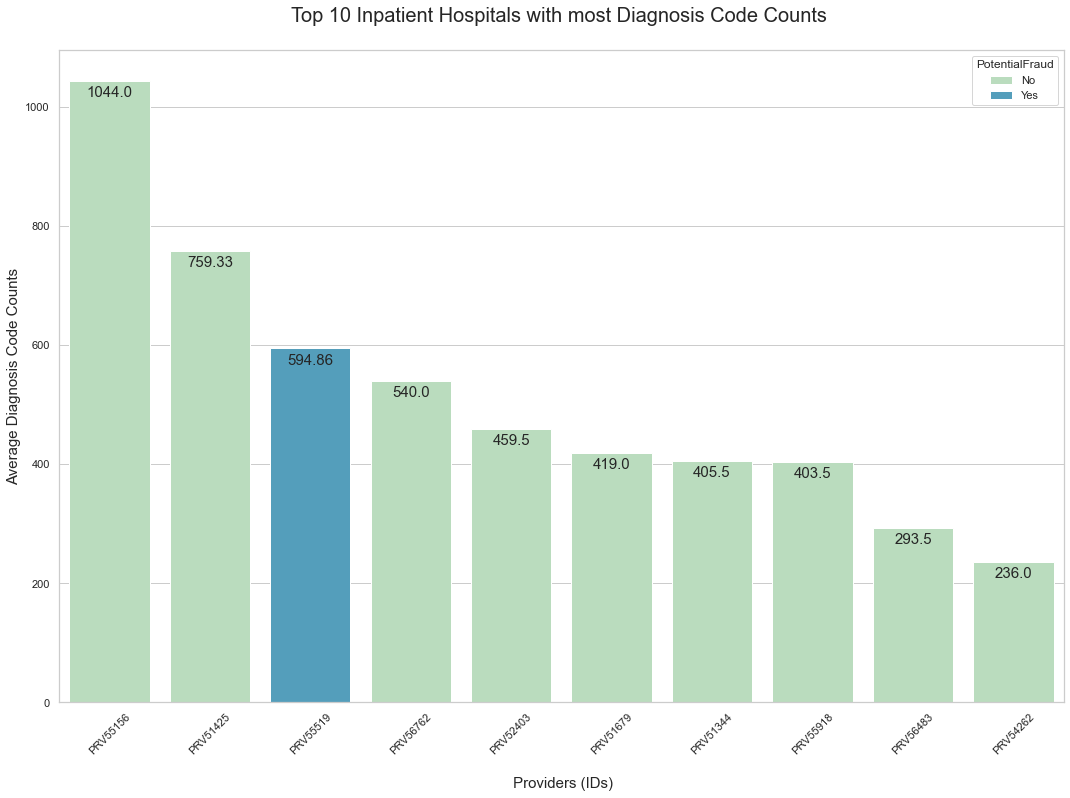

In [67]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=in_diag_code.head(10), x='Provider', dodge=False,\
                   y='Diag_Code_Cnt', hue='PotentialFraud', palette="GnBu")
for p in splot.patches:
    splot.annotate(format(p.get_height().round(2)), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.xticks(rotation=45)    
plt.xlabel("\n Providers (IDs)", fontsize = 15)
plt.ylabel("Average Diagnosis Code Counts", fontsize = 15)
plt.title("Top 10 Inpatient Hospitals with most Diagnosis Code Counts \n", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Outpatient Hospitals with most Diagnosis Code Counts \n')

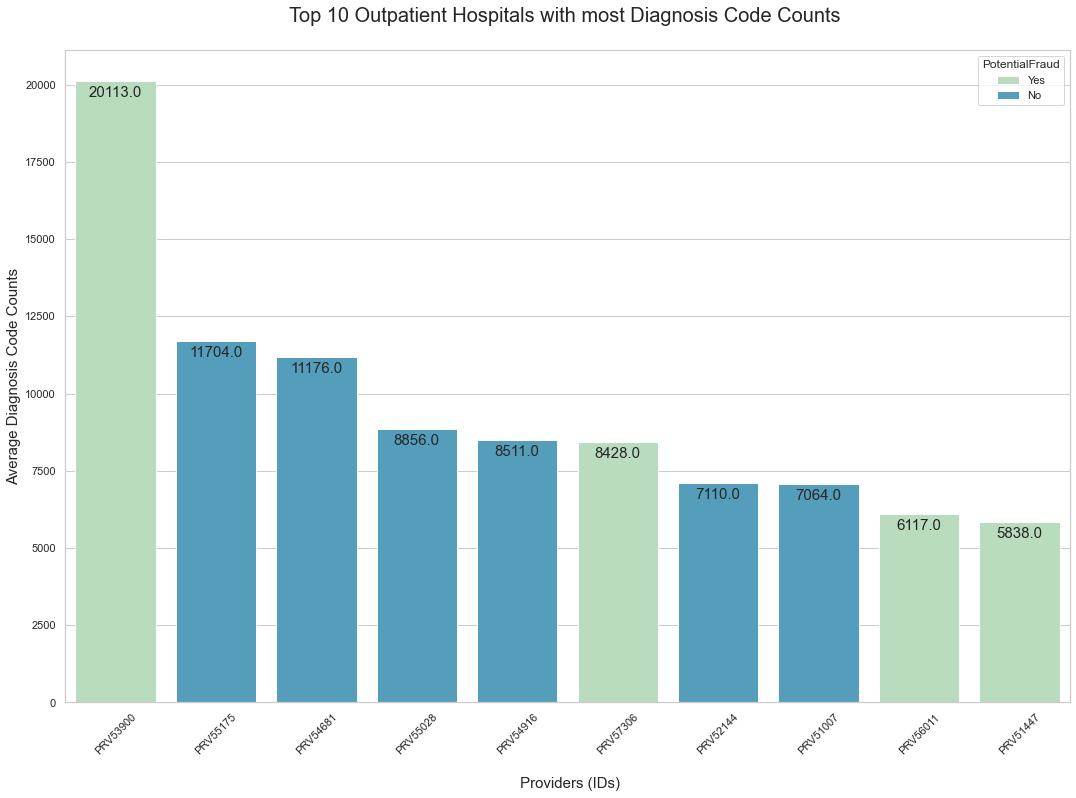

In [68]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=out_diag_code.head(10), x='Provider', y='Diag_Code_Cnt',\
                   hue='PotentialFraud', dodge=False, palette="GnBu")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.xticks(rotation=45)    
plt.xlabel("\n Providers (IDs)", fontsize = 15)
plt.ylabel("Average Diagnosis Code Counts", fontsize = 15)
plt.title("Top 10 Outpatient Hospitals with most Diagnosis Code Counts \n", fontsize = 20)

### Looking at average Procedure Code Count for fraud and non-fraud providers

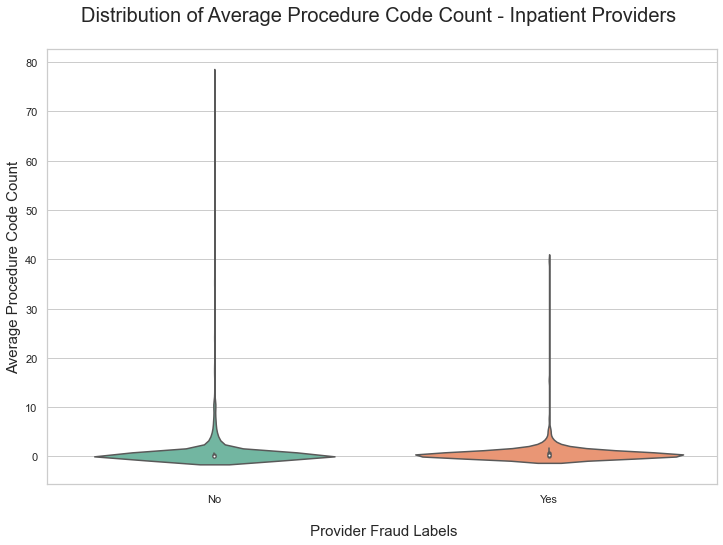

In [69]:
# Inpatient = looking at average Procedure Code Count per provider: 

in_proc_code = inp_df[['Provider','Proc_Code_Cnt']].groupby('Provider')\
                   .agg(['mean']).reset_index()
in_proc_code.columns=['Provider', 'Proc_Code_Cnt']
in_proc_code = in_proc_code.sort_values(by='Proc_Code_Cnt',ascending=False)

# Adding fraud labels

in_proc_code = in_proc_code.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_proc_code["PotentialFraud"], y=in_proc_code["Proc_Code_Cnt"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Procedure Code Count", fontsize = 15)
plt.title("Distribution of Average Procedure Code Count - Inpatient Providers \n", fontsize = 20)
plt.show()

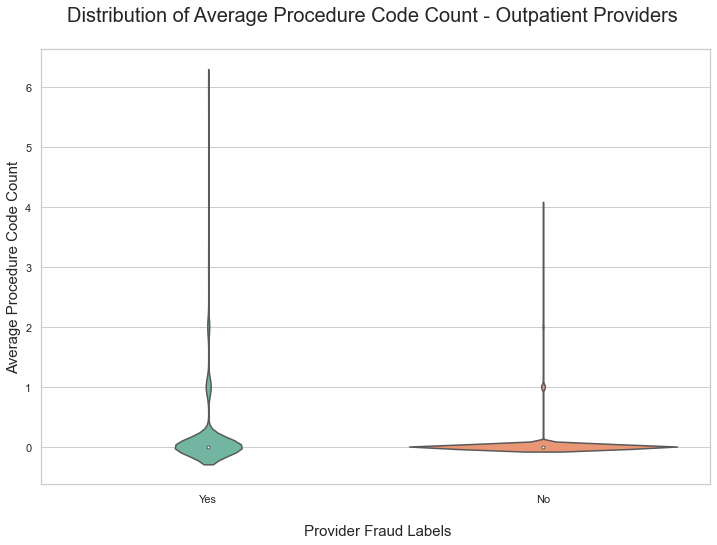

In [70]:
# Outpatient = looking at average Procedure Code Count per provider: 

out_proc_code = out_df[['Provider','Proc_Code_Cnt']].groupby('Provider')\
                   .agg(['max']).reset_index()
out_proc_code.columns=['Provider', 'Proc_Code_Cnt']
out_proc_code = out_proc_code.sort_values(by='Proc_Code_Cnt',ascending=False)

# Adding fraud labels

out_proc_code = out_proc_code.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_proc_code["PotentialFraud"], y=out_proc_code["Proc_Code_Cnt"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Procedure Code Count", fontsize = 15)
plt.title("Distribution of Average Procedure Code Count - Outpatient Providers \n", fontsize = 20)
plt.show()

### Looking at claim duration for fraud/non-fraud providers

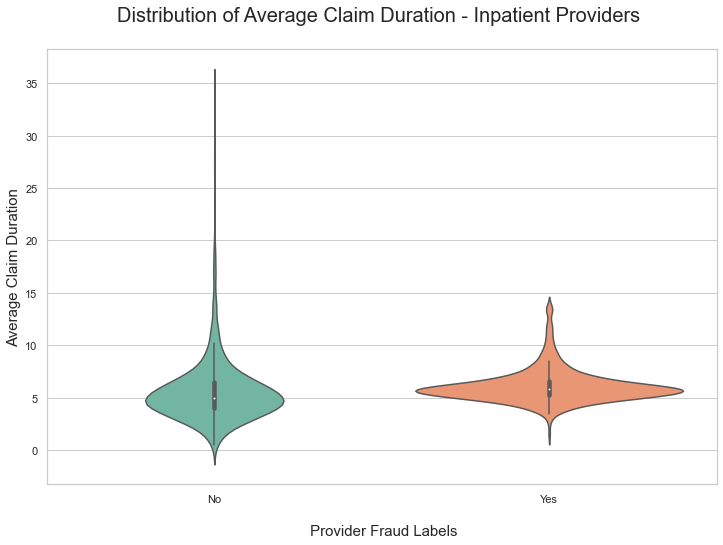

In [71]:
# Inpatient = looking at average Claim duration per provider: 

in_clm_dur = inp_df[['Provider','Claim_Duration']].groupby('Provider')\
                   .agg(['mean']).reset_index()
in_clm_dur.columns=['Provider', 'Claim_Duration']
in_clm_dur = in_clm_dur.sort_values(by='Claim_Duration',ascending=False)

# Adding fraud labels

in_clm_dur = in_clm_dur.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_clm_dur["PotentialFraud"], y=in_clm_dur["Claim_Duration"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Claim Duration", fontsize = 15)
plt.title("Distribution of Average Claim Duration - Inpatient Providers \n", fontsize = 20)
plt.show()

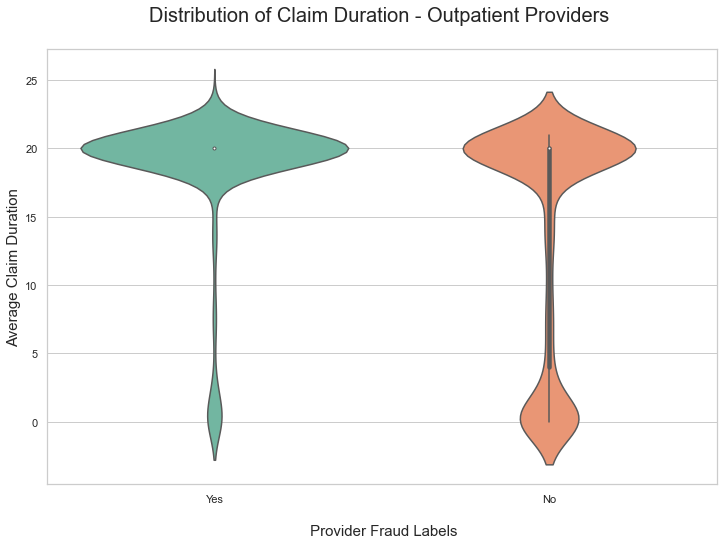

In [72]:
# Outpatient = looking at average Claim duration per provider: 

out_clm_dur = out_df[['Provider','Claim_Duration']].groupby('Provider')\
                   .agg(['max']).reset_index()
out_clm_dur.columns=['Provider', 'Claim_Duration']
out_clm_dur = out_clm_dur.sort_values(by='Claim_Duration',ascending=False)

# Adding fraud labels

out_clm_dur = out_clm_dur.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_clm_dur["PotentialFraud"], y=out_clm_dur["Claim_Duration"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Claim Duration", fontsize = 15)
plt.title("Distribution of Claim Duration - Outpatient Providers \n", fontsize = 20)
plt.show()

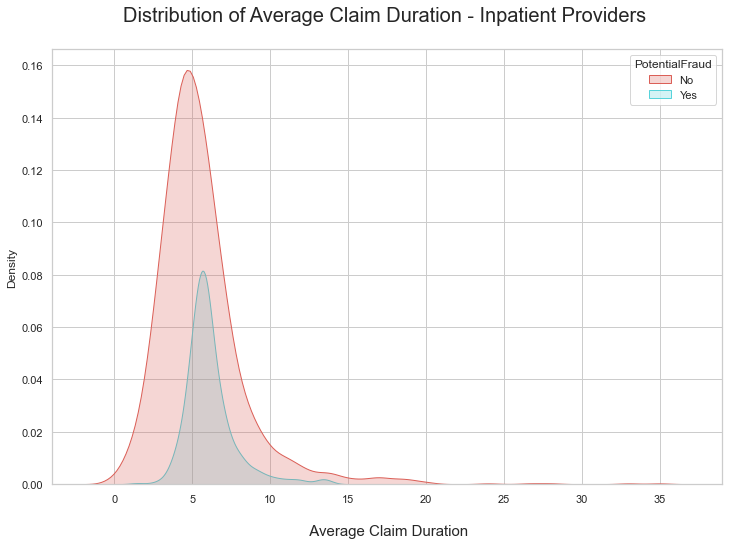

In [73]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=in_clm_dur, x="Claim_Duration", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("\n Average Claim Duration", fontsize = 15)
plt.title("Distribution of Average Claim Duration - Inpatient Providers \n", fontsize = 20)
plt.show()

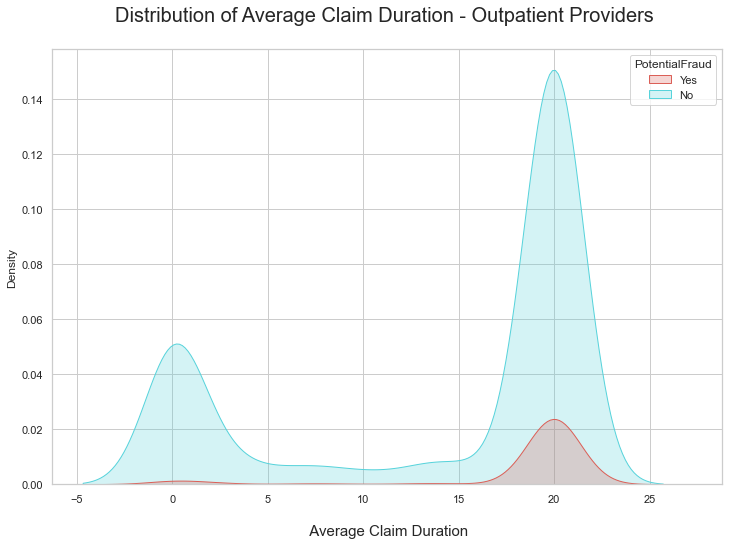

In [74]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=out_clm_dur, x="Claim_Duration", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("\n Average Claim Duration", fontsize = 15)
plt.title("Distribution of Average Claim Duration - Outpatient Providers \n", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Hospitals with most Claim Durations \n')

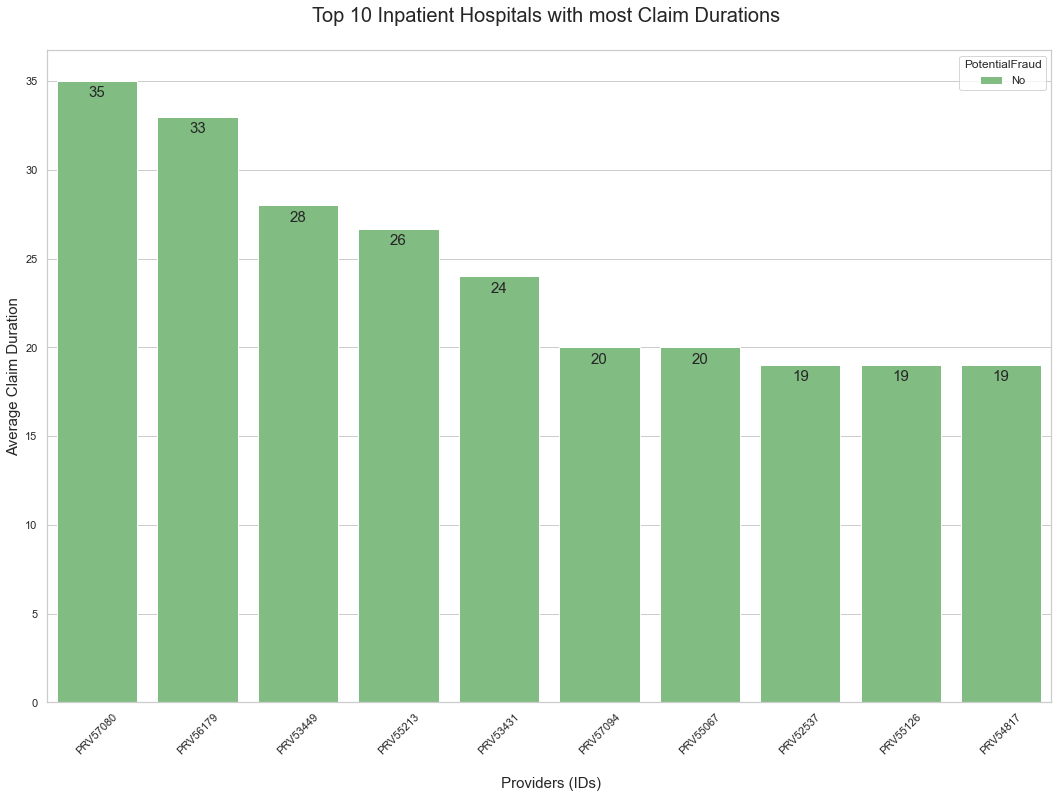

In [75]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=in_clm_dur.head(10), x='Provider', dodge=False,\
                   y='Claim_Duration', hue='PotentialFraud', palette="YlGn")
for p in splot.patches:
    splot.annotate(format(int(p.get_height())), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.xticks(rotation=45)    
plt.xlabel("\n Providers (IDs)", fontsize = 15)
plt.ylabel("Average Claim Duration", fontsize = 15)
plt.title("Top 10 Inpatient Hospitals with most Claim Durations \n", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Outpatient Hospitals with most Claim Durations \n')

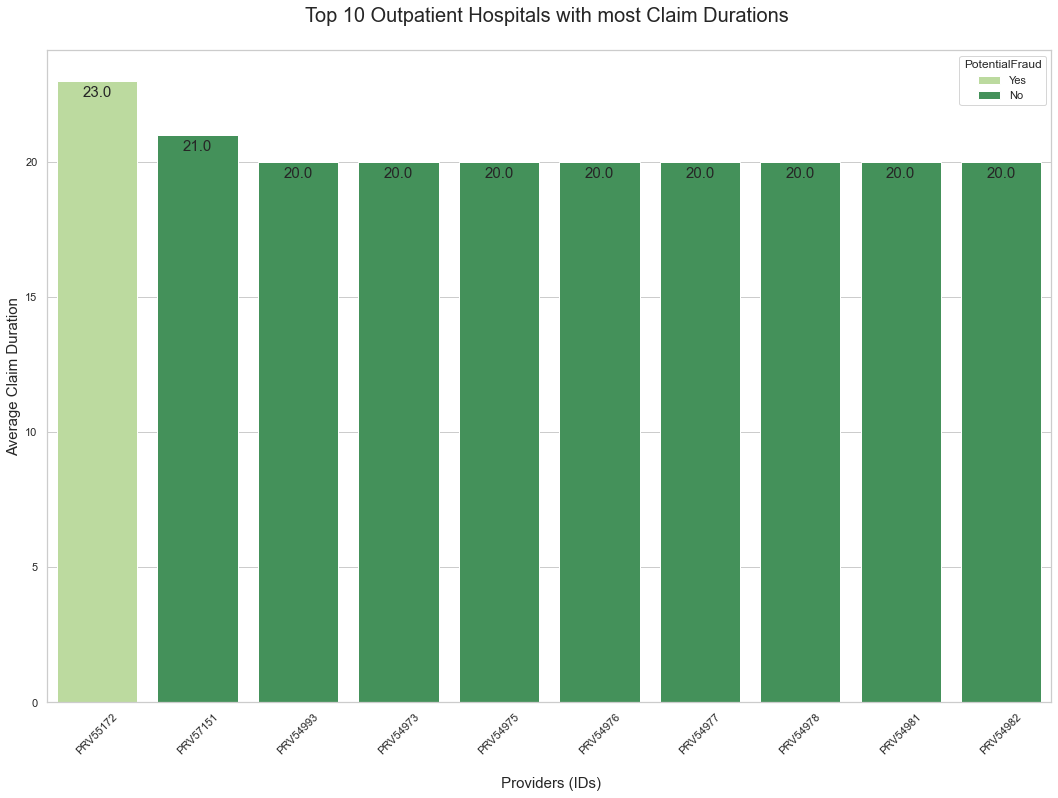

In [76]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=out_clm_dur.head(10), x='Provider', y='Claim_Duration',\
                   hue='PotentialFraud', dodge=False, palette="YlGn")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=45)    
plt.xlabel("\n Providers (IDs)", fontsize = 15)
plt.ylabel("Average Claim Duration", fontsize = 15)
plt.title("Top 10 Outpatient Hospitals with most Claim Durations \n", fontsize = 20)

### Looking at average patient age for fraud/non-fraud providers

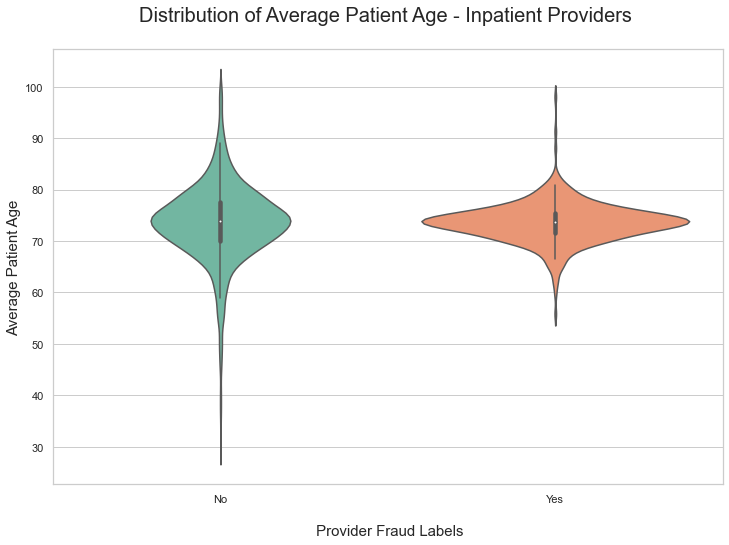

In [77]:
# Inpatient = looking at average patient age per provider: 

in_pat_age = inp_df[['Provider','Age']].groupby('Provider')\
                   .agg(['mean']).reset_index()
in_pat_age.columns=['Provider', 'Age']
in_pat_age = in_pat_age.sort_values(by='Age',ascending=False)

# Adding fraud labels

in_pat_age = in_pat_age.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_pat_age["PotentialFraud"], y=in_pat_age["Age"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Patient Age", fontsize = 15)
plt.title("Distribution of Average Patient Age - Inpatient Providers \n", fontsize = 20)
plt.show()

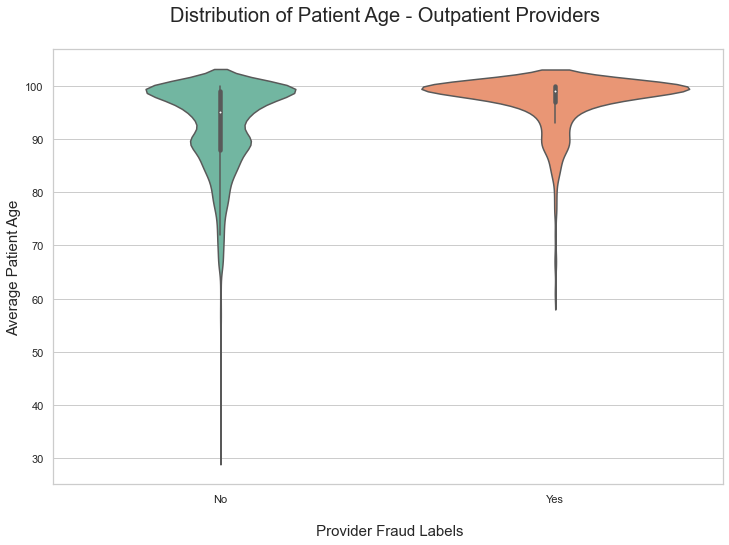

In [78]:
# Outpatient = looking at average Claim duration per provider: 

out_pat_age = out_df[['Provider','Age']].groupby('Provider')\
                   .agg(['max']).reset_index()
out_pat_age.columns=['Provider', 'Age']
out_pat_age = out_pat_age.sort_values(by='Age',ascending=False)

# Adding fraud labels

out_pat_age = out_pat_age.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_pat_age["PotentialFraud"], y=out_pat_age["Age"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Patient Age", fontsize = 15)
plt.title("Distribution of Patient Age - Outpatient Providers \n", fontsize = 20)
plt.show()

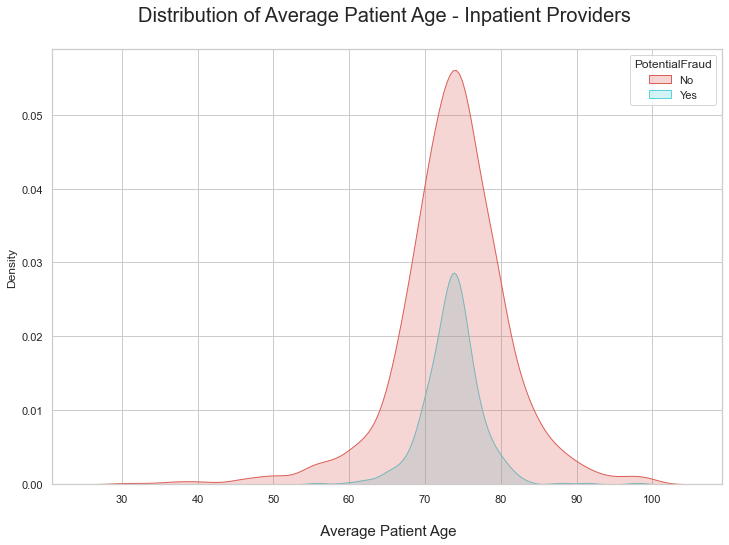

In [79]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=in_pat_age, x="Age", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("\n Average Patient Age", fontsize = 15)
plt.title("Distribution of Average Patient Age - Inpatient Providers \n", fontsize = 20)
plt.show()

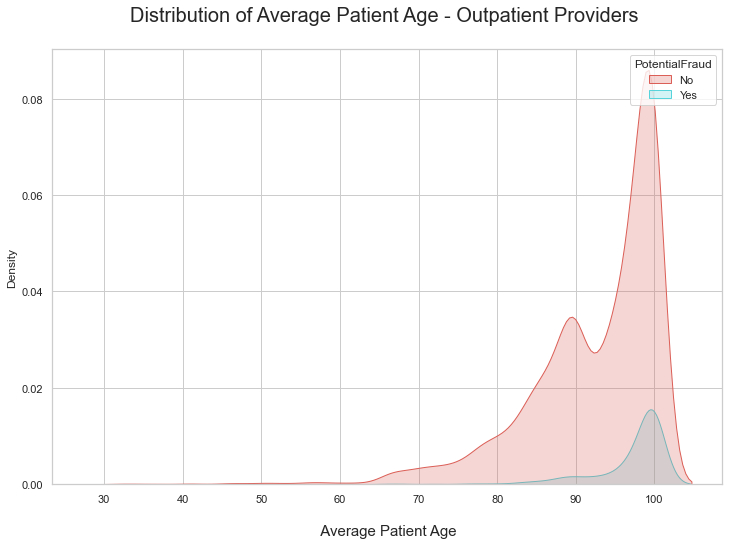

In [80]:
# Plotting the results

plt.figure(figsize = (12,8))
sns.kdeplot(data=out_pat_age, x="Age", hue="PotentialFraud", fill=True, palette='hls')
plt.xlabel("\n Average Patient Age", fontsize = 15)
plt.title("Distribution of Average Patient Age - Outpatient Providers \n", fontsize = 20)
plt.show()

Text(0.5, 1.0, 'Top 10 Inpatient Hospitals with highest average Patient Age \n')

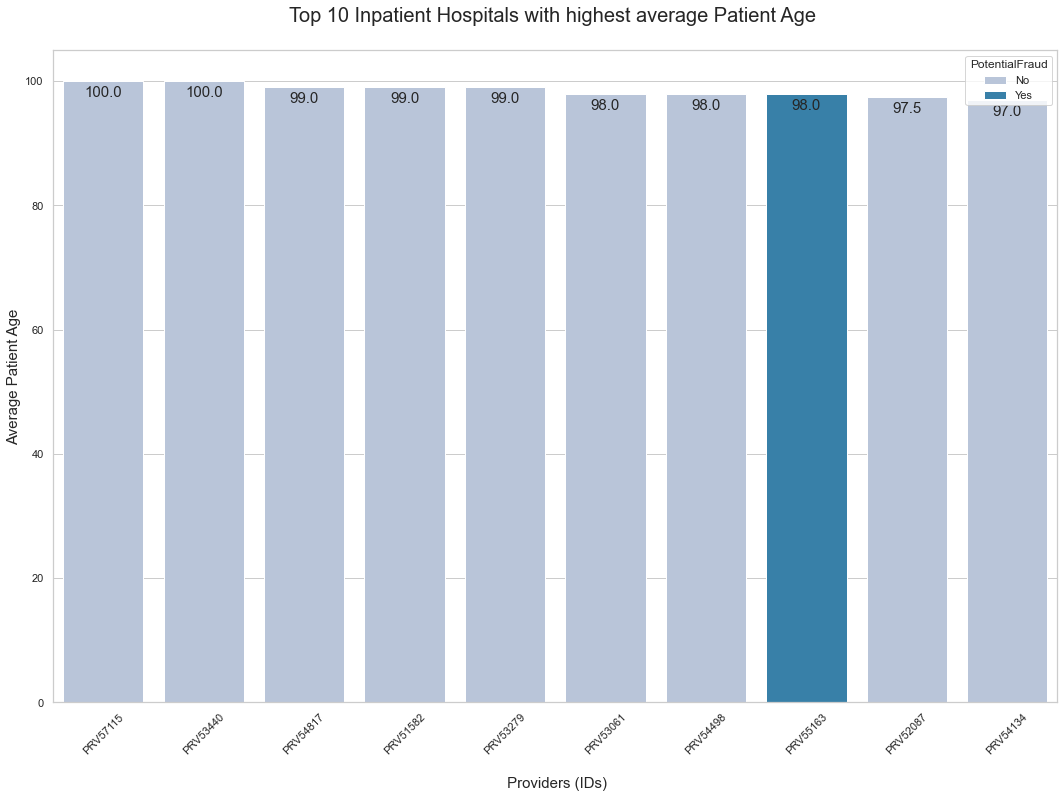

In [81]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=in_pat_age.head(10), x='Provider', dodge=False,\
                   y='Age', hue='PotentialFraud', palette="PuBu")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
    
plt.xticks(rotation=45)    
plt.xlabel("\n Providers (IDs)", fontsize = 15)
plt.ylabel("Average Patient Age", fontsize = 15)
plt.title("Top 10 Inpatient Hospitals with highest average Patient Age \n", fontsize = 20)

Text(0.5, 1.0, 'Top 10 Outpatient Hospitals with highest average Patient Age \n')

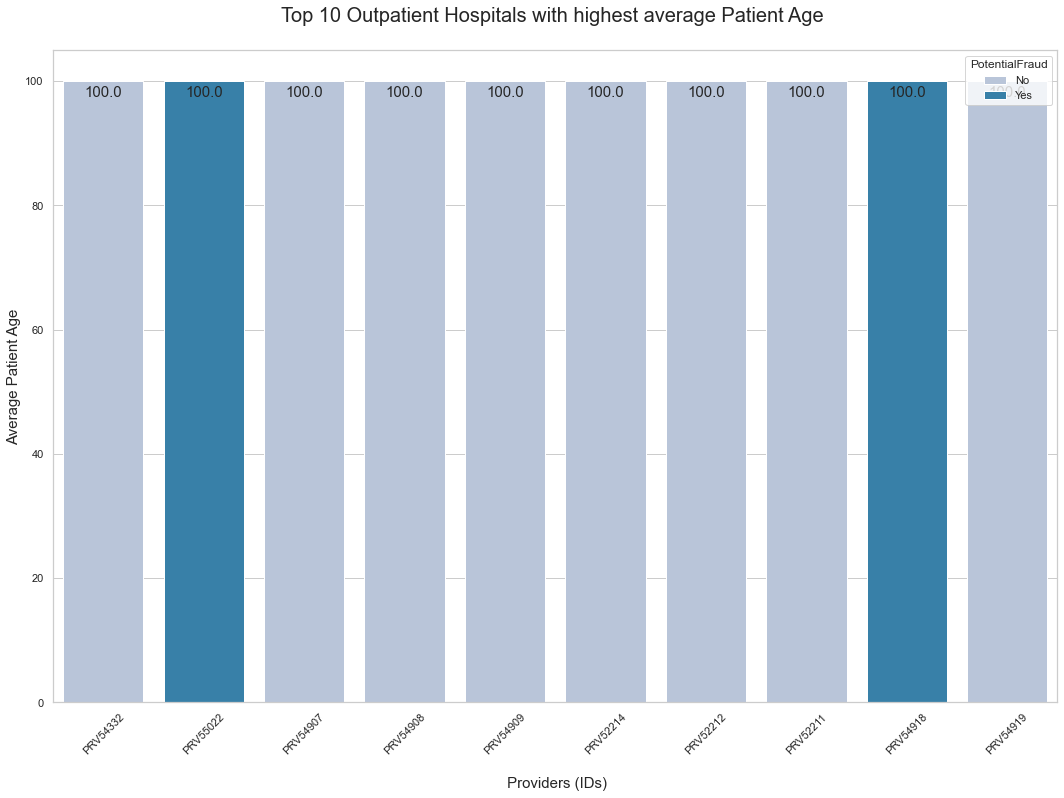

In [82]:
# Plotting the results

plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=out_pat_age.head(10), x='Provider', y='Age',\
                   hue='PotentialFraud', dodge=False, palette="PuBu")
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

plt.xticks(rotation=45)    
plt.xlabel("\n Providers (IDs)", fontsize = 15)
plt.ylabel("Average Patient Age", fontsize = 15)
plt.title("Top 10 Outpatient Hospitals with highest average Patient Age \n", fontsize = 20)

### Looking at corr matrix for some features

In [83]:
# Using only certain features from the complete set

inp_corr = inp_df[['Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',\
                   'Deceased', 'Age', 'Tot_Reimbursed_Amt','Tot_Deductible_Amt',\
                   'DOB_year','DOB_month', 'InscClaimAmtReimbursed','DeductibleAmtPaid',\
                   'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay','Claim_Duration',\
                   'Claim_Start_Year', 'Claim_Start_Month', 'Insurance_Covered_Per',\
                   'Total_Claim_Amt', 'Physician_Count', 'Claim_Count', 'Hospital_Count',\
                   'Chr_Cond_Count']]

out_corr= inp_df[['Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',\
                   'Deceased', 'Age', 'Tot_Reimbursed_Amt','Tot_Deductible_Amt',\
                   'DOB_year','DOB_month', 'InscClaimAmtReimbursed','DeductibleAmtPaid',\
                   'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Hospital_Stay','Claim_Duration',\
                   'Claim_Start_Year', 'Claim_Start_Month', 'Insurance_Covered_Per',\
                   'Total_Claim_Amt', 'Physician_Count', 'Claim_Count', 'Hospital_Count',\
                   'Chr_Cond_Count']]

<AxesSubplot:>

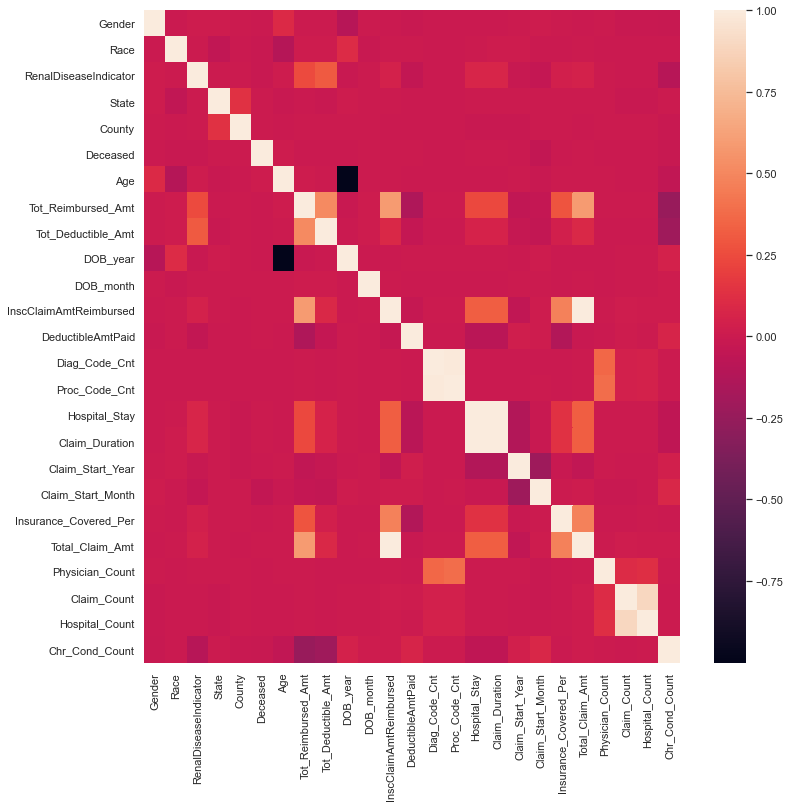

In [84]:
# Inpatient dataset correlation map

plt.figure(figsize=(12, 12))
sns.heatmap(inp_corr.corr())

<AxesSubplot:>

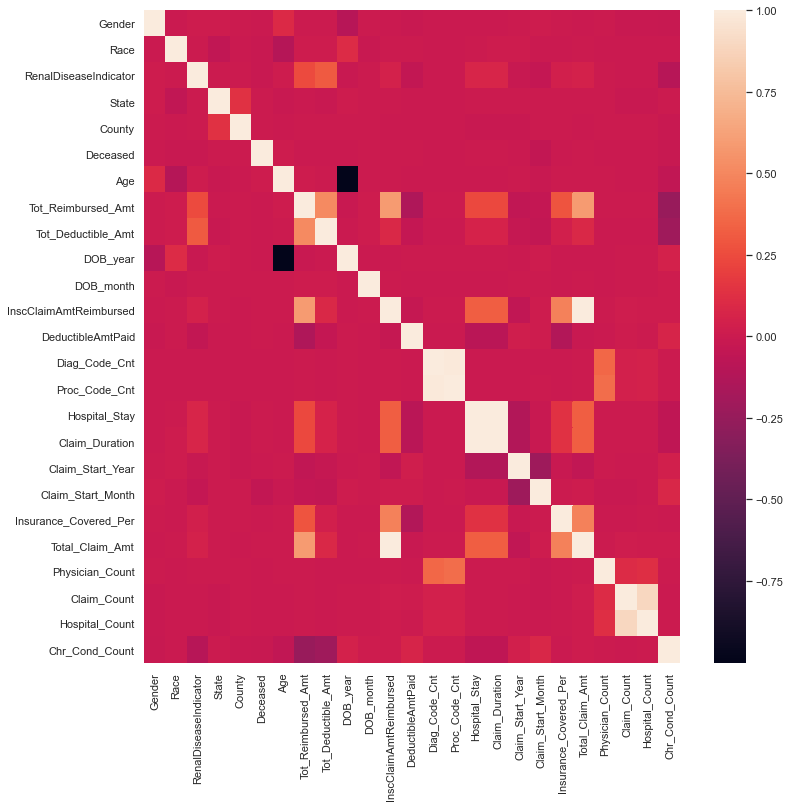

In [85]:
# Outatient dataset correlation map

plt.figure(figsize=(12, 12))
sns.heatmap(out_corr.corr())

## Physician focused EDA

- Looking at other characteristics for attending Physicians with high inpatient/outpatient claims

In [86]:
# Number of claims for Inpatient doctors:

inp_doctors = pd.DataFrame(inp_df['AttendingPhysician'].value_counts()\
                              .sort_values(ascending=False)).reset_index()
inp_doctors.columns=['AttendingPhysician', 'Inpatient_Claims']
inp_doctors = inp_doctors.head(10)

# Number of claims for Outpatient doctors:

out_doctors = pd.DataFrame(out_df['AttendingPhysician'].value_counts()\
                              .sort_values(ascending=False)).reset_index()
out_doctors.columns=['AttendingPhysician', 'Outpatient_Claims']
out_doctors = out_doctors.head(10)

# Creating tables for merging to analyze other characteristics

df_inp = inp_df[['AttendingPhysician', 'Age', 'InscClaimAmtReimbursed',\
        'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Claim_Duration',\
        'Total_Claim_Amt', 'Chr_Cond_Count']]\
        .groupby('AttendingPhysician').agg(['mean']).astype(int)

df_out = out_df[['AttendingPhysician', 'Age', 'InscClaimAmtReimbursed',\
        'Diag_Code_Cnt', 'Proc_Code_Cnt', 'Claim_Duration',\
        'Total_Claim_Amt', 'Chr_Cond_Count']]\
        .groupby('AttendingPhysician').agg(['mean']).astype(int)

# Merging with claim count dfs

inp_doctors = inp_doctors.merge(df_inp, on='AttendingPhysician')
inp_doctors.columns=['Attd_Physician', 'Inp_Claims', 'mean_age','mean_ins_amt_reim', \
                     'mean_diag_cde','mean_proc_cde','mean_clm_dur','mean_tot_clm_amt','mean_chr_cond']
out_doctors = out_doctors.merge(df_out, on='AttendingPhysician')
out_doctors.columns=['Attd_Physician', 'Out_Claims', 'mean_age','mean_ins_amt_reim',\
                     'mean_diag_cde','mean_proc_cde','mean_clm_dur','mean_tot_clm_amt','mean_chr_cond']                                      

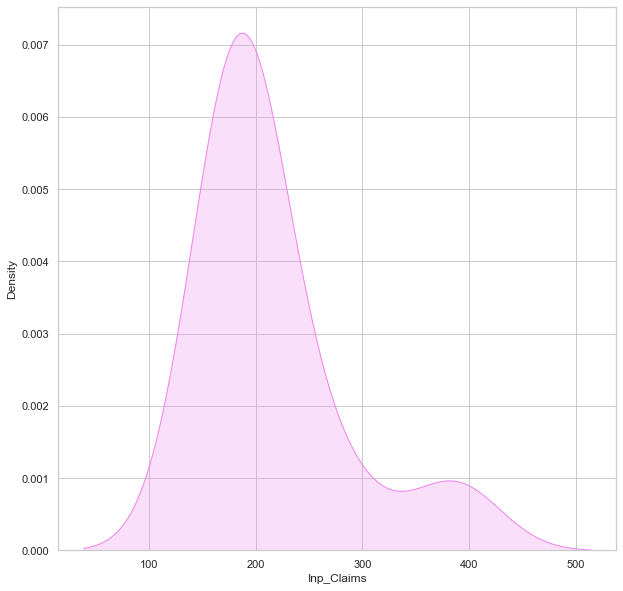

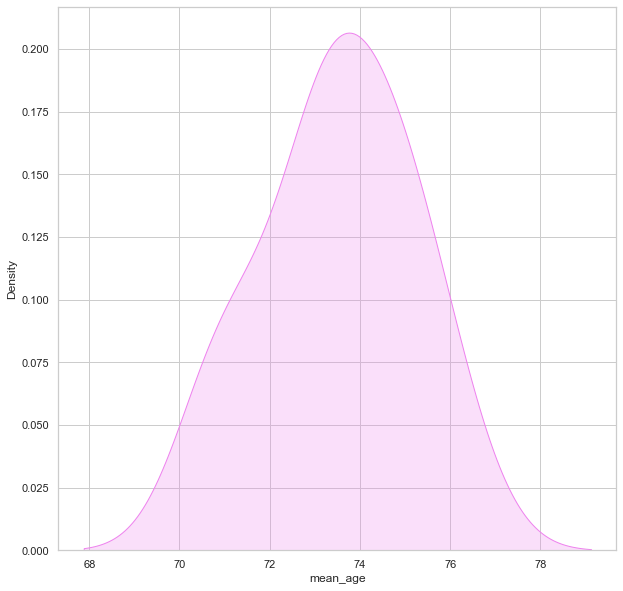

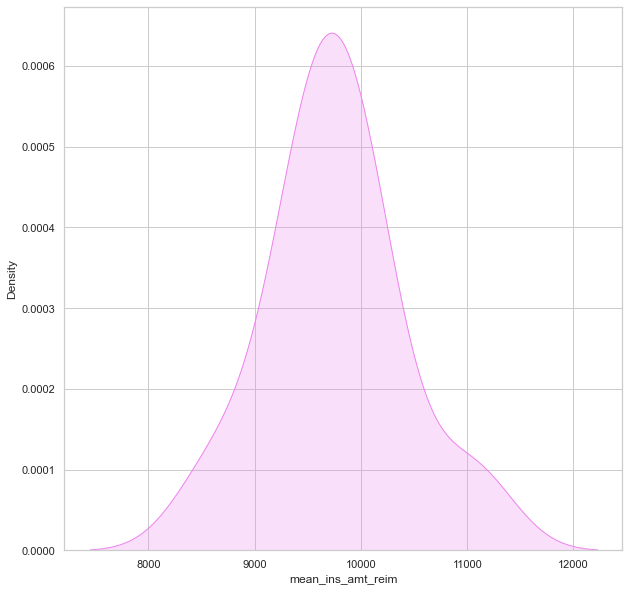

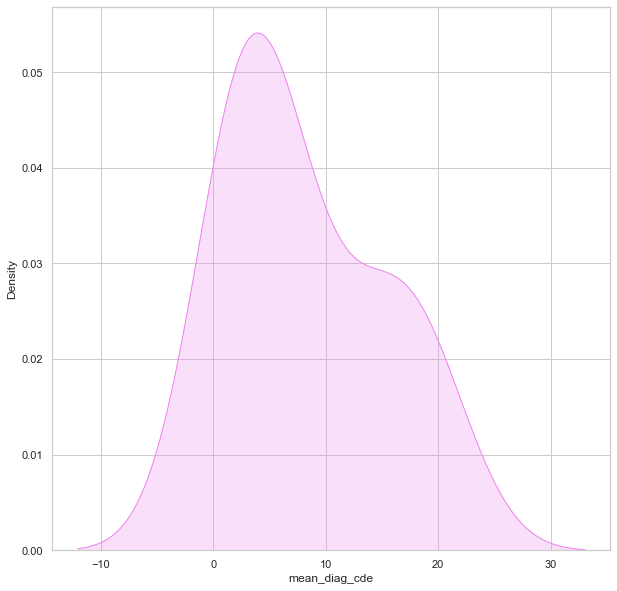

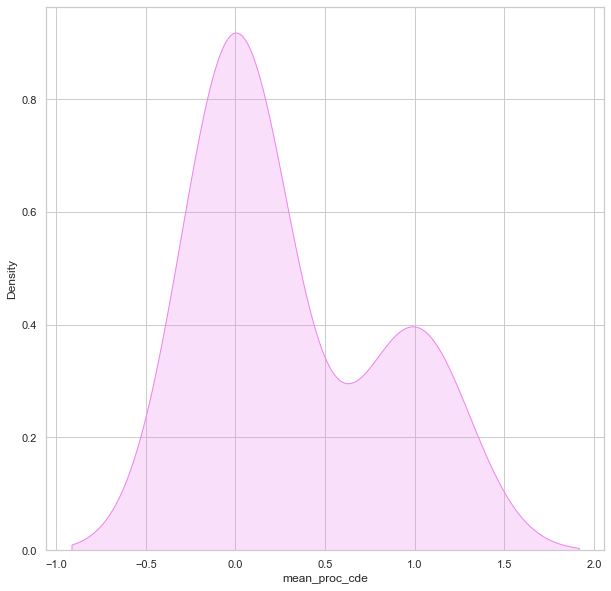

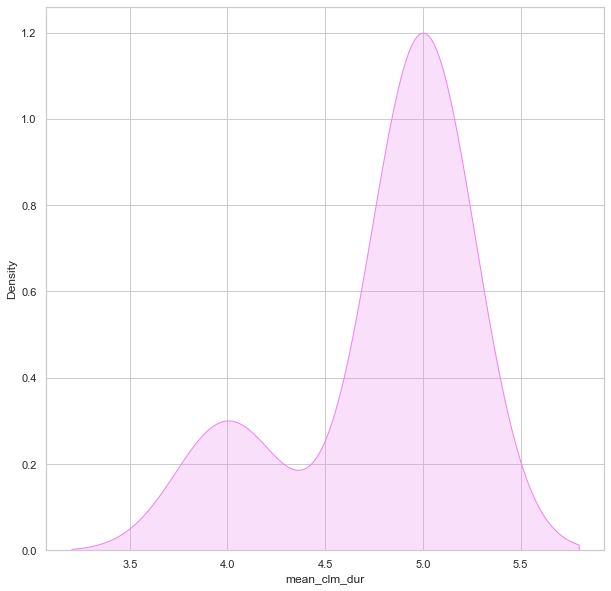

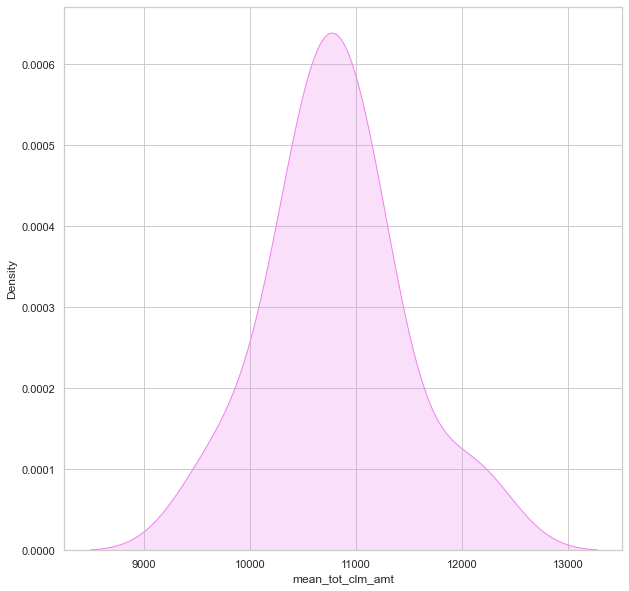

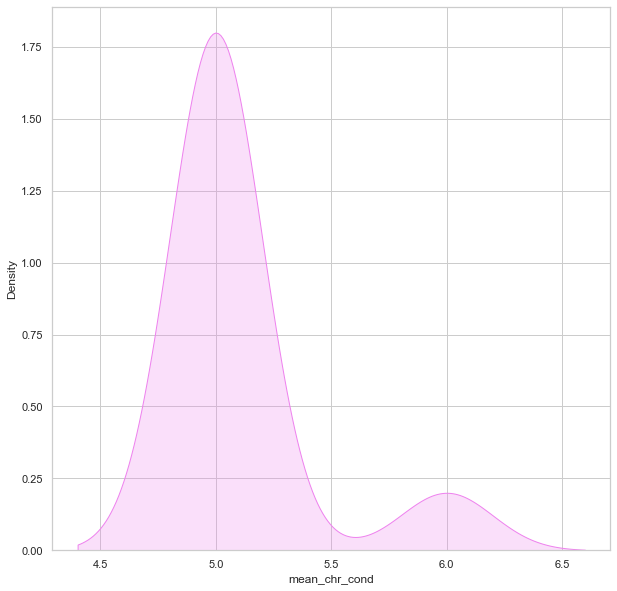

In [87]:
# Inpatient dataset density plots

col_list = ['Inp_Claims', 'mean_age', 'mean_ins_amt_reim','mean_diag_cde',\
           'mean_proc_cde', 'mean_clm_dur', 'mean_tot_clm_amt','mean_chr_cond']

for col in col_list:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = inp_doctors[col]
    sns.kdeplot(x, shade=True, color="violet")

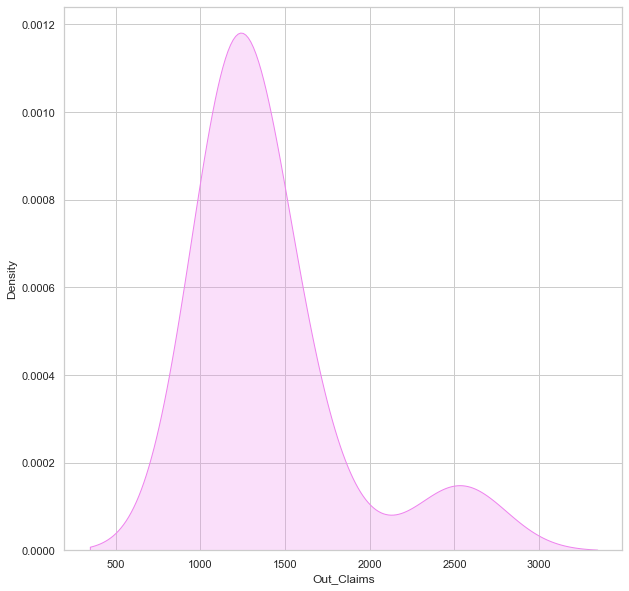

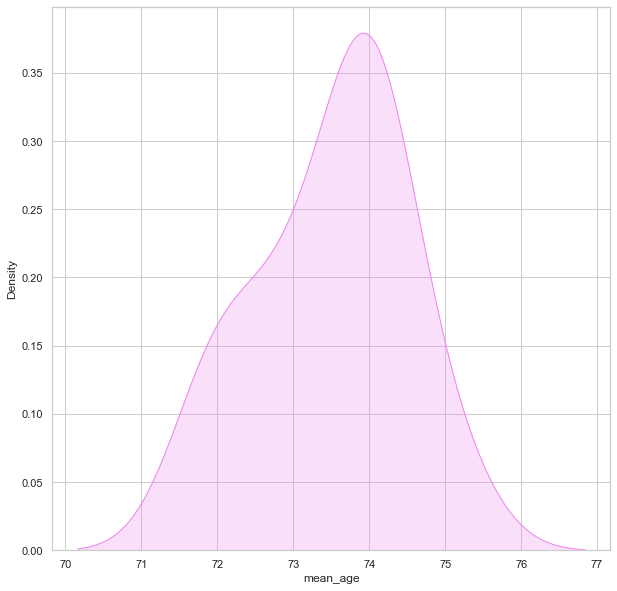

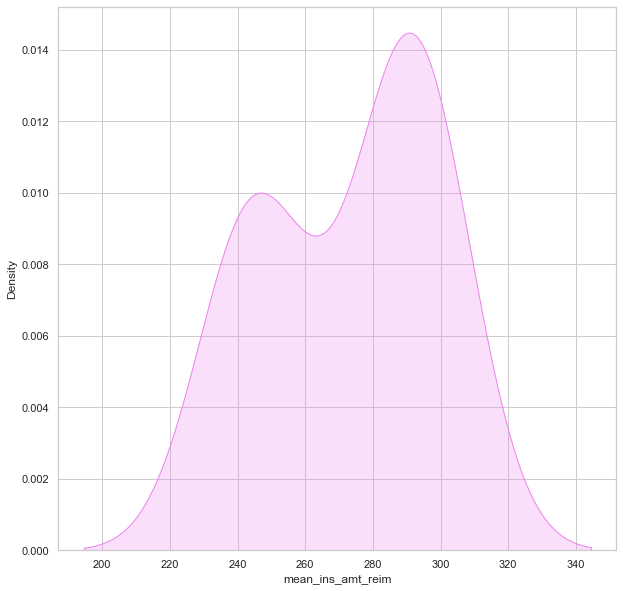

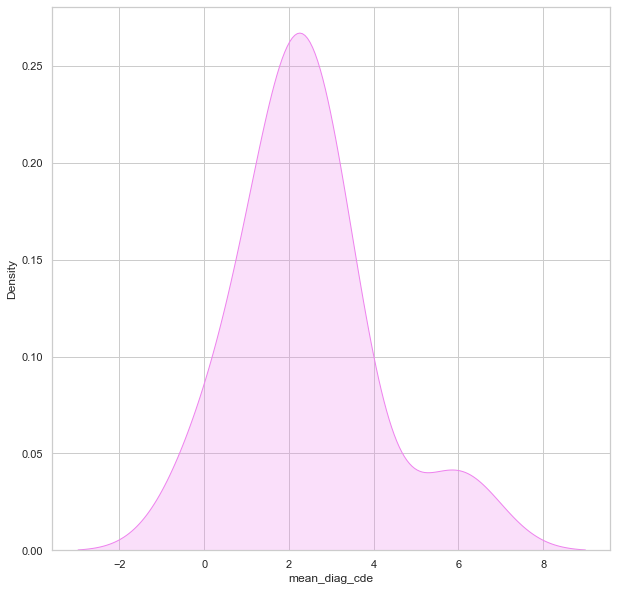

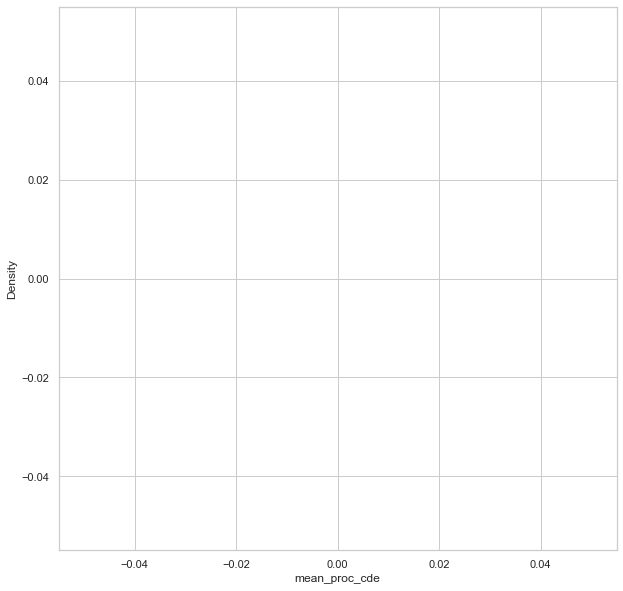

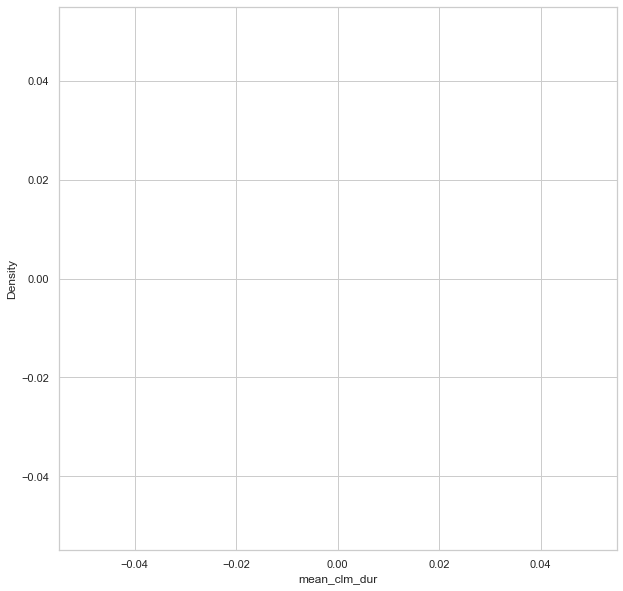

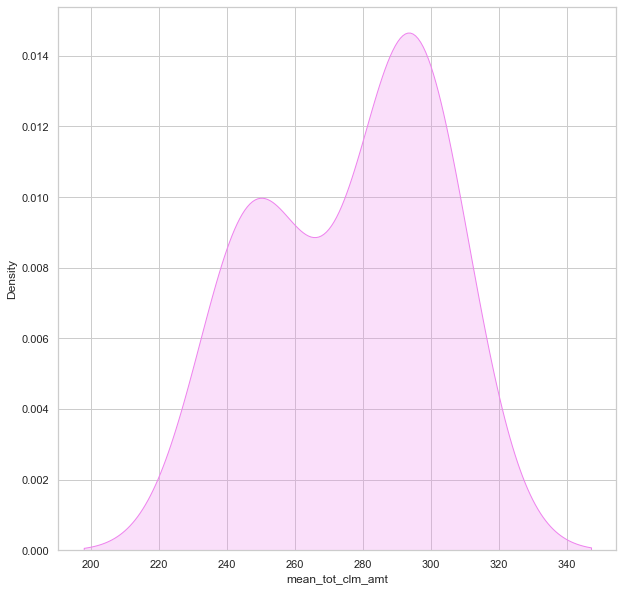

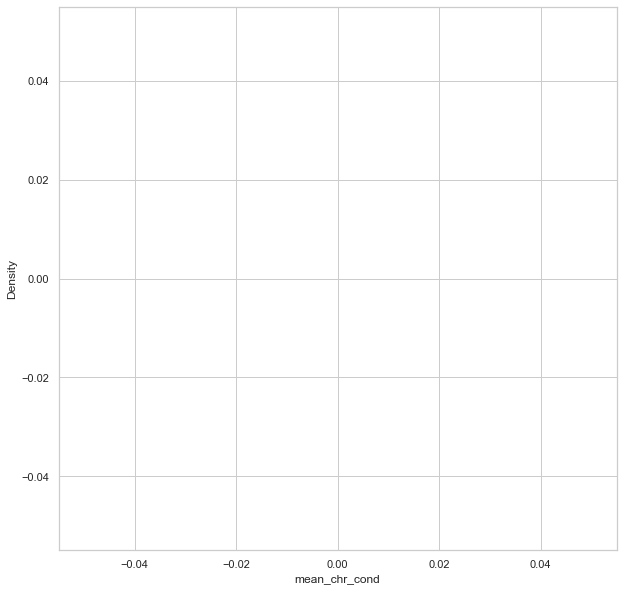

In [88]:
# Outpatient dataset density plots

col_list = ['Out_Claims', 'mean_age', 'mean_ins_amt_reim','mean_diag_cde',\
           'mean_proc_cde', 'mean_clm_dur', 'mean_tot_clm_amt','mean_chr_cond']

for col in col_list:
    sns.set_style("whitegrid")
    plt.figure(figsize=(10, 10))
    x = out_doctors[col]
    sns.kdeplot(x, shade=True, color="violet")

## More EDA:

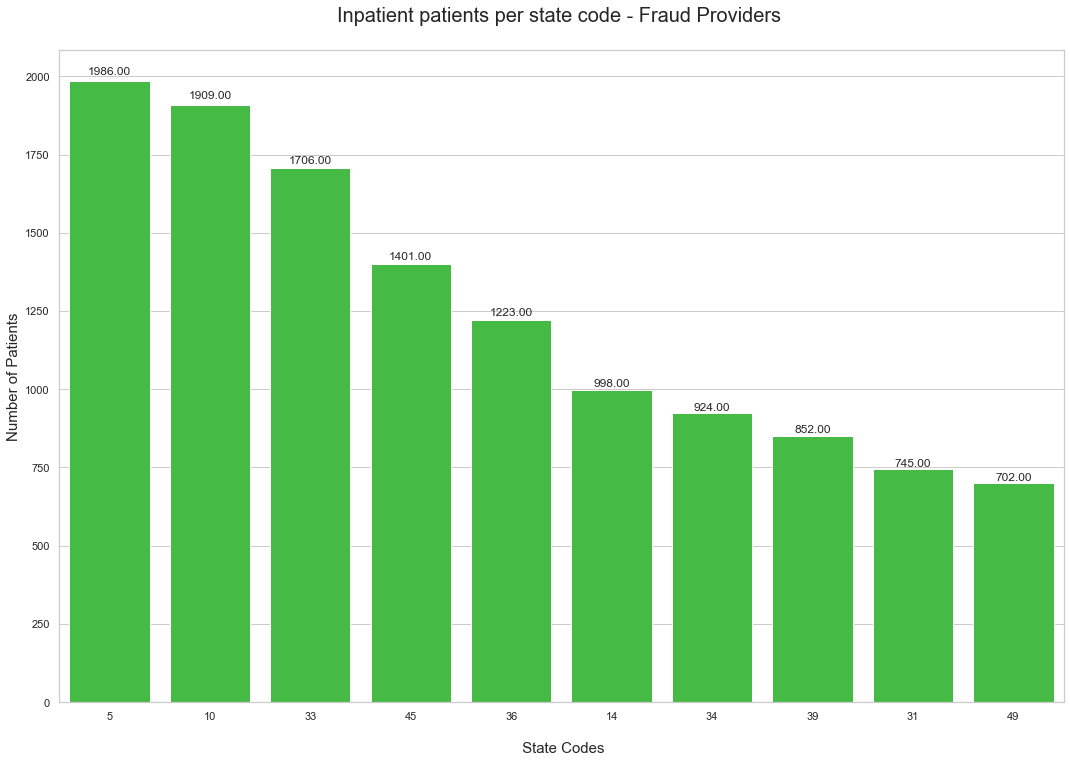

In [89]:
# Inpatient patients per state code - Fraud Providers:

df1 = pd.DataFrame(inp_df.loc[inp_df.PotentialFraud == 'Yes',:]['State']\
                   .value_counts().sort_values(ascending=False)).reset_index().head(10)
df1.columns=['State_Code','No. of Patients']

# Graphically presenting the results

plt.figure(figsize = (18,12))
sns.set_theme(style='whitegrid')
my_order = df1.groupby('State_Code')['No. of Patients']\
           .median().sort_values(ascending=False).head(10).index
splot = sns.barplot(x="State_Code", y="No. of Patients", data=df1, order=my_order, color ="limegreen")
show_values(splot,space=0.05)
plt.xlabel("\n State Codes", fontsize = 15)
plt.ylabel("Number of Patients", fontsize = 15)
plt.title("Inpatient patients per state code - Fraud Providers \n", fontsize = 20)
plt.show()

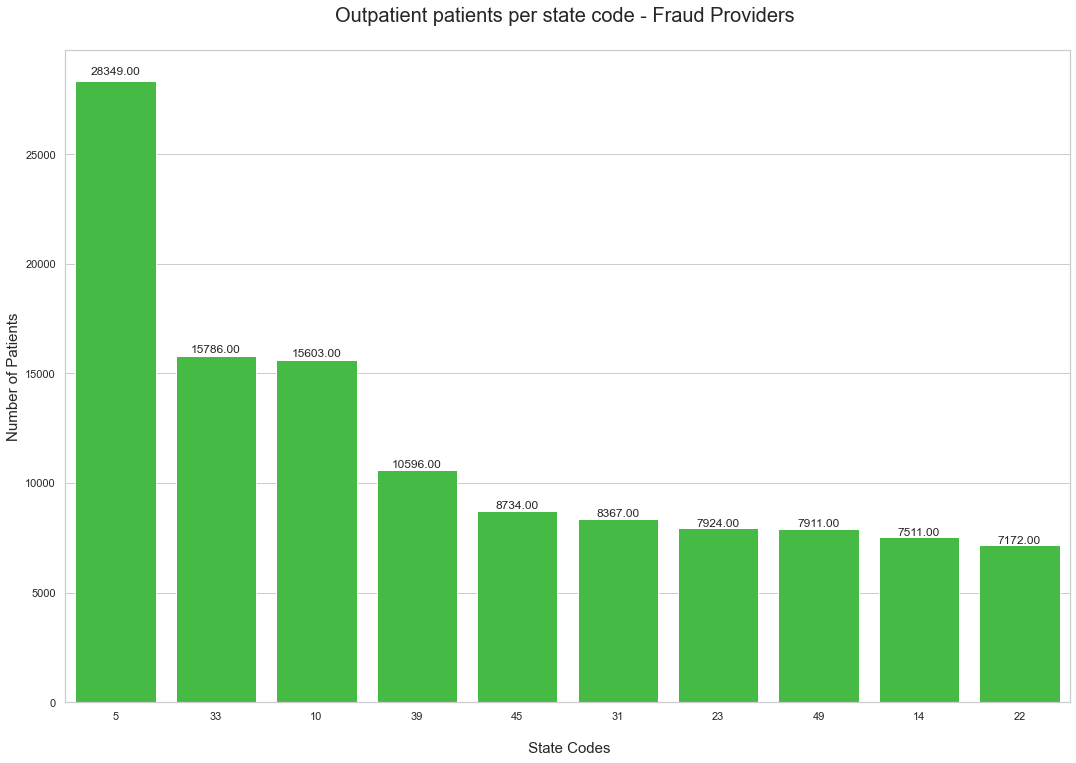

In [90]:
# Outpatient patients per state code - Fraud Providers:

df2 = pd.DataFrame(out_df.loc[out_df.PotentialFraud == 'Yes',:]['State']\
                .value_counts().head(10)).reset_index()
df2.columns=['State_Code','No. of Patients']

# Graphically presenting the results

plt.figure(figsize = (18,12))
sns.set_theme(style='whitegrid')
my_order = df2.groupby('State_Code')['No. of Patients']\
           .median().sort_values(ascending=False).head(10).index
splot = sns.barplot(x="State_Code", y="No. of Patients", data=df2, order=my_order, color ="limegreen")
show_values(splot,space=0.05)
plt.xlabel("\n State Codes", fontsize = 15)
plt.ylabel("Number of Patients", fontsize = 15)
plt.title("Outpatient patients per state code - Fraud Providers \n", fontsize = 20)
plt.show()

### Gender:

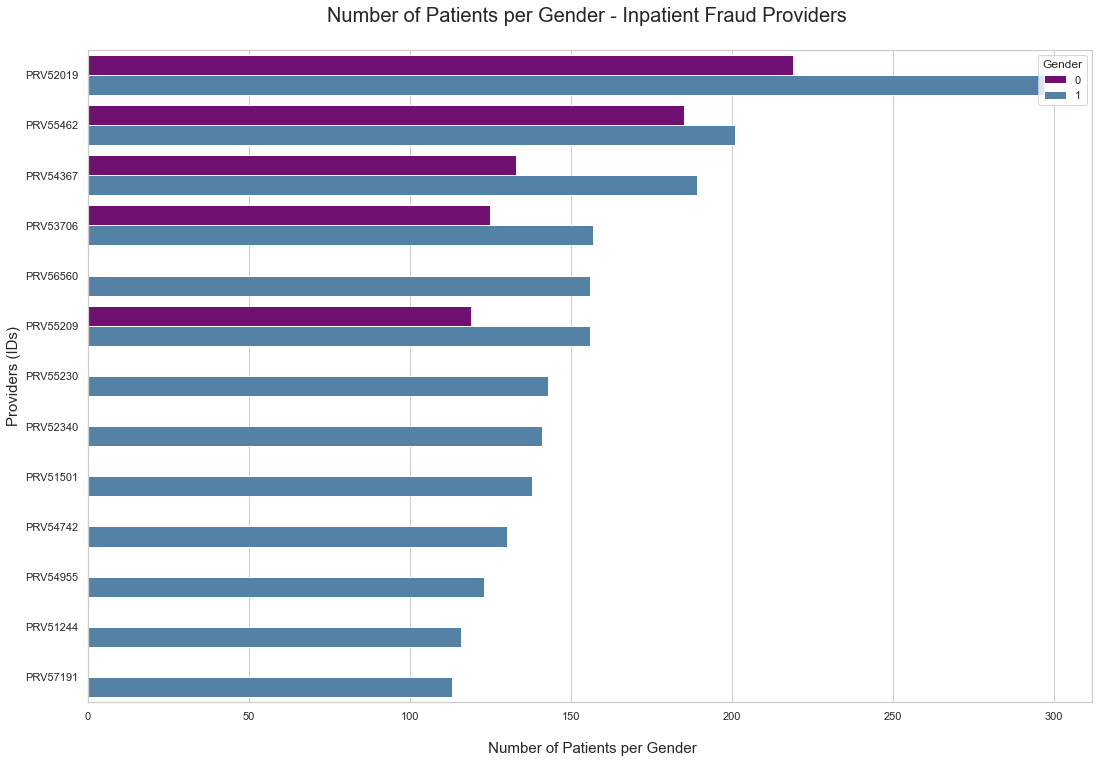

In [91]:
# Inpatient = looking at patient genders for top fruad providers: 

gender_1 = pd.DataFrame(inp_df.loc[inp_df.PotentialFraud == 'Yes',:].groupby('Provider')['Gender']\
            .value_counts().sort_values(ascending=False))
gender_1.columns=['No. of Patients']
gender_1 = gender_1.reset_index().head(18)

# Plotting the results

plt.figure(figsize = (18,12))
sns.set_theme(style='whitegrid')
sns.barplot(
    y="Provider", 
    x="No. of Patients", 
    data=gender_1,
    palette=['purple', 'steelblue'],
    hue='Gender')
plt.xlabel("\n Number of Patients per Gender", fontsize = 15)
plt.ylabel("Providers (IDs)", fontsize = 15)
plt.title("Number of Patients per Gender - Inpatient Fraud Providers \n", fontsize = 20)
plt.show()

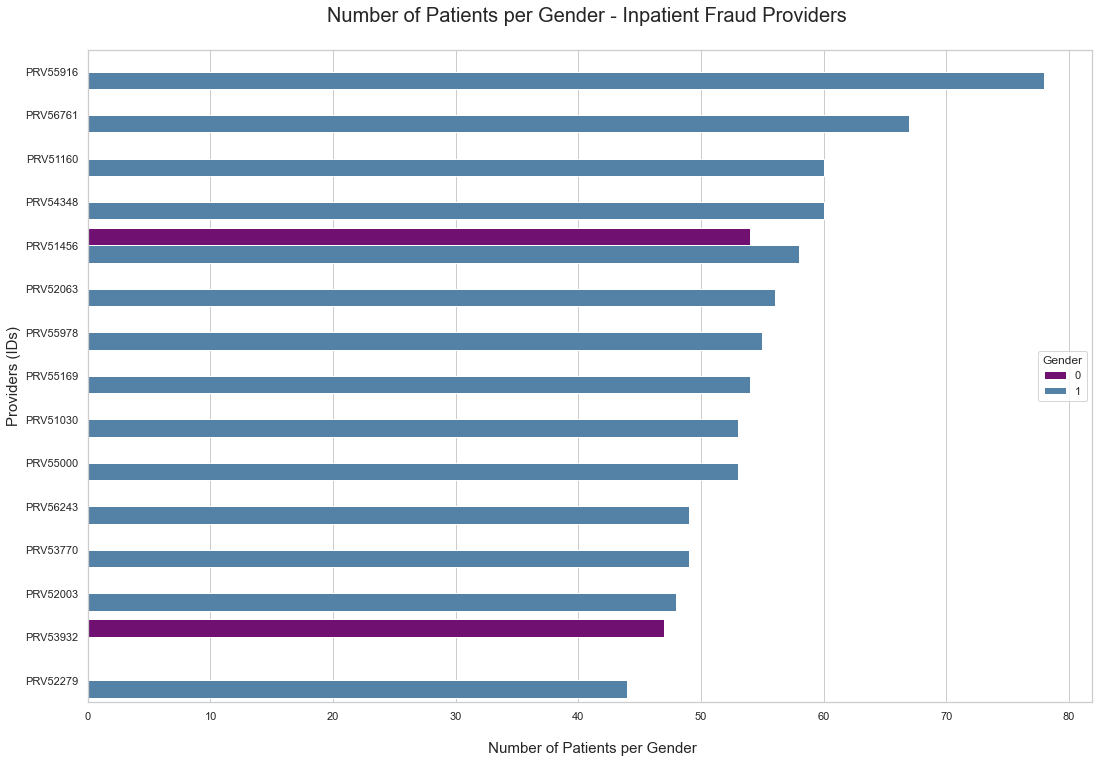

In [92]:
# Inpatient = looking at patient genders for top non-fraud providers: 

gender_0 = pd.DataFrame(inp_df.loc[inp_df.PotentialFraud == 'No',:].groupby('Provider')['Gender']\
            .value_counts().sort_values(ascending=False))
gender_0.columns=['No. of Patients']
gender_0 = gender_0.reset_index().head(16)

# Plotting the results

plt.figure(figsize = (18,12))
sns.set_theme(style='whitegrid')
sns.barplot(
    y="Provider", 
    x="No. of Patients", 
    data=gender_0,
    palette=['purple', 'steelblue'],
    hue='Gender')
plt.xlabel("\n Number of Patients per Gender", fontsize = 15)
plt.ylabel("Providers (IDs)", fontsize = 15)
plt.title("Number of Patients per Gender - Inpatient Fraud Providers \n", fontsize = 20)
plt.show()

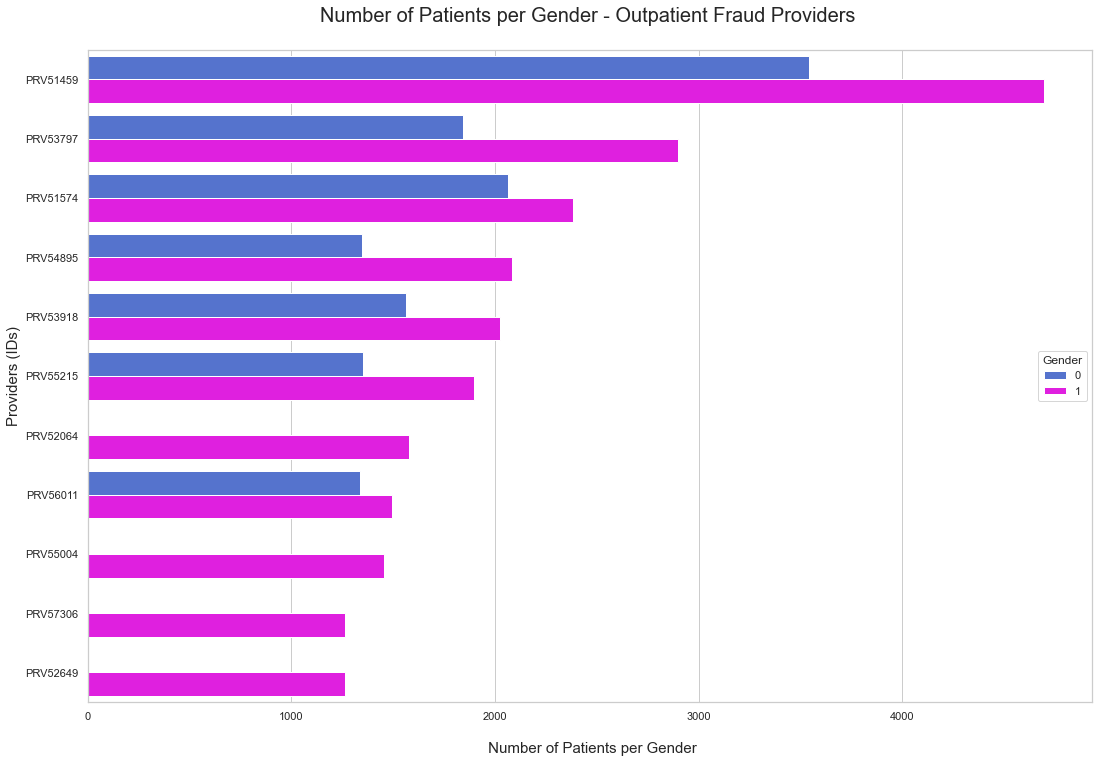

In [93]:
# Outpatient = looking at patient genders for top fraud providers: 

gender_1 = pd.DataFrame(out_df.loc[out_df.PotentialFraud == 'Yes',:].groupby('Provider')['Gender']\
            .value_counts().sort_values(ascending=False)).head(18)
gender_1.columns=['No. of Patients']
gender_1 = gender_1.reset_index()

# Plotting the results

plt.figure(figsize = (18,12))
sns.set_theme(style='whitegrid')
sns.barplot(
    y="Provider", 
    x="No. of Patients", 
    data=gender_1,
    palette=['royalblue', 'magenta'],
    hue='Gender')
plt.xlabel("\n Number of Patients per Gender", fontsize = 15)
plt.ylabel("Providers (IDs)", fontsize = 15)
plt.title("Number of Patients per Gender - Outpatient Fraud Providers \n", fontsize = 20)
plt.show()

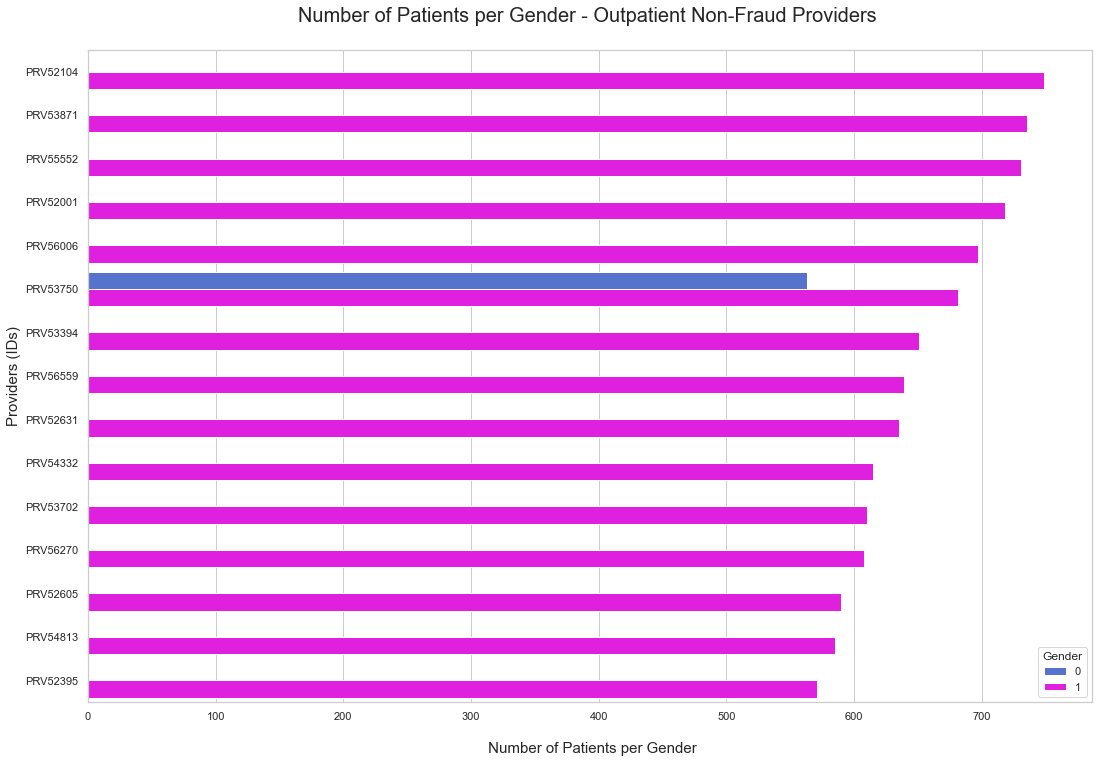

In [94]:
# Outpatient = looking at patient genders for top non-fraud providers: 

gender_0 = pd.DataFrame(out_df.loc[out_df.PotentialFraud == 'No',:].groupby('Provider')['Gender']\
            .value_counts().sort_values(ascending=False)).head(16)
gender_0.columns=['No. of Patients']
gender_0 = gender_0.reset_index()

# Plotting the results

plt.figure(figsize = (18,12))
sns.set_theme(style='whitegrid')
sns.barplot(
    y="Provider", 
    x="No. of Patients", 
    data=gender_0,
    palette=['royalblue', 'magenta'],
    hue='Gender')
plt.xlabel("\n Number of Patients per Gender", fontsize = 15)
plt.ylabel("Providers (IDs)", fontsize = 15)
plt.title("Number of Patients per Gender - Outpatient Non-Fraud Providers \n", fontsize = 20)
plt.show()

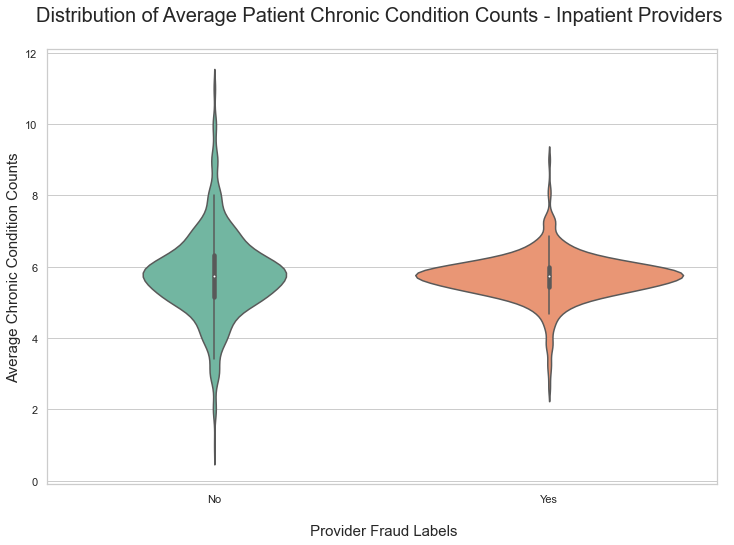

In [95]:
# Inpatient = looking at average patient chronic condition counts per provider: 

in_pat_cond = inp_df[['Provider','Chr_Cond_Count']].groupby('Provider')\
                   .agg(['mean']).reset_index()
in_pat_cond.columns=['Provider', 'Chr_Cond_Count']
in_pat_cond = in_pat_cond.sort_values(by='Chr_Cond_Count',ascending=False)

# Adding fraud labels

in_pat_cond = in_pat_cond.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_pat_cond["PotentialFraud"], y=in_pat_cond["Chr_Cond_Count"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Chronic Condition Counts", fontsize = 15)
plt.title("Distribution of Average Patient Chronic Condition Counts - Inpatient Providers \n", fontsize = 20)
plt.show()

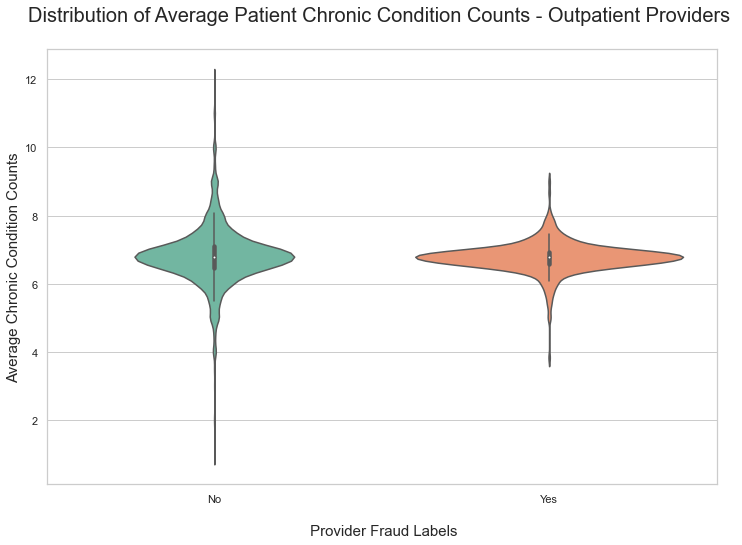

In [96]:
# Outpatient = looking at average patient chronic condition counts per provider: 

out_pat_cond = out_df[['Provider','Chr_Cond_Count']].groupby('Provider')\
                   .agg(['mean']).reset_index()
out_pat_cond.columns=['Provider', 'Chr_Cond_Count']
out_pat_cond = out_pat_cond.sort_values(by='Chr_Cond_Count',ascending=False)

# Adding fraud labels

out_pat_cond = out_pat_cond.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_pat_cond["PotentialFraud"], y=out_pat_cond["Chr_Cond_Count"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Chronic Condition Counts", fontsize = 15)
plt.title("Distribution of Average Patient Chronic Condition Counts - Outpatient Providers \n", fontsize = 20)
plt.show()

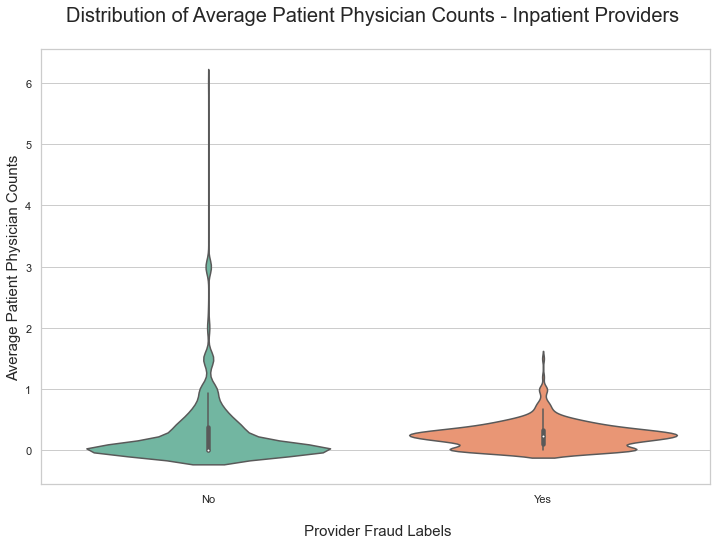

In [97]:
# Inpatient = looking at average patient physician counts per provider: 

in_pat_phy = inp_df[['Provider','Physician_Count']].groupby('Provider')\
                   .agg(['mean']).reset_index()
in_pat_phy.columns=['Provider', 'Physician_Count']
in_pat_phy = in_pat_phy.sort_values(by='Physician_Count',ascending=False)

# Adding fraud labels

in_pat_phy = in_pat_phy.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=in_pat_phy["PotentialFraud"], y=in_pat_phy["Physician_Count"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Patient Physician Counts", fontsize = 15)
plt.title("Distribution of Average Patient Physician Counts - Inpatient Providers \n", fontsize = 20)
plt.show()

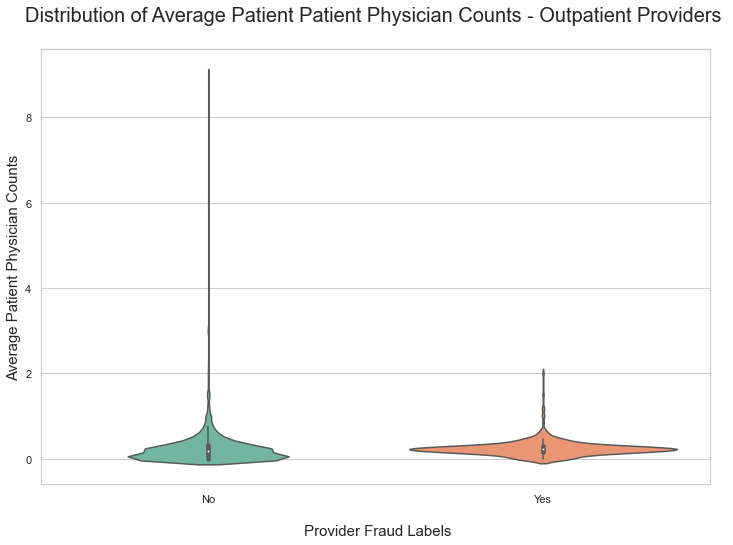

In [98]:
# Outpatient = looking at average patient physician counts per provider: 

out_pat_phy = out_df[['Provider','Physician_Count']].groupby('Provider')\
                   .agg(['mean']).reset_index()
out_pat_phy.columns=['Provider', 'Physician_Count']
out_pat_phy = out_pat_phy.sort_values(by='Physician_Count',ascending=False)

# Adding fraud labels

out_pat_phy = out_pat_phy.merge(fraud_labels, on='Provider')

# Plotting the results

plt.figure(figsize = (12,8))
sns.set_theme(style='whitegrid')
sns.violinplot(x=out_pat_phy["PotentialFraud"], y=out_pat_phy["Physician_Count"], palette='Set2')
plt.xlabel("\n Provider Fraud Labels", fontsize = 15)
plt.ylabel("Average Patient Physician Counts", fontsize = 15)
plt.title("Distribution of Average Patient Patient Physician Counts - Outpatient Providers \n", fontsize = 20)
plt.show()

### # Claim duration analysis:

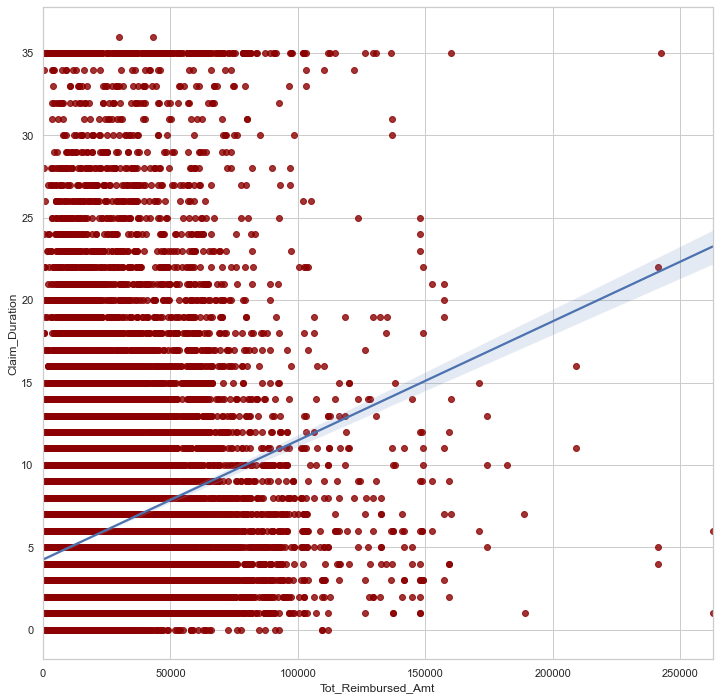

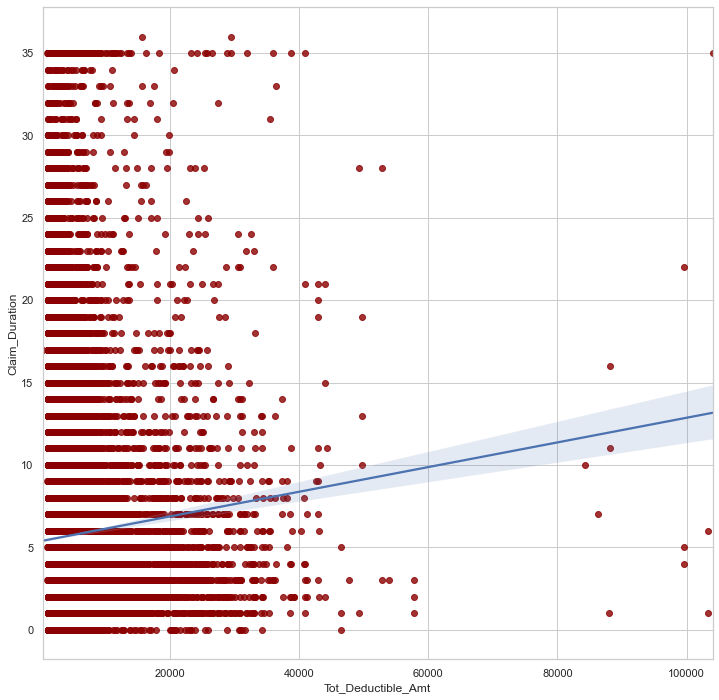

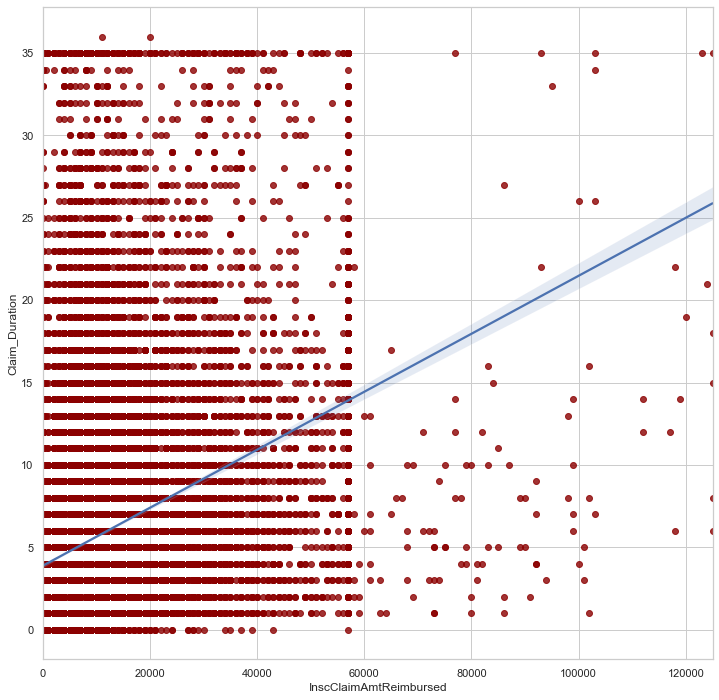

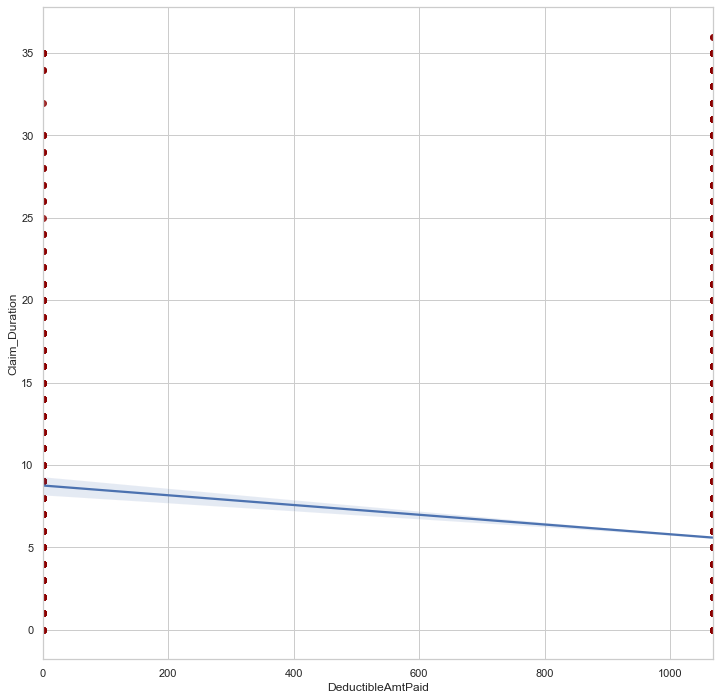

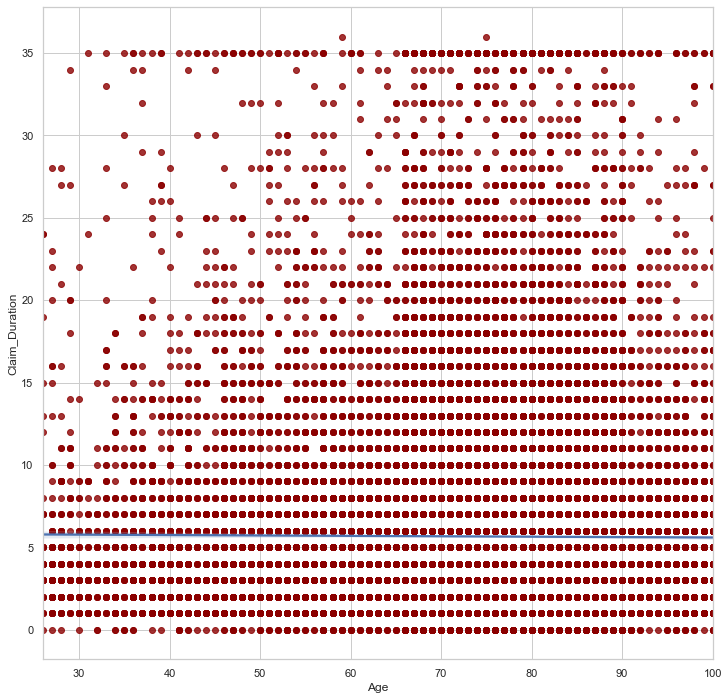

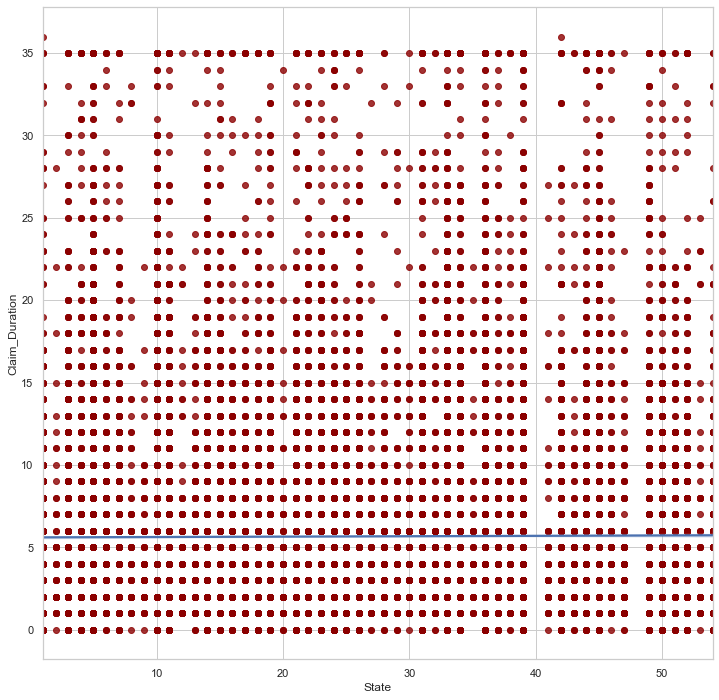

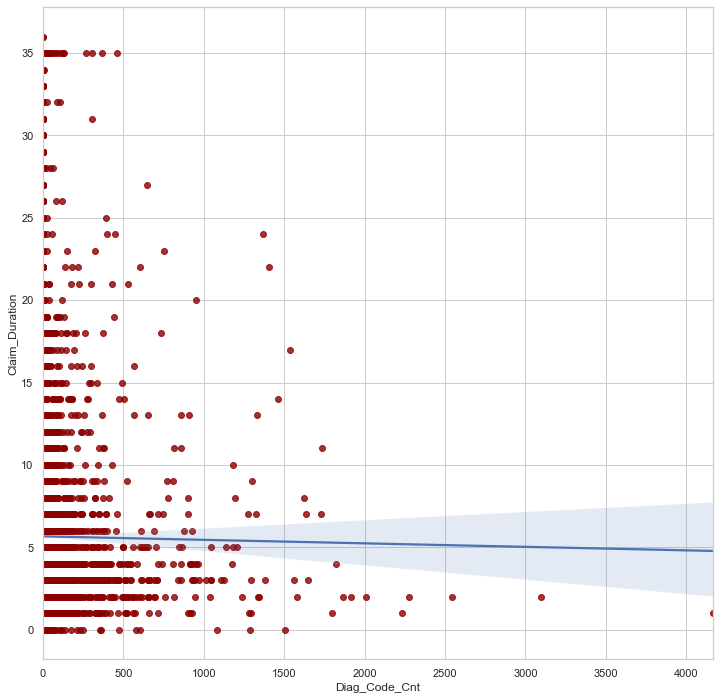

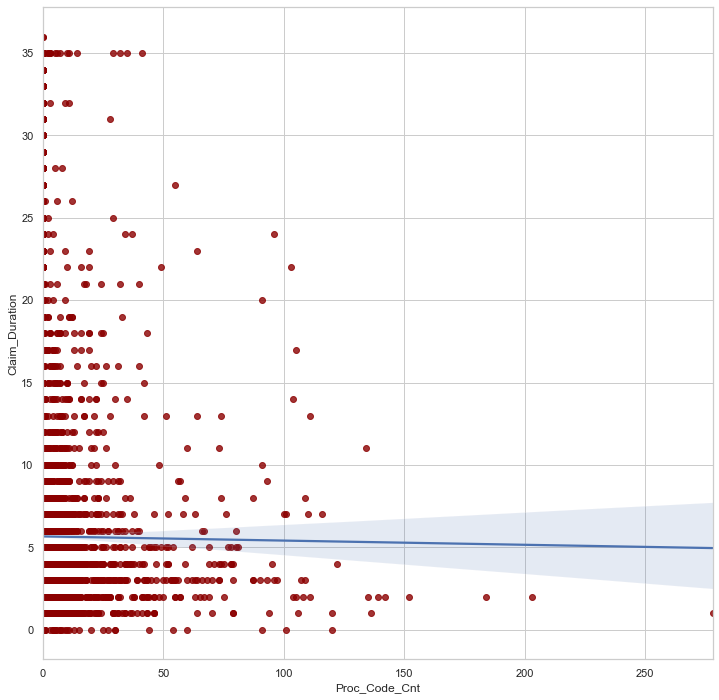

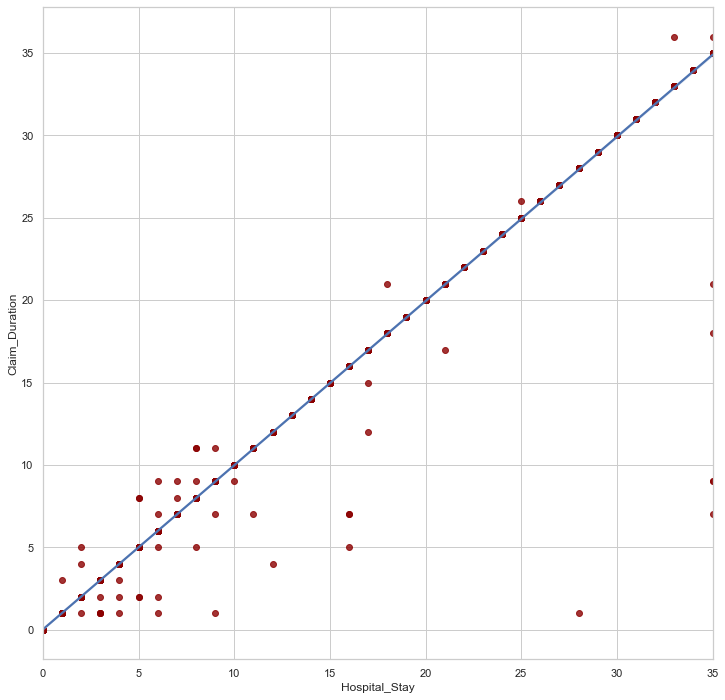

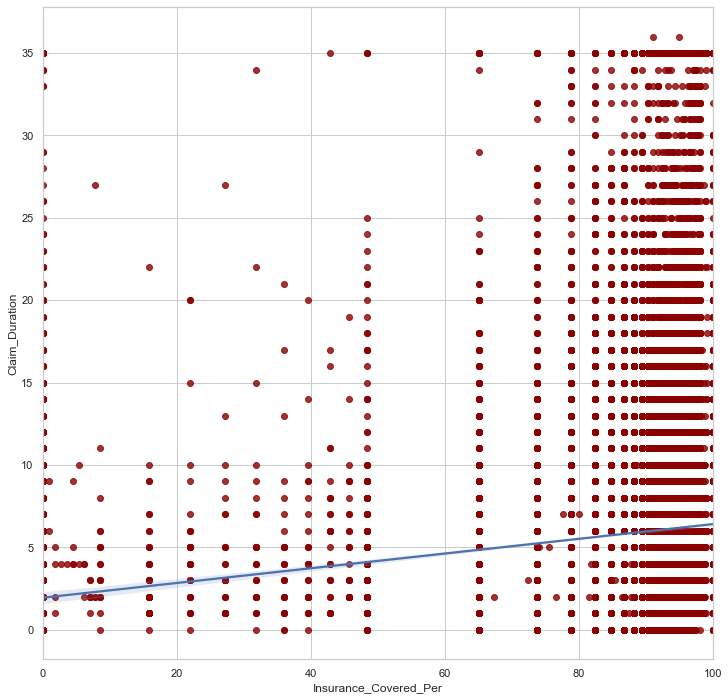

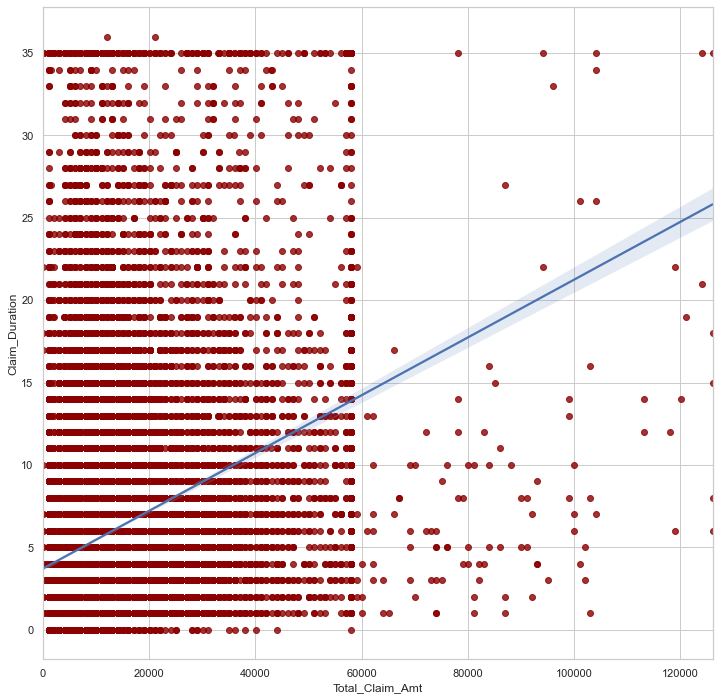

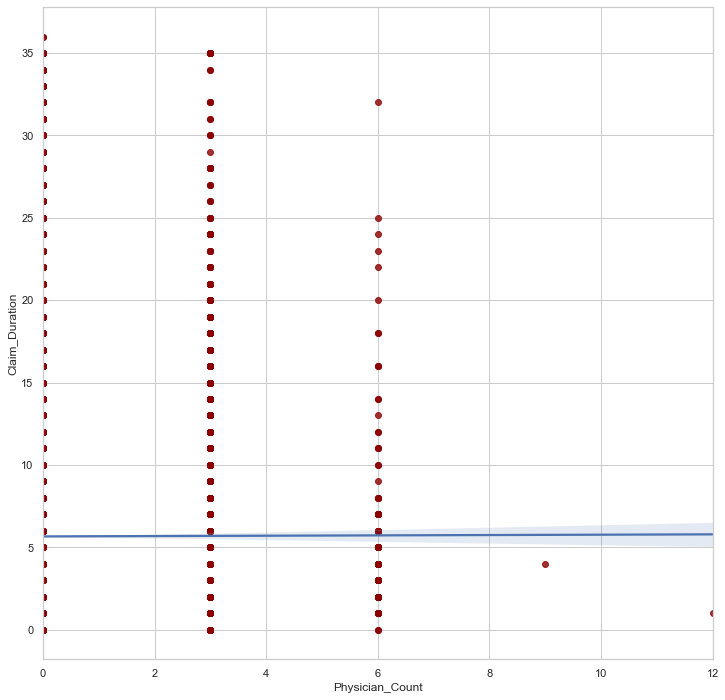

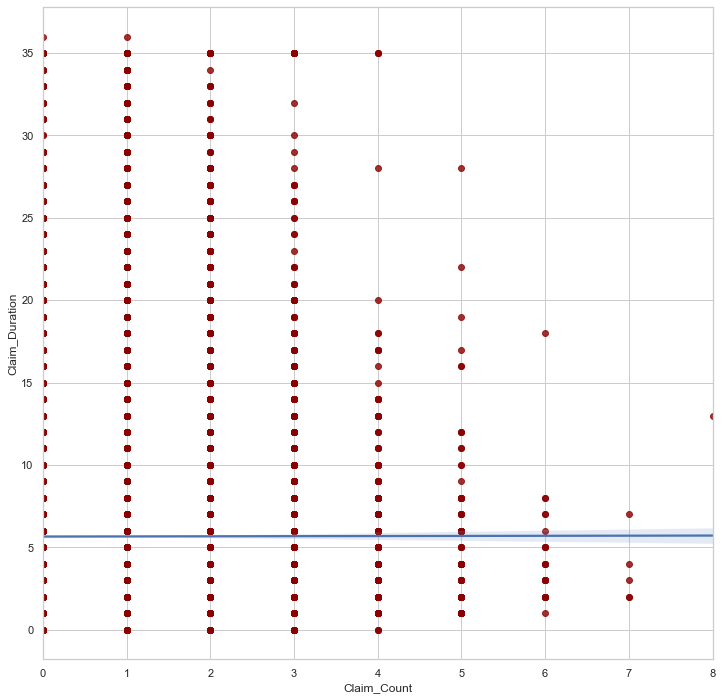

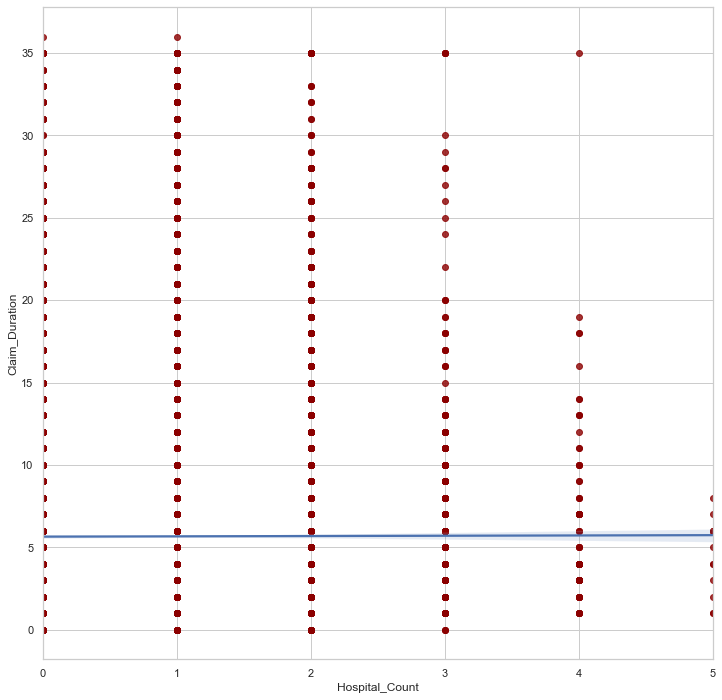

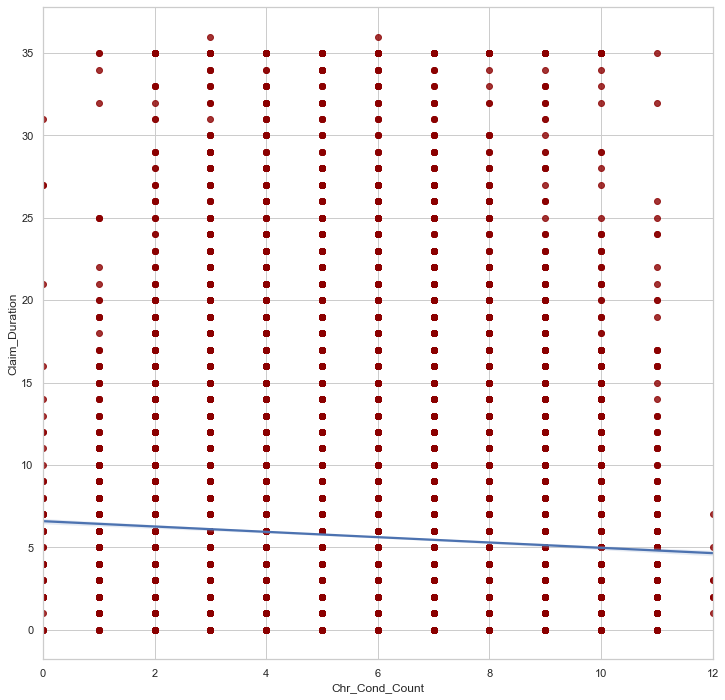

In [99]:
# Inpatient dataset claim duration scatter plots

col_list = ['Tot_Reimbursed_Amt', 'Tot_Deductible_Amt', 'InscClaimAmtReimbursed','DeductibleAmtPaid',\
            'Age', 'State', 'Diag_Code_Cnt','Proc_Code_Cnt', 'Hospital_Stay','Insurance_Covered_Per',\
            'Total_Claim_Amt','Physician_Count','Claim_Count', 'Hospital_Count', 'Chr_Cond_Count']

for col in col_list:
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 12))
    x = inp_df[col]
    y = inp_df['Claim_Duration']
    sns.regplot(x=x, y=y,scatter_kws={"color":"darkred"})

## Model DFs

In [109]:
data = {'Model': ['Random Forest (RFE)', 'Random Forest (RFE)', 'Random Forest (RFE)','Random Forest (RFE)',\
                  'Linear SVC (RFE)', 'Linear SVC (RFE)', 'Linear SVC (RFE)','Linear SVC (RFE)',\
                  'AdaBoost (RFE)', 'AdaBoost (RFE)', 'AdaBoost (RFE)','AdaBoost (RFE)',\
                  'XGBoost (RFE)', 'XGBoost (RFE)', 'XGBoost (RFE)','XGBoost (RFE)',\
                  'LightGBM (RFE)', 'LightGBM (RFE)', 'LightGBM (RFE)','LightGBM (RFE)'],
        'Scores': [0.790, 0.704, 0.745, 0.759,\
                   1.000, 0.275, 0.432, 0.638,\
                   0.692, 0.664, 0.678, 0.684,\
                   0.895, 0.821, 0.856, 0.862,\
                   0.906, 0.828, 0.866, 0.871],
        'Metric': ['Precision','Recall','F1 Score','AUC/ROC Score',\
                   'Precision','Recall','F1 Score','AUC/ROC Score',\
                   'Precision','Recall','F1 Score','AUC/ROC Score',\
                   'Precision','Recall','F1 Score','AUC/ROC Score',\
                   'Precision','Recall','F1 Score','AUC/ROC Score']}

# convert to DataFrame
SM_df = pd.DataFrame(data)
SM_df

Model  Scores         Metric
0   Random Forest (RFE)   0.790      Precision
1   Random Forest (RFE)   0.704         Recall
2   Random Forest (RFE)   0.745       F1 Score
3   Random Forest (RFE)   0.759  AUC/ROC Score
4      Linear SVC (RFE)   1.000      Precision
5      Linear SVC (RFE)   0.275         Recall
6      Linear SVC (RFE)   0.432       F1 Score
7      Linear SVC (RFE)   0.638  AUC/ROC Score
8        AdaBoost (RFE)   0.692      Precision
9        AdaBoost (RFE)   0.664         Recall
10       AdaBoost (RFE)   0.678       F1 Score
11       AdaBoost (RFE)   0.684  AUC/ROC Score
12        XGBoost (RFE)   0.895      Precision
13        XGBoost (RFE)   0.821         Recall
14        XGBoost (RFE)   0.856       F1 Score
15        XGBoost (RFE)   0.862  AUC/ROC Score
16       LightGBM (RFE)   0.906      Precision
17       LightGBM (RFE)   0.828         Recall
18       LightGBM (RFE)   0.866       F1 Score
19       LightGBM (RFE)   0.871  AUC/ROC Score

Text(0.5, 1.0, 'SMOTE Dataset - Model Metrics \n')

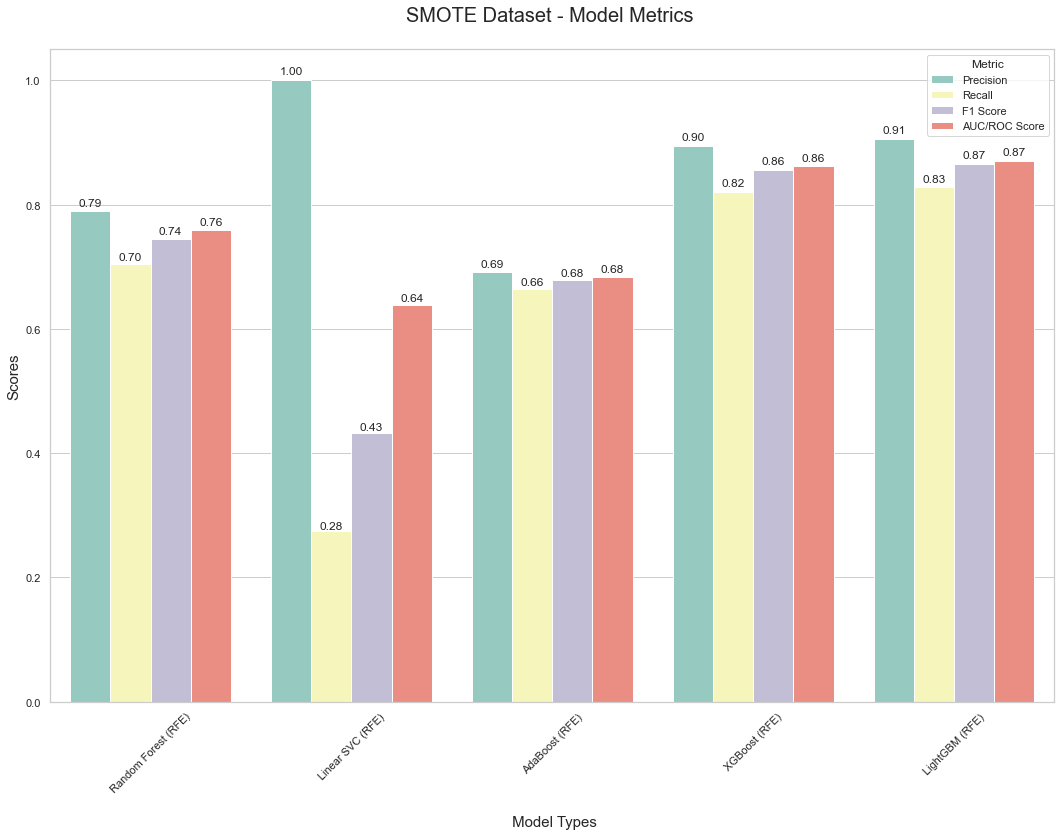

In [111]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=SM_df, x='Model',y='Scores', hue='Metric', palette="Set3")
show_values(splot,space=0.05)
plt.xticks(rotation=45)
plt.xlabel("\n Model Types", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)
plt.title("SMOTE Dataset - Model Metrics \n", fontsize = 20)

In [112]:
data = {'Model': ['Logistic Regression', 'Logistic Regression', 'Logistic Regression','Logistic Regression',\
                  'Random Forest (RFE)', 'Random Forest (RFE)', 'Random Forest (RFE)','Random Forest (RFE)',\
                  'Linear SVC (RFE)', 'Linear SVC (RFE)', 'Linear SVC (RFE)','Linear SVC (RFE)',\
                  'AdaBoost (RFE)', 'AdaBoost (RFE)', 'AdaBoost (RFE)','AdaBoost (RFE)',\
                  'XGBoost (RFE)', 'XGBoost (RFE)', 'XGBoost (RFE)','XGBoost (RFE)',\
                  'LightGBM (RFE)', 'LightGBM (RFE)', 'LightGBM (RFE)','LightGBM (RFE)'],
        'Scores': [0.650, 0.597, 0.622, 0.638,\
                   0.786, 0.713, 0.748, 0.760,\
                   1.000, 0.314, 0.478, 0.657,\
                   0.717, 0.629, 0.670, 0.690,\
                   0.898, 0.835, 0.865, 0.870,\
                   0.887, 0.817, 0.851, 0.857],
        'Metric': ['Precision','Recall','F1 Score','AUC/ROC Score',\
                   'Precision','Recall','F1 Score','AUC/ROC Score',\
                   'Precision','Recall','F1 Score','AUC/ROC Score',\
                   'Precision','Recall','F1 Score','AUC/ROC Score',\
                   'Precision','Recall','F1 Score','AUC/ROC Score',\
                   'Precision','Recall','F1 Score','AUC/ROC Score']} 

# convert to DataFrame
BSM_df = pd.DataFrame(data)
BSM_df

Model  Scores         Metric
0   Logistic Regression   0.650      Precision
1   Logistic Regression   0.597         Recall
2   Logistic Regression   0.622       F1 Score
3   Logistic Regression   0.638  AUC/ROC Score
4   Random Forest (RFE)   0.786      Precision
5   Random Forest (RFE)   0.713         Recall
6   Random Forest (RFE)   0.748       F1 Score
7   Random Forest (RFE)   0.760  AUC/ROC Score
8      Linear SVC (RFE)   1.000      Precision
9      Linear SVC (RFE)   0.314         Recall
10     Linear SVC (RFE)   0.478       F1 Score
11     Linear SVC (RFE)   0.657  AUC/ROC Score
12       AdaBoost (RFE)   0.717      Precision
13       AdaBoost (RFE)   0.629         Recall
14       AdaBoost (RFE)   0.670       F1 Score
15       AdaBoost (RFE)   0.690  AUC/ROC Score
16        XGBoost (RFE)   0.898      Precision
17        XGBoost (RFE)   0.835         Recall
18        XGBoost (RFE)   0.865       F1 Score
19        XGBoost (RFE)   0.870  AUC/ROC Score
20       LightGBM (RFE)   0.887      Precision
21       LightGBM (RFE)   0.817         Recall
22       LightGBM (RFE)   0.851       F1 Score
23       LightGBM (RFE)   0.857  AUC/ROC Score

Text(0.5, 1.0, 'Borderline SMOTE Dataset - Model Metrics \n')

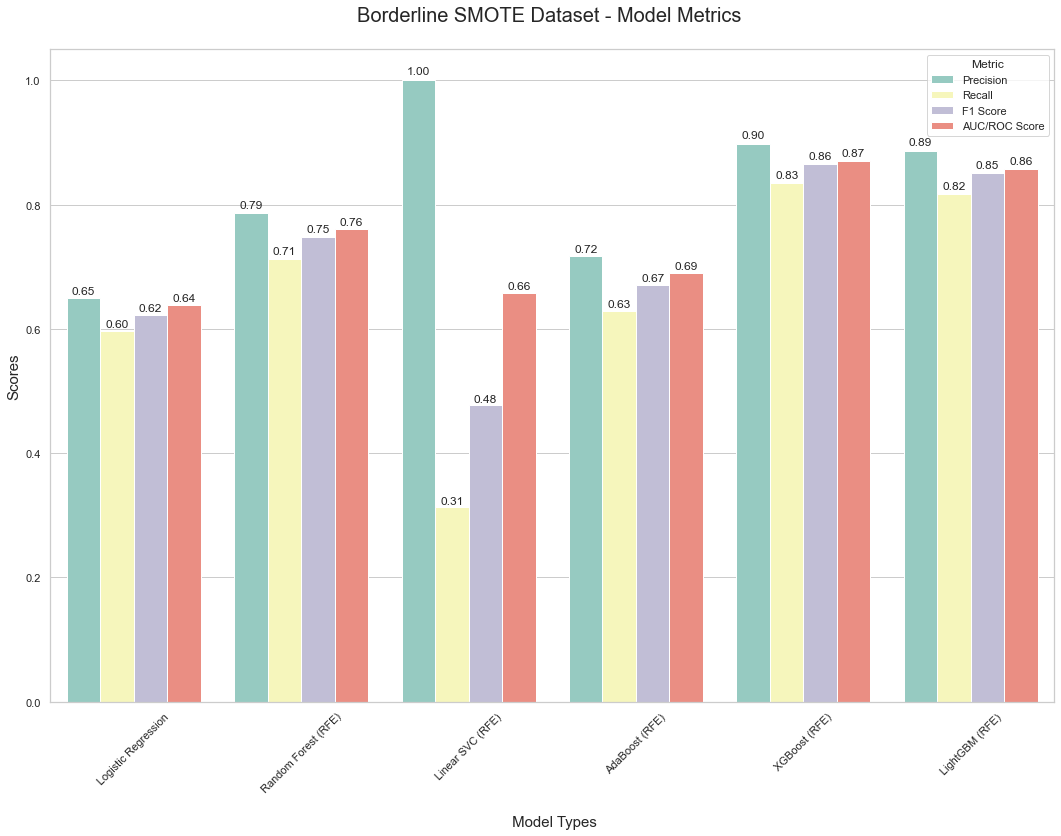

In [113]:
plt.figure(figsize=(18,12))
sns.set_theme(style='whitegrid')
splot = sns.barplot(data=BSM_df, x='Model',y='Scores', hue='Metric', palette="Set3")
show_values(splot,space=0.05)
plt.xticks(rotation=45)
plt.xlabel("\n Model Types", fontsize = 15)
plt.ylabel("Scores", fontsize = 15)
plt.title("Borderline SMOTE Dataset - Model Metrics \n", fontsize = 20)